<a href="https://colab.research.google.com/github/hanansuk/guns_n_roses/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('lmtest')
install.packages('sandwich')
install.packages('stargazer')
install.packages('corrplot')
# install.packages('plotly')
# install.packages('googledrive')
# install.packages('httpuv')
install.packages('reshape2')
install.packages('ggrepel')
install.packages('gridExtra')
install.packages('xlsx')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(scipen = 999)

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)
library(sandwich)
library(lmtest)
library(stargazer)
library(cli)
library(corrplot)
library(scales)
library(tidyverse)
library(stats)
# library(plotly)
library(ggrepel)
library(reshape2)
# library(googledrive)
# library(httpuv)
library(repr)
library(readxl)
library(gridExtra)

In [ ]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may update python version
                                       #occasionally
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
}

# CDC EDA


In [78]:
lagpad <- function(x, k) {
  if (k>0 & (k %% 5 != 0)) {
    return (c(rep(NA, k), x)[1 : length(x)] );
  }
  else {
    return (c(x[(-k+1) : length(x)], rep(NA, -k)));
  }
}

In [79]:
# x <- drive_get("~/deaths_by_month_2_v2.txt")
# drive_download(x, overwrite = TRUE)
cdc1 <- read.table("/content/deaths_by_month_2_v2.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc1 <- cdc1[,-1]

In [81]:
# x <- drive_get("~/deaths_by_month_2.txt")
# drive_download(x, overwrite = TRUE)
cdc2 <- read.table("/content/deaths_by_month_4_v1.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc2 <- cdc2[,-1]
cdc2 <- cdc2 %>%
    filter(Year == 2021)

In [82]:
cdc = rbind(cdc1, cdc2)

In [83]:
glimpse(cdc)
head(cdc)

Rows: 1,122
Columns: 7
$ State      <chr> "Alabama", "Alabama", "Alabama", "Alabama", "Alabama", "Ala…
$ State.Code <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Year       <dbl> 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,…
$ Year.Code  <int> 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,…
$ Deaths     <int> 787, 764, 737, 724, 764, 677, 731, 778, 811, 819, 829, 781,…
$ Population <int> 4430141, 4447100, 4467634, 4480089, 4503491, 4530729, 45698…
$ Crude.Rate <dbl> 17.8, 17.2, 16.5, 16.2, 17.0, 14.9, 16.0, 16.8, 17.4, 17.4,…


State   State.Code Year Year.Code Deaths Population Crude.Rate
1 Alabama 1          1999 1999      787    4430141    17.8      
2 Alabama 1          2000 2000      764    4447100    17.2      
3 Alabama 1          2001 2001      737    4467634    16.5      
4 Alabama 1          2002 2002      724    4480089    16.2      
5 Alabama 1          2003 2003      764    4503491    17.0      
6 Alabama 1          2004 2004      677    4530729    14.9

In [84]:
summary(cdc)

    State             State.Code         Year        Year.Code   
 Length:1122        Min.   : 1.00   Min.   :1999   Min.   :1999  
 Class :character   1st Qu.:16.00   1st Qu.:2004   1st Qu.:2004  
 Mode  :character   Median :29.00   Median :2010   Median :2010  
                    Mean   :28.96   Mean   :2010   Mean   :2010  
                    3rd Qu.:42.00   3rd Qu.:2015   3rd Qu.:2015  
                    Max.   :56.00   Max.   :2020   Max.   :2020  
     Deaths         Population         Crude.Rate   
 Min.   :  28.0   Min.   :  491780   Min.   : 2.20  
 1st Qu.: 169.2   1st Qu.: 1661982   1st Qu.: 8.80  
 Median : 466.0   Median : 4214329   Median :11.50  
 Mean   : 648.9   Mean   : 6012796   Mean   :11.79  
 3rd Qu.: 891.0   3rd Qu.: 6891086   3rd Qu.:14.68  
 Max.   :4113.0   Max.   :39557045   Max.   :34.00  

In [85]:
cdc_2 <- cdc %>%
  arrange(State, Year)

cdc_2$Year = as.numeric(as.character(cdc_2$Year))

In [92]:
cdc_by_state <- cdc_2 %>%
  mutate(YoY = (((Deaths - lagpad(Deaths, 1))/Deaths)))

lag_function <- function(x) {
  x[seq_along(x) %% 22 == 0] <- NA
  x
}

cdc_by_state$YoY[2:nrow(cdc_by_state)] <- lag_function(cdc_by_state$YoY[2:nrow(cdc_by_state)])


cdc_by_state

State     State.Code Year Year.Code Deaths Population Crude.Rate
1    Alabama   1          1999 1999       787   4430141    17.8      
2    Alabama   1          2000 2000       764   4447100    17.2      
3    Alabama   1          2001 2001       737   4467634    16.5      
4    Alabama   1          2002 2002       724   4480089    16.2      
5    Alabama   1          2003 2003       764   4503491    17.0      
6    Alabama   1          2004 2004       677   4530729    14.9      
7    Alabama   1          2005 2005       731   4569805    16.0      
8    Alabama   1          2006 2006       778   4628981    16.8      
9    Alabama   1          2007 2007       811   4672840    17.4      
10   Alabama   1          2008 2008       819   4718206    17.4      
11   Alabama   1          2009 2009       829   4757938    17.4      
12   Alabama   1          2010 2010       781   4779736    16.3      
13   Alabama   1          2011 2011       784   4802740    16.3      
14   Alabama   1          2012 2012       829   4822023    17.2      
15   Alabama   1          2013 2013       853   4833722    17.6      
16   Alabama   1          2014 2014       809   4849377    16.7      
17   Alabama   1          2015 2015       953   4858979    19.6      
18   Alabama   1          2016 2016      1034   4863300    21.3      
19   Alabama   1          2017 2017      1116   4874747    22.9      
20   Alabama   1          2018 2018      1060   4887871    21.7      
21   Alabama   1          2019 2019      1071   4903185    21.8      
22   Alabama   1          2020 2020      1135   4921532    23.1      
23   Alaska    2          1999 1999        87    624779    13.9      
24   Alaska    2          2000 2000       115    626932    18.3      
25   Alaska    2          2001 2001        95    633714    15.0      
26   Alaska    2          2002 2002       125    642337    19.5      
27   Alaska    2          2003 2003       120    648414    18.5      
28   Alaska    2          2004 2004       116    659286    17.6      
29   Alaska    2          2005 2005       116    666946    17.4      
30   Alaska    2          2006 2006       111    675302    16.4      
⋮    ⋮         ⋮          ⋮    ⋮         ⋮      ⋮          ⋮         
1093 Wisconsin 55         2013 2013      563    5742713     9.8      
1094 Wisconsin 55         2014 2014      481    5757564     8.4      
1095 Wisconsin 55         2015 2015      608    5771337    10.5      
1096 Wisconsin 55         2016 2016      656    5778708    11.4      
1097 Wisconsin 55         2017 2017      608    5795483    10.5      
1098 Wisconsin 55         2018 2018      586    5813568    10.1      
1099 Wisconsin 55         2019 2019      589    5822434    10.1      
1100 Wisconsin 55         2020 2020      708    5832655    12.1      
1101 Wyoming   56         1999 1999       72     491780    14.6      
1102 Wyoming   56         2000 2000       58     493782    11.7      
1103 Wyoming   56         2001 2001       69     494657    13.9      
1104 Wyoming   56         2002 2002       95     500017    19.0      
1105 Wyoming   56         2003 2003       87     503453    17.3      
1106 Wyoming   56         2004 2004       55     509106    10.8      
1107 Wyoming   56         2005 2005       71     514157    13.8      
1108 Wyoming   56         2006 2006       80     522667    15.3      
1109 Wyoming   56         2007 2007       75     534876    14.0      
1110 Wyoming   56         2008 2008       93     546043    17.0      
1111 Wyoming   56         2009 2009       96     559851    17.1      
1112 Wyoming   56         2010 2010       92     563626    16.3      
1113 Wyoming   56         2011 2011       96     568158    16.9      
1114 Wyoming   56         2012 2012      117     576412    20.3      
1115 Wyoming   56         2013 2013      102     582658    17.5      
1116 Wyoming   56         2014 2014       91     584153    15.6      
1117 Wyoming   56         2015 2015      112     586107    19.1      
1118 Wyoming   

In [93]:
top_bottom_states <- cdc_by_state %>%
  group_by(State) %>%
  filter(Year != 1999) %>%
  summarise(avg_growth_rate = mean(YoY)) %>%
  filter(dense_rank(avg_growth_rate) <= 2 | dense_rank(desc(avg_growth_rate)) <= 2) %>%
  arrange(desc(avg_growth_rate))

top_bottom_states

State          avg_growth_rate
1 Utah            0.03487279    
2 South Carolina  0.03234981    
3 Hawaii         -0.01716425    
4 Rhode Island   -0.03384659

In [94]:
top_bottom_states_all <- cdc_by_state %>%
  group_by(State) %>%
  filter(Year != 1999) %>%
  summarise(avg_growth_rate = (mean(YoY)), crude_rate = (mean(Deaths/Population))*1000) %>%
  arrange(desc(avg_growth_rate))

top_bottom_states_all

State                avg_growth_rate crude_rate
1  Utah                  0.034872793    0.10493159
2  South Carolina        0.032349814    0.15365742
3  Missouri              0.030855600    0.15369219
4  Texas                 0.030451992    0.11068405
5  Colorado              0.029990336    0.12067008
6  Idaho                 0.026953315    0.13159360
7  Ohio                  0.026812224    0.10586506
8  Florida               0.025470666    0.12095769
9  Tennessee             0.024205415    0.16068442
10 North Dakota          0.024151470    0.10015160
11 Arkansas              0.023968124    0.16568402
12 Georgia               0.023842550    0.13584321
13 Kansas                0.022991981    0.11658960
14 Minnesota             0.022809833    0.07096500
15 Kentucky              0.021655319    0.14402280
16 New Mexico            0.021315625    0.16197542
17 Delaware              0.021206413    0.09782114
18 Indiana               0.021059260    0.12226374
19 Oklahoma              0.020982084    0.15338701
20 North Carolina        0.020408073    0.12841678
21 Mississippi           0.019816741    0.18553753
22 Iowa                  0.019616433    0.07478784
23 Alaska                0.019293899    0.19407973
24 Louisiana             0.018468028    0.19616657
25 Arizona               0.018291820    0.15171337
26 Wyoming               0.018258466    0.17249699
27 Montana               0.018220531    0.16753664
28 Oregon                0.017949161    0.11284284
29 Pennsylvania          0.016928723    0.11039124
30 Virginia              0.015754746    0.11104844
31 Wisconsin             0.015665012    0.08972255
32 Nevada                0.015486600    0.15562698
33 Alabama               0.015385553    0.18153753
34 Washington            0.015375419    0.09331366
35 Illinois              0.013286662    0.09462065
36 Michigan              0.011725137    0.11427377
37 Massachusetts         0.010428668    0.03373871
38 Nebraska              0.010212212    0.08515631
39 New Hampshire         0.009996000    0.07873312
40 West Virginia         0.009422150    0.15087458
41 South Dakota          0.007830433    0.09866813
42 Maryland              0.007240990    0.11033716
43 Maine                 0.005636004    0.09290005
44 New Jersey            0.005400296    0.04985818
45 California            0.004321351    0.08346840
46 New York             -0.002285918    0.04857087
47 Vermont              -0.002934621    0.09970387
48 Connecticut          -0.007768188    0.05159093
49 District of Columbia -0.010708003    0.20486889
50 Hawaii               -0.017164253    0.03216704
51 Rhode Island         -0.033846594    0.04253980

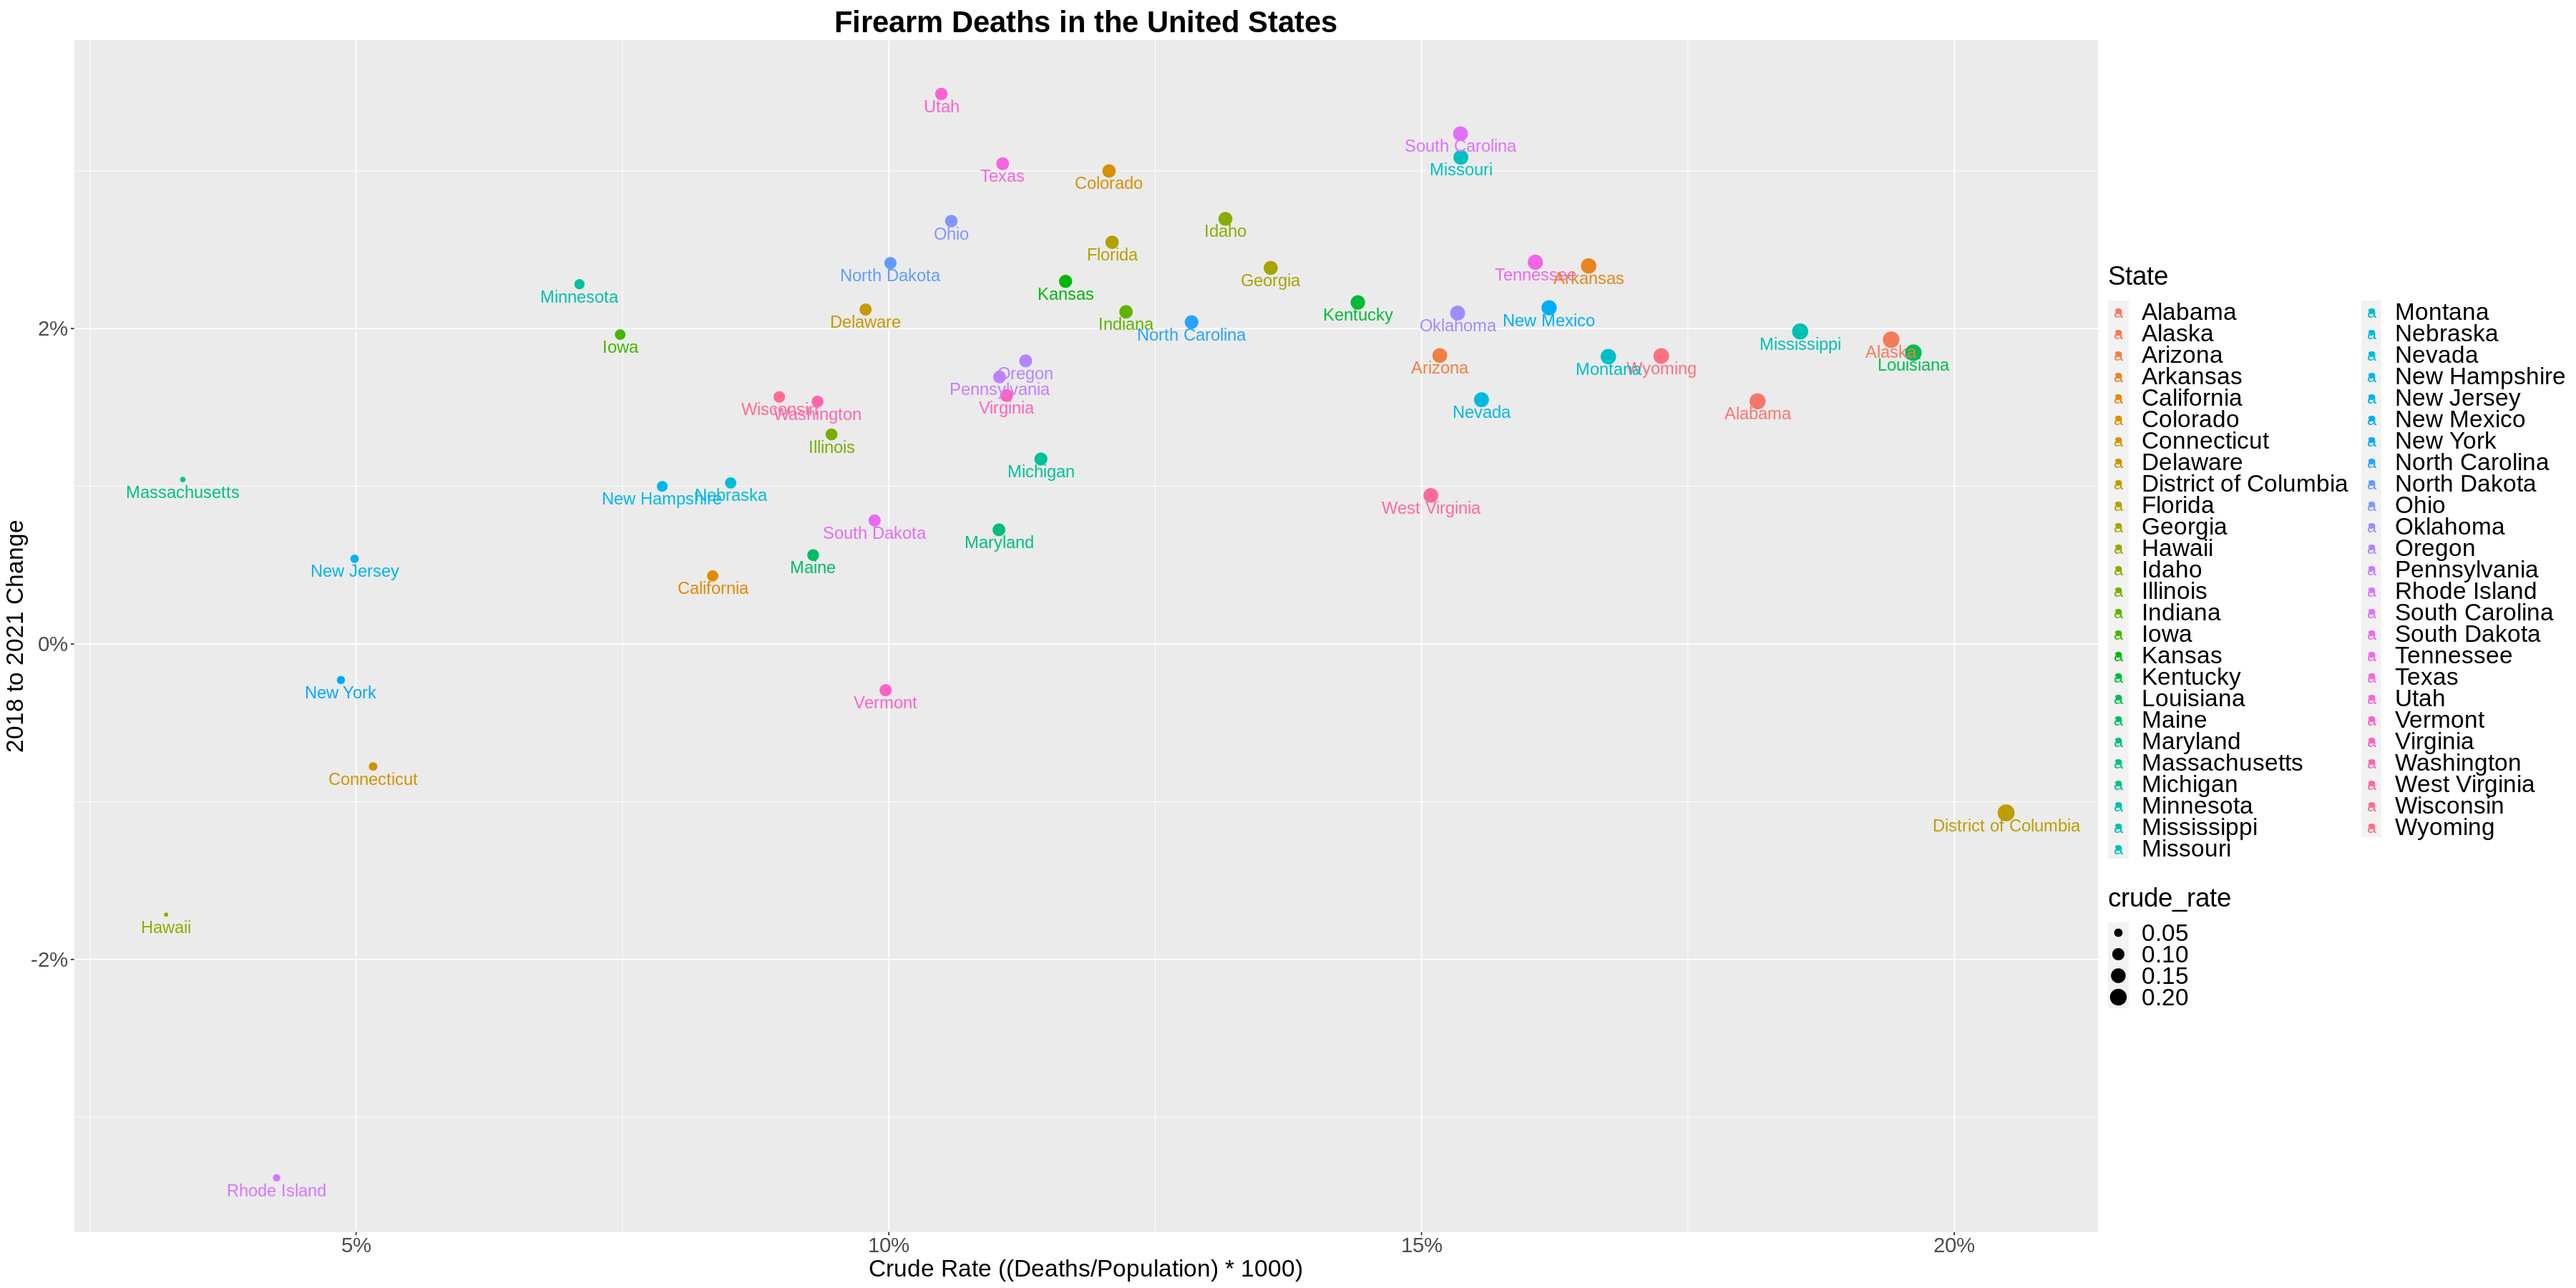

In [95]:
options(repr.plot.width=30, repr.plot.height=15)

cdc_by_state$Year <- as.numeric(as.character(cdc_by_state$Year))
cdc_by_state$State <- factor(cdc_by_state$State)

top_bottom_states_all %>%
  ggplot(aes(x = crude_rate, y = avg_growth_rate, color=State)) +
  geom_point(aes(size = crude_rate)) +
  geom_text(aes(x = crude_rate, y = avg_growth_rate, label=State), hjust = 0.5, vjust = 1.5, cex = 5) +
  theme(axis.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        legend.box.spacing = unit(0.1, "cm"),
        legend.title = element_text(size = 22),
        axis.text.x = element_text(size = rel(2)),
        axis.text.y = element_text(size = rel(2)),
        plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2))+
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent) +
  ggtitle("Firearm Deaths in the United States") +
  guides(colour=guide_legend(ncol=2)) +
  xlab("Crude Rate ((Deaths/Population) * 1000)") +
  ylab("2018 to 2021 Change")

In [96]:
cdc_yoy <- cdc_2 %>%
  group_by(Year) %>%
  summarise(Deaths = sum(Deaths), Population = sum(Population)) %>%
  mutate(YoY = (((Deaths - lag(Deaths, 1))/Deaths)), YoY_Population = (((Population - lag(Population, 1))/Population)))

cdc_yoy

Year Deaths Population YoY           YoY_Population
1  1999 28575  279040168             NA          NA   
2  2000 28393  281421906  -0.0064100306 0.008463229   
3  2001 29250  284968955   0.0292991453 0.012447142   
4  2002 29942  287625193   0.0231113486 0.009235067   
5  2003 29789  290107933  -0.0051361241 0.008557987   
6  2004 29258  292805298  -0.0181488824 0.009212145   
7  2005 30364  295516599   0.0364247135 0.009174784   
8  2006 30536  298379912   0.0056326958 0.009596199   
9  2007 30873  301231207   0.0109156868 0.009465470   
10 2008 31267  304093966   0.0126011450 0.009414061   
11 2009 31014  306771529  -0.0081576062 0.008728199   
12 2010 31328  308745538   0.0100229826 0.006393644   
13 2011 31897  311591917   0.0178386682 0.009134958   
14 2012 33092  313914040   0.0361114469 0.007397321   
15 2013 33169  316128839   0.0023214447 0.007006001   
16 2014 33130  318857056  -0.0011771808 0.008556238   
17 2015 35768  321418820   0.0737530754 0.007970174   
18 2016 38148  323127513   0.0623885918 0.005287984   
19 2017 39220  325719178   0.0273329934 0.007956747   
20 2018 39201  327167434  -0.0004846815 0.004426651   
21 2019 39187  328239523  -0.0003572613 0.003266179   
22 2020 44611  329484123   0.1215843626 0.003777420

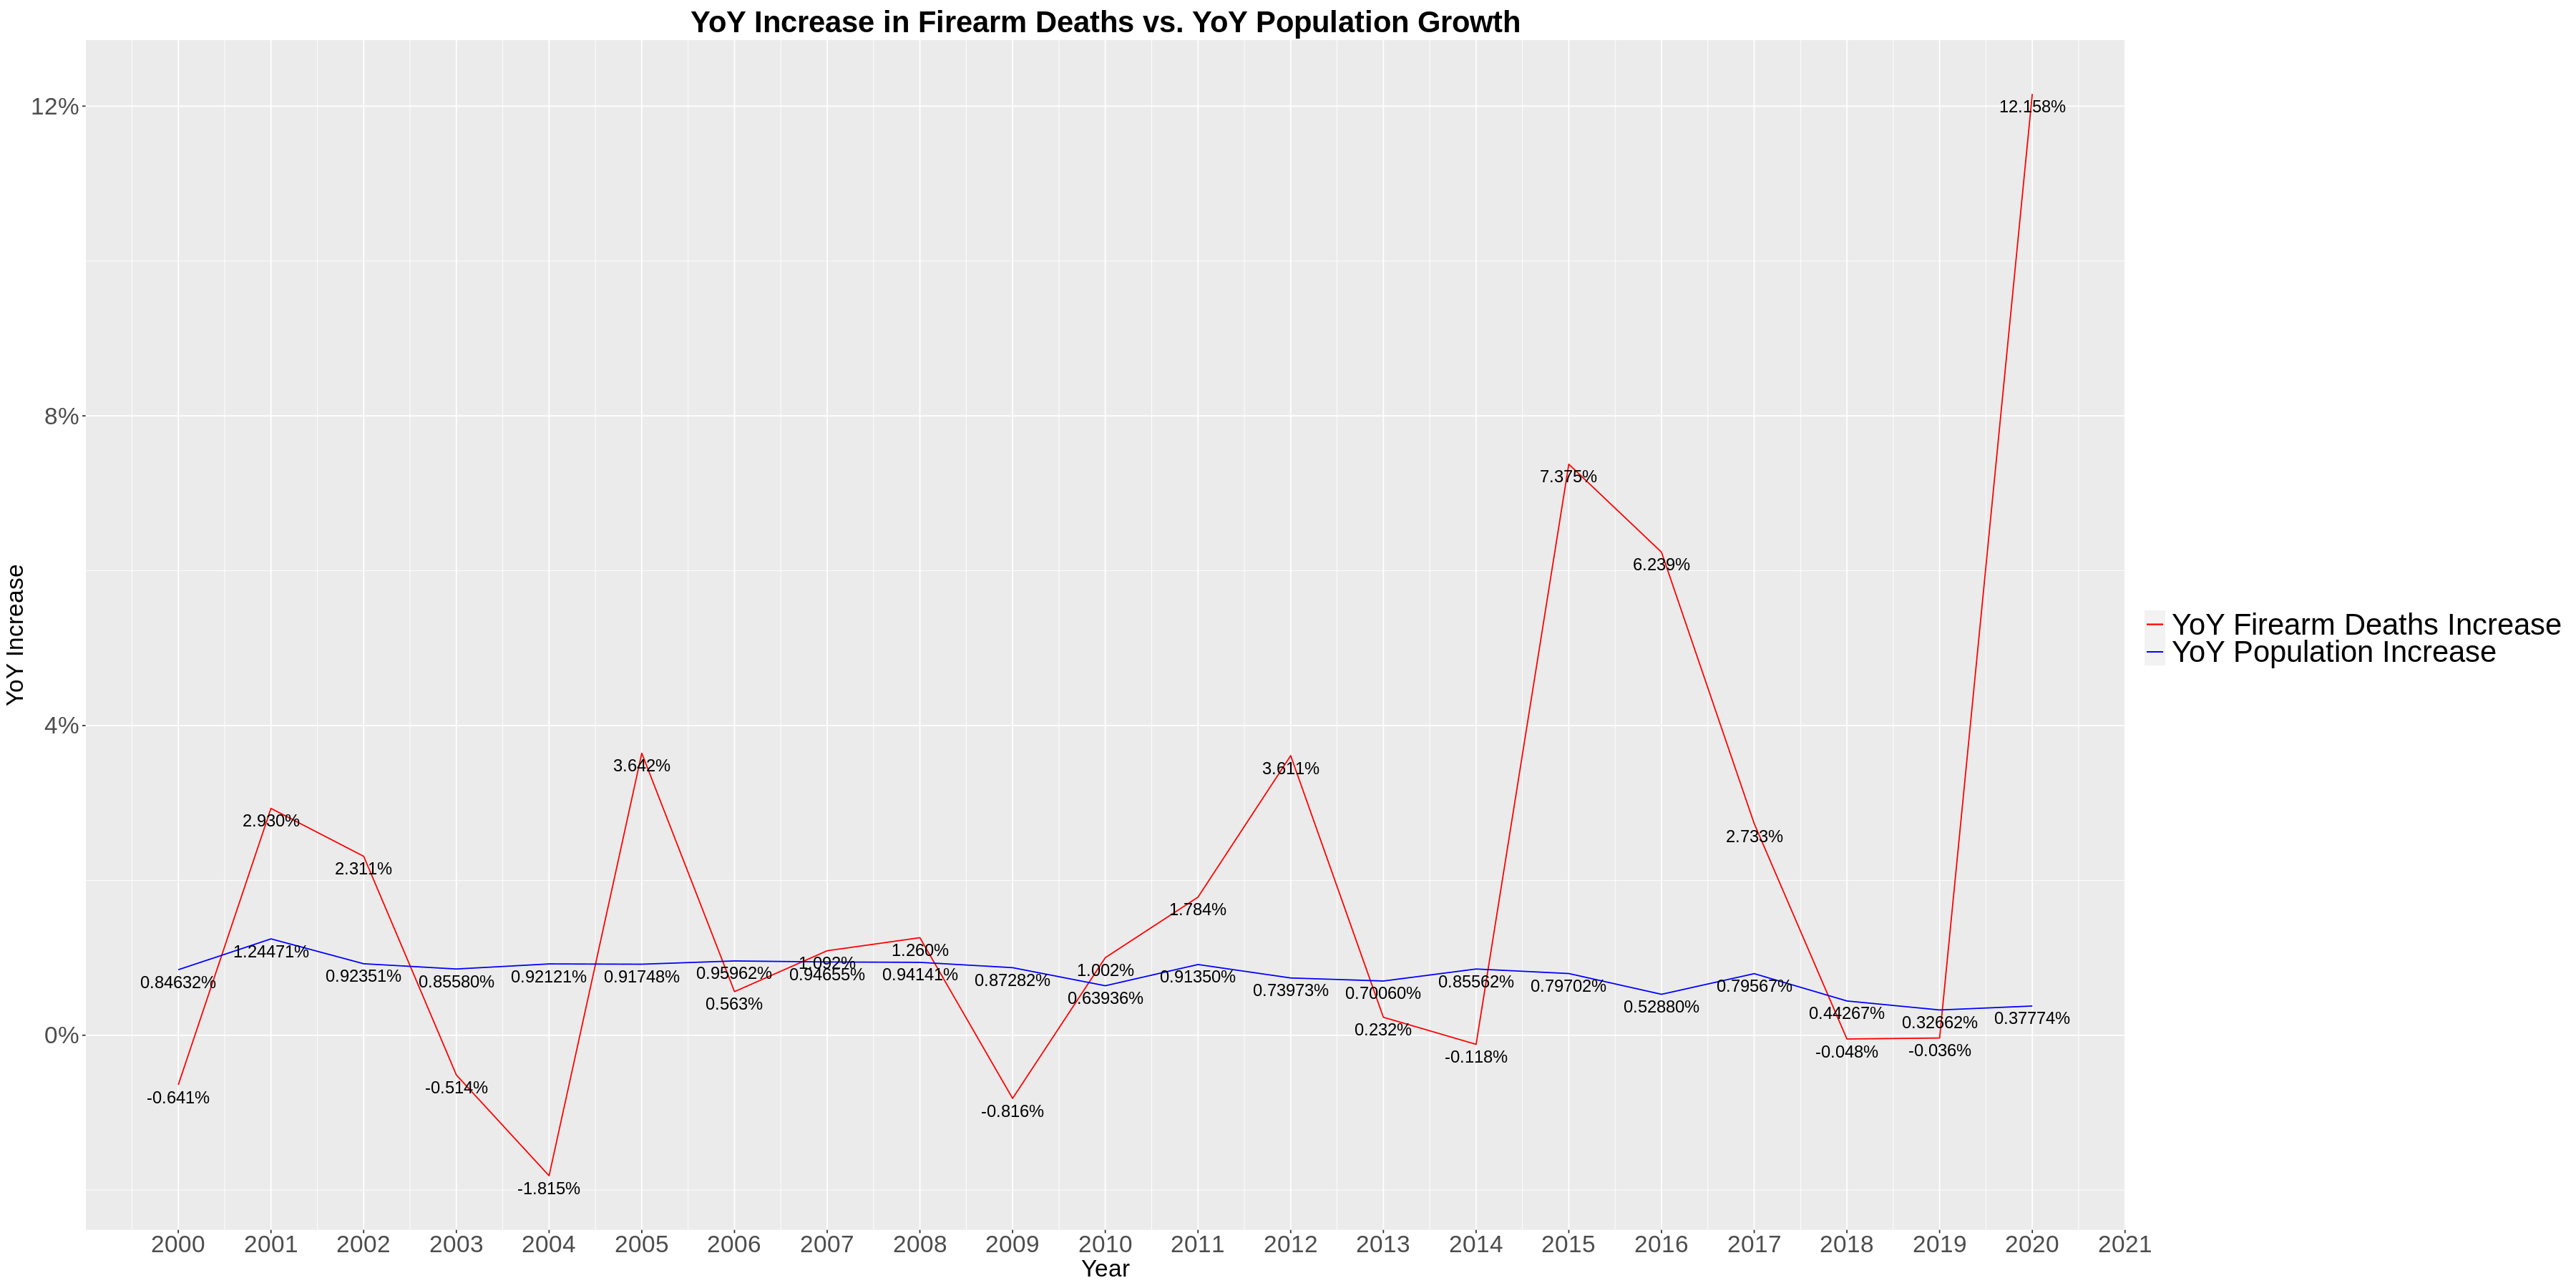

In [97]:
options(repr.plot.width=30, repr.plot.height=15)

cdc_yoy$Year <- as.numeric(as.character(cdc_yoy$Year))

cdc_yoy %>%
filter(!(is.na(YoY))) %>%
ggplot(aes(x = Year)) +
  geom_line(aes(y = YoY, color = "YoY Firearm Deaths Increase")) +
  geom_line(aes(y = YoY_Population, color = "YoY Population Increase")) +
  scale_color_manual(values = c("red", "blue")) +
  labs(title = "YoY Increase in Firearm Deaths vs. YoY Population Growth", x = "Year", y = "YoY Increase") +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(breaks = seq(2000, 2021, 1)) +
  geom_text(aes(x = Year, y = YoY, label = scales::percent(YoY)), vjust = 1.5, cex = 5) +
  geom_text(aes(x = Year, y = YoY_Population, label = scales::percent(YoY_Population)), vjust = 1.5, cex = 5) +
  theme(
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 10),
    legend.title = element_blank(),
    legend.text = element_text(size = 25),
    plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
    axis.text.x = element_text(size = rel(2)),
    axis.text.y = element_text(size = rel(2)),
  )


In [98]:
# x <- drive_get("~/deaths_by_month_3.txt")
# drive_download(x, overwrite = TRUE)
cdc_3_1 <- read.table("/content/deaths_by_month_3.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc_3_1 <- cdc_3_1[,-1]
cdc_3_1 <- cdc_3_1 %>%
    filter(Year == 2021)

In [99]:
# x <- drive_get("~/deaths_by_month_3_v2.txt")
# drive_download(x, overwrite = TRUE)
cdc_3_2 <- read.table("/content/deaths_by_month_3_v2.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc_3_2 <- cdc_3_2[,-1]

In [100]:
cdc_3 = rbind(cdc_3_1, cdc_3_2)

In [101]:
glimpse(cdc_3)
head(cdc_3)

Rows: 1,104
Columns: 9
$ Year                       <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2…
$ Year.Code                  <int> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2…
$ Month                      <chr> "Jan., 2021 ", "Jan., 2021 ", "Jan., 2021 "…
$ Month.Code                 <chr> "2021/01", "2021/01", "2021/01", "2021/01",…
$ ICD.10.113.Cause.List      <chr> "Accidental discharge of firearms (W32-W34)…
$ ICD.10.113.Cause.List.Code <chr> "GR113-119", "GR113-125", "GR113-128", "GR1…
$ Deaths                     <chr> "45", "2148", "1703", "43", "48", "1976", "…
$ Population                 <chr> "Not Applicable", "Not Applicable", "Not Ap…
$ Crude.Rate                 <chr> "Not Applicable", "Not Applicable", "Not Ap…


Year Year.Code Month       Month.Code
1 2021 2021      Jan., 2021  2021/01   
2 2021 2021      Jan., 2021  2021/01   
3 2021 2021      Jan., 2021  2021/01   
4 2021 2021      Jan., 2021  2021/01   
5 2021 2021      Feb., 2021  2021/02   
6 2021 2021      Feb., 2021  2021/02   
  ICD.10.113.Cause.List                                             
1 Accidental discharge of firearms (W32-W34)                        
2 Intentional self-harm (suicide) by discharge of firearms (X72-X74)
3 Assault (homicide) by discharge of firearms (*U01.4,X93-X95)      
4 Discharge of firearms, undetermined intent (Y22-Y24)              
5 Accidental discharge of firearms (W32-W34)                        
6 Intentional self-harm (suicide) by discharge of firearms (X72-X74)
  ICD.10.113.Cause.List.Code Deaths Population     Crude.Rate    
1 GR113-119                  45     Not Applicable Not Applicable
2 GR113-125                  2148   Not Applicable Not Applicable
3 GR113-128                  1703   Not Applicable Not Applicable
4 GR113-132                  43     Not Applicable Not Applicable
5 GR113-119                  48     Not Applicable Not Applicable
6 GR113-125                  1976   Not Applicable Not Applicable

In [102]:
cdc_3 = subset(cdc_3, select = -c(Population, Crude.Rate))

In [103]:
summary(cdc_3)

      Year        Year.Code       Month            Month.Code       
 Min.   :1999   Min.   :1999   Length:1104        Length:1104       
 1st Qu.:2004   1st Qu.:2004   Class :character   Class :character  
 Median :2010   Median :2010   Mode  :character   Mode  :character  
 Mean   :2010   Mean   :2010                                        
 3rd Qu.:2016   3rd Qu.:2016                                        
 Max.   :2021   Max.   :2021                                        
 ICD.10.113.Cause.List ICD.10.113.Cause.List.Code    Deaths         
 Length:1104           Length:1104                Length:1104       
 Class :character      Class :character           Class :character  
 Mode  :character      Mode  :character           Mode  :character  
                                                                    
                                                                    
                                                                    

In [104]:
cdc_3 %>%
  filter(Deaths == 'Suppressed')

Year Year.Code Month      Month.Code
1 2003 2003      Feb., 2003 2003/02   
2 2006 2006      Jun., 2006 2006/06   
3 2009 2009      Jul., 2009 2009/07   
4 2011 2011      Jun., 2011 2011/06   
  ICD.10.113.Cause.List                               
1 Discharge of firearms, undetermined intent (Y22-Y24)
2 Discharge of firearms, undetermined intent (Y22-Y24)
3 Discharge of firearms, undetermined intent (Y22-Y24)
4 Discharge of firearms, undetermined intent (Y22-Y24)
  ICD.10.113.Cause.List.Code Deaths    
1 GR113-132                  Suppressed
2 GR113-132                  Suppressed
3 GR113-132                  Suppressed
4 GR113-132                  Suppressed

In [105]:
cdc_3 <- cdc_3[cdc_3$Deaths != 'Suppressed',]

cdc_3$Deaths = as.integer(cdc_3$Deaths)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


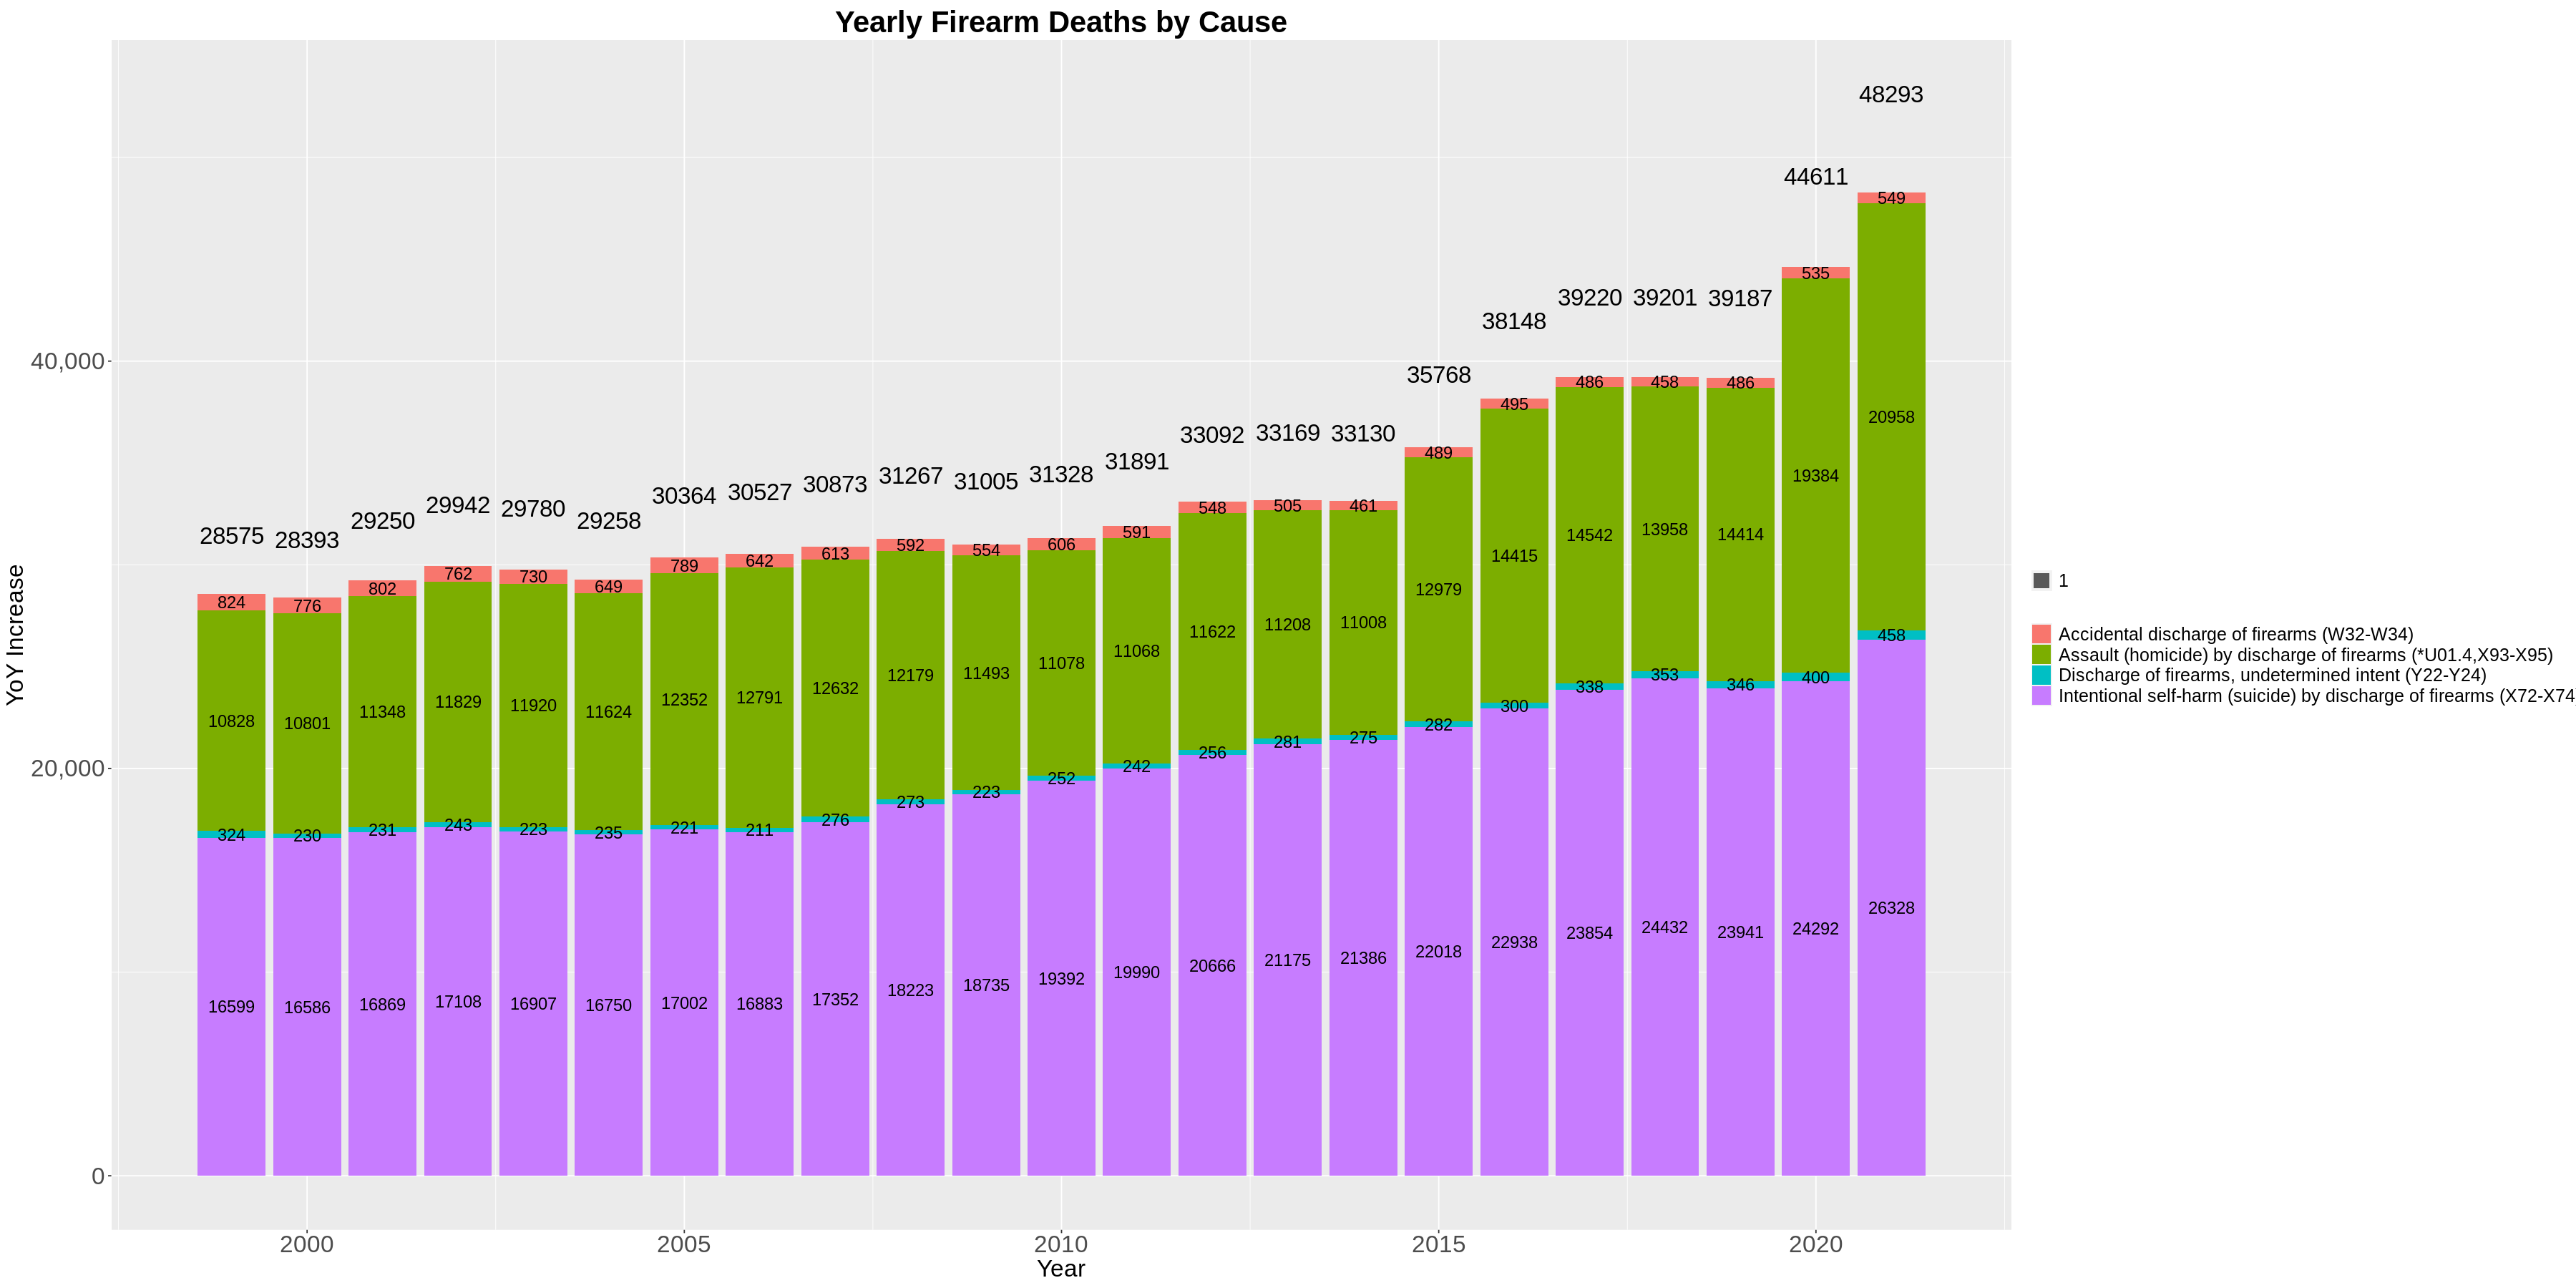

In [106]:
cdc_3 %>%
  group_by(Year, ICD.10.113.Cause.List) %>%
  summarise(Deaths = sum(Deaths))  %>%
  arrange(Year, desc(Deaths)) %>%
  ggplot(aes(x = Year, fill = ICD.10.113.Cause.List, y = Deaths, label = Deaths)) +
  geom_bar(position="stack", stat="sum") +
  geom_text(size = 5, position = position_stack(vjust = 0.5)) +
  geom_text(aes(label = after_stat(y), group = Year), stat = 'summary', fun = sum, size = 7, position = position_stack(vjust = 1.1)) +
  labs(title = "Yearly Firearm Deaths by Cause", x = "Year", y = "YoY Increase") +
  scale_y_continuous(labels = scales::label_comma()) +
  theme(
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 10),
    legend.title = element_blank(),
    legend.text = element_text(size = 15),
    plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
    axis.text.x = element_text(size = rel(2)),
    axis.text.y = element_text(size = rel(2)),
  )

In [111]:
## final export
write.csv(cdc_by_state, "cdc_by_state.csv", row.names=FALSE)
write.csv(cdc_3, "cdc_by_death_cause.csv", row.names=FALSE)



In [112]:
# x <- drive_get("~/deaths_by_month_4_v2.txt")
# drive_download(x, overwrite = TRUE)
cdc_4_1 <- read.table("/content/deaths_by_month_4_v2.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc_4_1 <- cdc_4_1[,-1]
cdc_4_1 <- cdc_4_1 %>%
    filter(Year == 2021)

In [113]:
# x <- drive_get("~/deaths_by_month_4_v1.txt")
# drive_download(x, overwrite = TRUE)
cdc_4_2 <- read.table("/content/deaths_by_month_4_v1.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc_4_2 <- cdc_4_2[,-1]

In [114]:
cdc_4 = rbind(cdc_4_1, cdc_4_2)

In [115]:
glimpse(cdc_4)
head(cdc_4)

Rows: 14,076
Columns: 9
$ State      <chr> "Alabama", "Alabama", "Alabama", "Alabama", "Alabama", "Ala…
$ State.Code <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Year       <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,…
$ Year.Code  <int> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,…
$ Month      <chr> "Jan., 2021 ", "Feb., 2021 ", "Mar., 2021 ", "Apr., 2021 ",…
$ Month.Code <chr> "2021/01", "2021/02", "2021/03", "2021/04", "2021/05", "202…
$ Deaths     <chr> "122", "104", "103", "102", "108", "128", "111", "105", "11…
$ Population <chr> "Not Applicable", "Not Applicable", "Not Applicable", "Not …
$ Crude.Rate <chr> "Not Applicable", "Not Applicable", "Not Applicable", "Not …


State   State.Code Year Year.Code Month       Month.Code Deaths
1 Alabama 1          2021 2021      Jan., 2021  2021/01    122   
2 Alabama 1          2021 2021      Feb., 2021  2021/02    104   
3 Alabama 1          2021 2021      Mar., 2021  2021/03    103   
4 Alabama 1          2021 2021      Apr., 2021  2021/04    102   
5 Alabama 1          2021 2021      May, 2021   2021/05    108   
6 Alabama 1          2021 2021      Jun., 2021  2021/06    128   
  Population     Crude.Rate    
1 Not Applicable Not Applicable
2 Not Applicable Not Applicable
3 Not Applicable Not Applicable
4 Not Applicable Not Applicable
5 Not Applicable Not Applicable
6 Not Applicable Not Applicable

In [116]:
cdc_4 = subset(cdc_4, select = -c(Population, Crude.Rate))

In [117]:
summary(cdc_4)

    State             State.Code         Year        Year.Code   
 Length:14076       Min.   : 1.00   Min.   :1999   Min.   :1999  
 Class :character   1st Qu.:16.00   1st Qu.:2004   1st Qu.:2004  
 Mode  :character   Median :29.00   Median :2010   Median :2010  
                    Mean   :28.96   Mean   :2010   Mean   :2010  
                    3rd Qu.:42.00   3rd Qu.:2016   3rd Qu.:2016  
                    Max.   :56.00   Max.   :2021   Max.   :2021  
    Month            Month.Code           Deaths         
 Length:14076       Length:14076       Length:14076      
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

In [118]:
cdc_4 %>%
  filter(Deaths == 'Suppressed')

State         State.Code Year Year.Code Month       Month.Code Deaths    
1    Alaska         2         2021 2021      Sep., 2021  2021/09    Suppressed
2    Delaware      10         2021 2021      Feb., 2021  2021/02    Suppressed
3    Hawaii        15         2021 2021      Jan., 2021  2021/01    Suppressed
4    Hawaii        15         2021 2021      Feb., 2021  2021/02    Suppressed
5    Hawaii        15         2021 2021      Mar., 2021  2021/03    Suppressed
6    Hawaii        15         2021 2021      Apr., 2021  2021/04    Suppressed
7    Hawaii        15         2021 2021      May, 2021   2021/05    Suppressed
8    Hawaii        15         2021 2021      Jun., 2021  2021/06    Suppressed
9    Hawaii        15         2021 2021      Jul., 2021  2021/07    Suppressed
10   Hawaii        15         2021 2021      Sep., 2021  2021/09    Suppressed
11   Hawaii        15         2021 2021      Oct., 2021  2021/10    Suppressed
12   Hawaii        15         2021 2021      Nov., 2021  2021/11    Suppressed
13   Hawaii        15         2021 2021      Dec., 2021  2021/12    Suppressed
14   Maine         23         2021 2021      Jul., 2021  2021/07    Suppressed
15   New Hampshire 33         2021 2021      Apr., 2021  2021/04    Suppressed
16   New Hampshire 33         2021 2021      Jul., 2021  2021/07    Suppressed
17   New Hampshire 33         2021 2021      Oct., 2021  2021/10    Suppressed
18   North Dakota  38         2021 2021      Feb., 2021  2021/02    Suppressed
19   North Dakota  38         2021 2021      Apr., 2021  2021/04    Suppressed
20   North Dakota  38         2021 2021      Jun., 2021  2021/06    Suppressed
21   North Dakota  38         2021 2021      Oct., 2021  2021/10    Suppressed
22   Rhode Island  44         2021 2021      Jan., 2021  2021/01    Suppressed
23   Rhode Island  44         2021 2021      Feb., 2021  2021/02    Suppressed
24   Rhode Island  44         2021 2021      Mar., 2021  2021/03    Suppressed
25   Rhode Island  44         2021 2021      Apr., 2021  2021/04    Suppressed
26   Rhode Island  44         2021 2021      May, 2021   2021/05    Suppressed
27   Rhode Island  44         2021 2021      Jun., 2021  2021/06    Suppressed
28   Rhode Island  44         2021 2021      Jul., 2021  2021/07    Suppressed
29   Rhode Island  44         2021 2021      Aug., 2021  2021/08    Suppressed
30   Rhode Island  44         2021 2021      Sep., 2021  2021/09    Suppressed
⋮    ⋮             ⋮          ⋮    ⋮         ⋮           ⋮          ⋮         
2315 Wyoming       56         2016 2016      May, 2016   2016/05    Suppressed
2316 Wyoming       56         2016 2016      Jun., 2016  2016/06    Suppressed
2317 Wyoming       56         2016 2016      Jul., 2016  2016/07    Suppressed
2318 Wyoming       56         2016 2016      Oct., 2016  2016/10    Suppressed
2319 Wyoming       56         2016 2016      Nov., 2016  2016/11    Suppressed
2320 Wyoming       56         2016 2016      Dec., 2016  2016/12    Suppressed
2321 Wyoming       56         2017 2017      Jan., 2017  2017/01    Suppressed
2322 Wyoming       56         2017 2017      Mar., 2017  2017/03    Suppressed
2323 Wyoming       56         2017 2017      Apr., 2017  2017/04    Suppressed
2324 Wyoming       56         2017 2017      May, 2017   2017/05    Suppressed
2325 Wyoming       56         2017 2017      Jul., 2017  2017/07    Suppressed
2326 Wyoming       56         2017 2017      Oct., 2017  2017/10    Suppressed
2327 Wyoming       56         2017 2017      Nov., 2017  2017/11    Suppressed
2328 Wyoming       56         2017 2017      Dec., 2017  2017/12    Suppressed
2329 Wyoming       56         2018 2018      Feb., 2018  2018/02    Suppressed
2330 Wyoming       56         2018 2018      Apr., 2018  2018/04    Suppressed
2331 Wyoming       56         2018 2018      May, 2018   2018/05    Suppressed
2332 Wyoming       56         2018 2018      Aug., 2018  2018/08    Suppressed
2333 Wyoming       56         2018 2018      Sep., 2018

In [119]:
## final export
write.csv(cdc_4, "cdc_by_state_month_with_suppressed_values.csv", row.names=FALSE)

# RAND EDA

In [120]:
install.packages('wordcloud')
install.packages('RColorBrewer')
install.packages('wordcloud2')
install.packages('tm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’




In [121]:
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)

Loading required package: RColorBrewer

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




In [123]:
lagpad <- function(x, k) {
  if (k>0 & (k %% 5 != 0)) {
    return (c(rep(NA, k), x)[1 : length(x)] );
  }
  else {
    return (c(x[(-k+1) : length(x)], rep(NA, -k)));
  }
}

In [124]:
# x <- drive_get("~/RAND.csv")
# drive_download(x, overwrite = TRUE)
rand <- read.csv("/content/RAND.csv", header = TRUE)

In [125]:
summary(rand)

    Law.ID             State           State.Postal.Abbreviation
 Length:2742        Length:2742        Length:2742              
 Class :character   Class :character   Class :character         
 Mode  :character   Mode  :character   Mode  :character         
                                                                
                                                                
                                                                
                                                                
   FIPS.Code     Law.Class..num.   Law.Class         Law.Class.Subtype 
 Min.   : 1.00   Min.   : 1.000   Length:2742        Length:2742       
 1st Qu.:15.00   1st Qu.: 4.000   Class :character   Class :character  
 Median :28.00   Median : 8.000   Mode  :character   Mode  :character  
 Mean   :28.24   Mean   : 8.114                                        
 3rd Qu.:41.00   3rd Qu.:12.000                                        
 Max.   :56.00   Max.   :19.000                 

In [126]:
glimpse(rand)
head(rand)

Rows: 2,742
Columns: 27
$ Law.ID                                        <chr> "AK1001", "AK1002", "AK1…
$ State                                         <chr> "Alaska", "Alaska", "Ala…
$ State.Postal.Abbreviation                     <chr> "AK", "AK", "AK", "AK", …
$ FIPS.Code                                     <int> 2, 2, 2, 2, 2, 2, 2, 2, …
$ Law.Class..num.                               <int> 1, 2, 2, 2, 3, 3, 4, 5, …
$ Law.Class                                     <chr> "background checks", "ca…
$ Law.Class.Subtype                             <chr> "private sales", "prohib…
$ Handguns.or.Long.Guns                         <chr> "handgun", "handgun", "h…
$ Effect                                        <chr> "", "Restrictive", "Perm…
$ Type.of.Change                                <chr> "", "Implement", "Modify…
$ Effective.Date                                <chr> "", "1978-01-01", "1994-…
$ Effective.Date.Note                           <chr> "", "See additional note…
$ Effective.Date

Law.ID State  State.Postal.Abbreviation FIPS.Code Law.Class..num.
1 AK1001 Alaska AK                        2         1              
2 AK1002 Alaska AK                        2         2              
3 AK1003 Alaska AK                        2         2              
4 AK1004 Alaska AK                        2         2              
5 AK1005 Alaska AK                        2         3              
6 AK1006 Alaska AK                        2         3              
  Law.Class                         Law.Class.Subtype                
1 background checks                 private sales                    
2 carrying a concealed weapon (ccw) prohibited                       
3 carrying a concealed weapon (ccw) shall issue                      
4 carrying a concealed weapon (ccw) shall issue (permit not required)
5 castle doctrine                                                    
6 castle doctrine                   expanded 2                       
  Handguns.or.Long.Guns   Effect      Type.of.Change ⋯ Supersession.Date
1 handgun                                            ⋯                  
2 handgun                 Restrictive Implement      ⋯ 1994-10-01       
3 handgun                 Permissive  Modify         ⋯ 2003-09-09       
4 handgun                 Permissive  Modify         ⋯                  
5 handgun and/or long gun Permissive  Modify         ⋯ 2006-09-13       
6 handgun and/or long gun Permissive  Modify         ⋯ 2013-09-18       
  Supersession.Date.Year Supersession.Date.Month Supersession.Date.Day
1   NA                   NA                      NA                   
2 1994                   10                       1                   
3 2003                    9                       9                   
4   NA                   NA                      NA                   
5 2006                    9                      13                   
6 2013                    9                      18                   
  Controlling.Law.at.Beginning.of.Period..1979. Age.for.Minimum.Age.Laws
1 1                                                                     
2 1                                                                     
3                                                                       
4                                                                       
5 1                                                                     
6                                                                       
  Length.of.Waiting.Period..days..handguns.
1                                          
2                                          
3                                          
4                                          
5                                          
6                                          
  Additional.Context.and.Notes                                                                                                                                                                                                                                                                                                                   
1                                                                                                                                                                                                                                                                                                                                                
2 Prior law prohibiting concealed carry enacted before 1966. Carl Bakal, "The Right to Bear Arms.". Replaced by  § 11.61.220 in 1978, which says "a person commits the crime of misconduct involving weapons in the third degree if he‚…knowingly possesses a deadly weapon other than an ordinary pocket knife, that is concealed on his person.
3                                                                                                                                                                                                  

In [127]:
rand_corpus_restrictive <- rand %>%
  filter(tolower(Effect) == 'restrictive')
rand_corpus_restrictive$Content = removeWords(rand_corpus_restrictive$Content, stopwords("english"))
rand_corpus_restrictive$Content = stripWhitespace(rand_corpus_restrictive$Content)
rand_corpus_restrictive <- Corpus(VectorSource(as.vector(rand_corpus_restrictive$Content)))
rand_corpus_restrictive

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1071

In [128]:
rand_corpus_permissive <- rand %>%
  filter(tolower(Effect) == 'permissive')
rand_corpus_permissive$Content = removeWords(rand_corpus_permissive$Content, stopwords("english"))
rand_corpus_permissive$Content = stripWhitespace(rand_corpus_permissive$Content)
rand_corpus_permissive <- Corpus(VectorSource(as.vector(rand_corpus_permissive$Content)))
rand_corpus_permissive

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 377

In [129]:
rand_wc_permissive <-  rand_corpus_permissive %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
rand_wc_permissive <- tm_map(rand_wc_permissive, content_transformer(tolower))
rand_wc_permissive <- tm_map(rand_wc_permissive, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(rand_wc_permissive, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(rand_wc_permissive, removeWords, stopwords("english")):
“transformation drops documents”


In [130]:
rand_wc_restrictive <-  rand_corpus_restrictive %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
rand_wc_restrictive <- tm_map(rand_wc_restrictive, content_transformer(tolower))
rand_wc_restrictive <- tm_map(rand_wc_restrictive, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(rand_wc_restrictive, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(rand_wc_restrictive, removeWords, stopwords("english")):
“transformation drops documents”


In [131]:
dtm <- TermDocumentMatrix(rand_wc_restrictive)
matrix <- as.matrix(dtm)
words <- sort(rowSums(matrix),decreasing=TRUE)
df_restrictive <- data.frame(word = names(words),freq=words) %>% filter(!(word %in% c('person', 'shall', 'the')))

dtm <- TermDocumentMatrix(rand_wc_permissive)
matrix <- as.matrix(dtm)
words <- sort(rowSums(matrix),decreasing=TRUE)
df_permissive <- data.frame(word = names(words),freq=words) %>% filter(!(word %in% c('person', 'shall', 'the')))

In [132]:
df_restrictive

word           freq
firearm        firearm        1836
section        section        1289
law            law             938
licensed       licensed        859
state          state           829
transferee     transferee      784
officer        officer         665
firearms       firearms        650
transfer       transfer        629
handgun        handgun         620
order          order           613
enforcement    enforcement     605
date           date            599
may            may             558
days           days            510
dealer         dealer          485
chief          chief           471
possession     possession      468
pursuant       pursuant        447
court          court           442
within         within          432
subsection     subsection      427
provided       provided        396
years          years           385
identification identification  382
transferor     transferor      380
statement      statement       365
information    information     361
pistol         pistol          353
department     department      351
⋮              ⋮              ⋮   
centers        centers        1   
homes          homes          1   
placements     placements     1   
felony         felony         1   
s              s              1   
battery        battery        1   
cohabits       cohabits       1   
comparable     comparable     1   
twentyeight    twentyeight    1   
petitioning    petitioning    1   
predicating    predicating    1   
sixtyone       sixtyone       1   
constitutions  constitutions  1   
sending        sending        1   
biometric      biometric      1   
coaches        coaches        1   
comprised      comprised      1   
counselors     counselors     1   
curricula      curricula      1   
guidance       guidance       1   
identities     identities     1   
isolated       isolated       1   
janitors       janitors       1   
librarians     librarians     1   
live           live           1   
managers       managers       1   
recurrent      recurrent      1   
scenario       scenario       1   
secretaries    secretaries    1   
“employee”     “employee”     1

In [133]:
df_permissive

word          freq
state         state         210 
force         force         204 
law           law           184 
section       section       182 
carry         carry         176 
permit        permit        160 
concealed     concealed     155 
license       license       149 
firearm       firearm       147 
castle        castle        144 
doctrine      doctrine      144 
applicant     applicant     135 
states        states        134 
deadly        deadly        133 
firearms      firearms      133 
united        united        132 
may           may           130 
handgun       handgun       115 
use           use           103 
retreat       retreat       100 
common        common         98 
county        county         96 
upon          upon           94 
century       century        94 
within        within         89 
possession    possession     88 
duty          duty           87 
using         using          87 
necessary     necessary      87 
application   application    86 
⋮             ⋮             ⋮   
razor         razor         1   
sent          sent          1   
siting        siting        1   
contains      contains      1   
incomplete    incomplete    1   
incorrect     incorrect     1   
materially    materially    1   
statements    statements    1   
correctional  correctional  1   
provisional   provisional   1   
proportionate proportionate 1   
saved         saved         1   
conflict      conflict      1   
gunpowder     gunpowder     1   
therewith     therewith     1   
account       account       1   
best          best          1   
detectives    detectives    1   
interests     interests     1   
merchant      merchant      1   
periods       periods       1   
profession    profession    1   
successive    successive    1   
travelers     travelers     1   
vocation      vocation      1   
distributed   distributed   1   
together      together      1   
forcefully    forcefully    1   
remove        remove        1   
xviii         xviii         1

In [141]:
options(repr.plot.width=15, repr.plot.height=7)

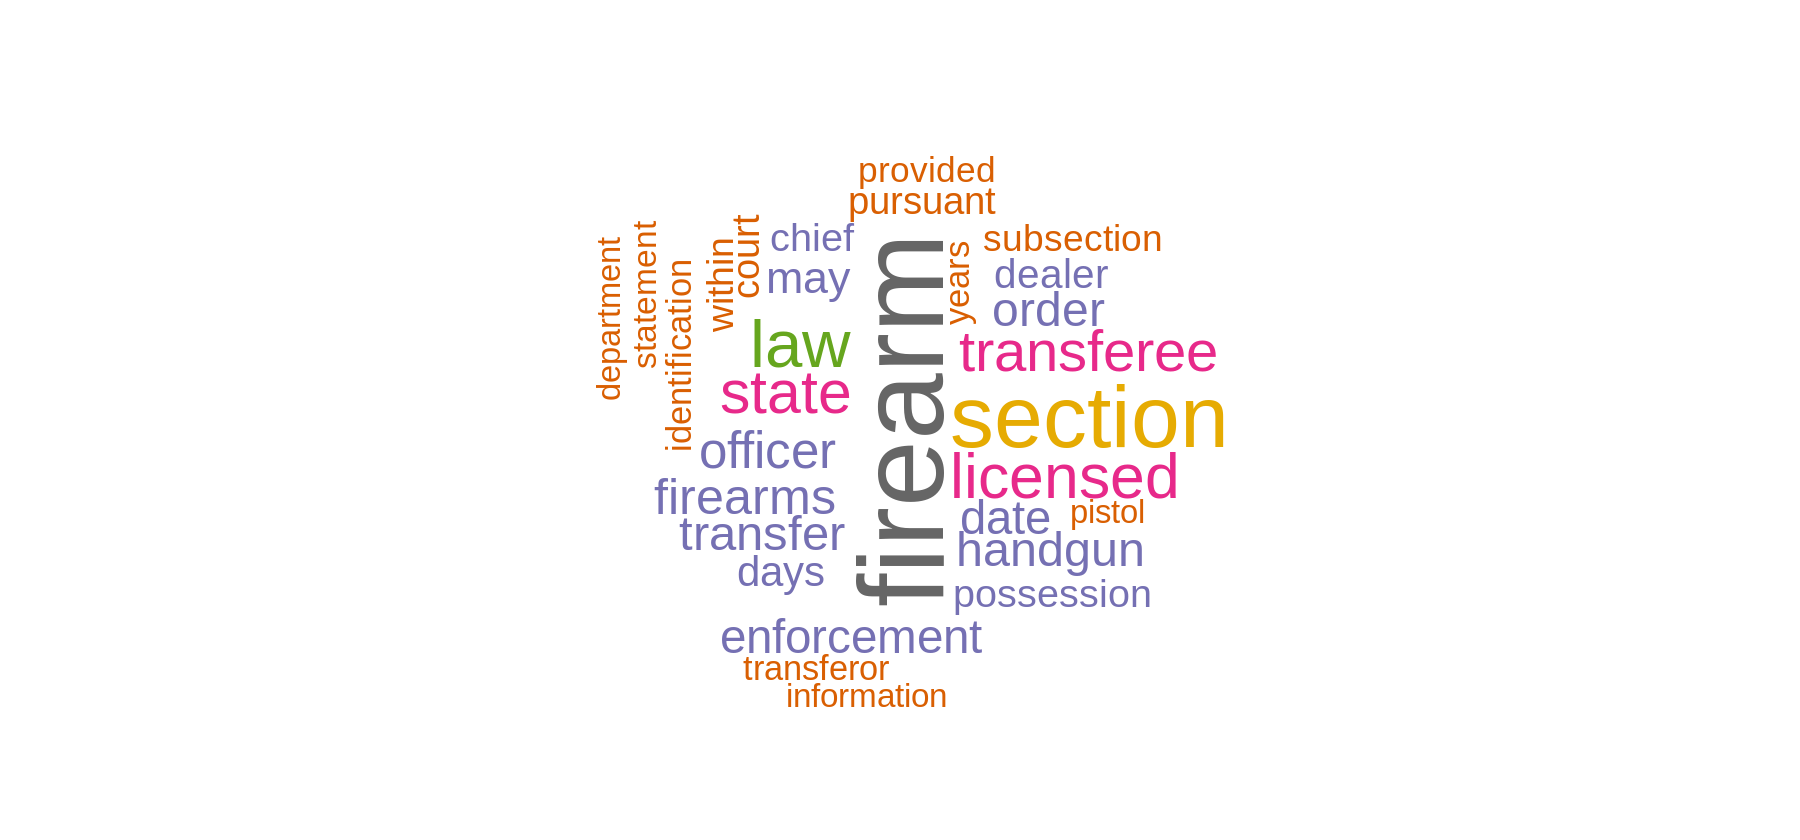

In [142]:
set.seed(1234) # for reproducibility
wordcloud(words = df_restrictive$word, freq = df_restrictive$freq, min.freq = 5,           max.words=30, random.order=FALSE, rot.per=0.35,            colors=brewer.pal(8, "Dark2"), scale=c(6,0.6))

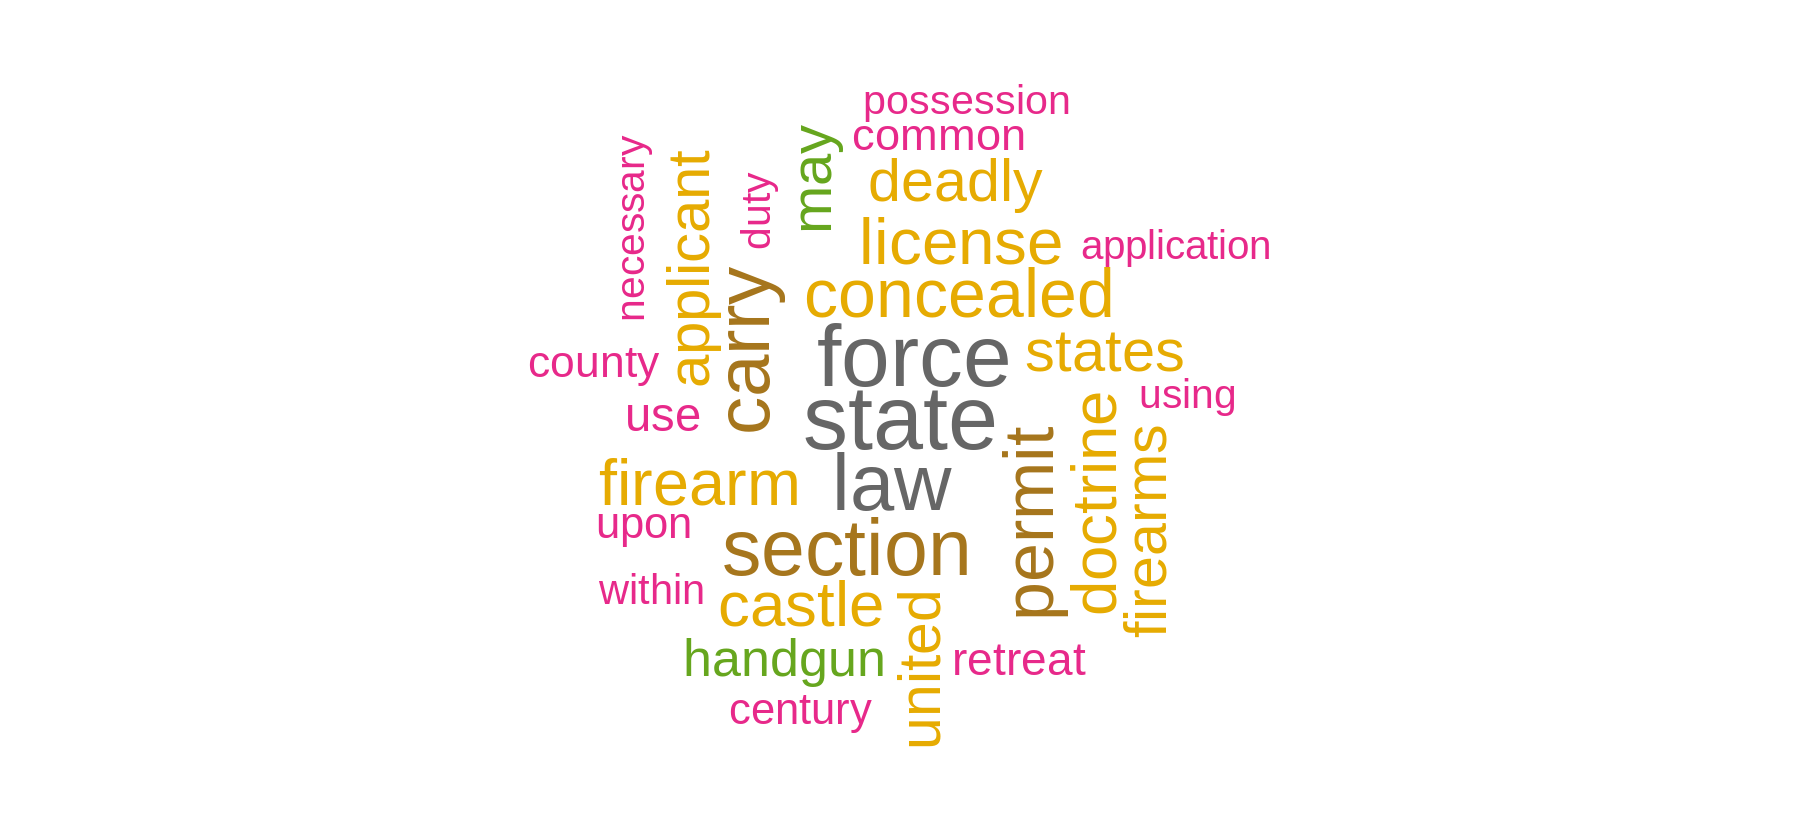

In [143]:
set.seed(2345) # for reproducibility
wordcloud(words = df_permissive$word, freq = df_permissive$freq, min.freq = 3,           max.words=30, random.order=FALSE, rot.per=0.35,            colors=brewer.pal(8, "Dark2"), scale=c(4.5,0.3))

In [144]:
## final export
write.csv(rand, "RAND.csv", row.names=FALSE)

# ICPSR EDA

In [145]:
lagpad <- function(x, k) {
  if (k>0 & (k %% 5 != 0)) {
    return (c(rep(NA, k), x)[1 : length(x)] );
  }
  else {
    return (c(x[(-k+1) : length(x)], rep(NA, -k)));
  }
}

In [146]:
# x <- drive_get("~/37363-0001-Data.tsv")
# drive_download(x, overwrite = TRUE)
icpsr <- read_tsv("/content/37363-0001-Data.tsv")

Rows: 1450 Columns: 137
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (1): STATE
dbl (136): YEAR, FELONY, INVCOMMITMENT, INVOUTPATIENT, DANGER, DRUGMISDEMEAN...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [147]:
summary(icpsr)

    STATE                YEAR          FELONY       INVCOMMITMENT   
 Length:1450        Min.   :1991   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:1998   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :2005   Median :1.0000   Median :0.0000  
                    Mean   :2005   Mean   :0.6841   Mean   :0.4648  
                    3rd Qu.:2012   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :2019   Max.   :1.0000   Max.   :1.0000  
 INVOUTPATIENT        DANGER       DRUGMISDEMEANOR   ALCTREATMENT    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   :0.2228   Mean   :0.4366   Mean   :0.1862   Mean   :0.09862  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
   ALCOHOLISM     RELINQUIS

In [148]:
glimpse(icpsr)
head(icpsr)

Rows: 1,450
Columns: 137
$ STATE                        <chr> "Alabama", "Alaska", "Arizona", "Arkansas…
$ YEAR                         <dbl> 1991, 1991, 1991, 1991, 1991, 1991, 1991,…
$ FELONY                       <dbl> 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,…
$ INVCOMMITMENT                <dbl> 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,…
$ INVOUTPATIENT                <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ DANGER                       <dbl> 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,…
$ DRUGMISDEMEANOR              <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,…
$ ALCTREATMENT                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ ALCOHOLISM                   <dbl> 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ RELINQUISHMENT               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ VIOLENT                      <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ VIOLENTH                     <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ VIOLENTPARTIA

STATE      YEAR FELONY INVCOMMITMENT INVOUTPATIENT DANGER DRUGMISDEMEANOR
1 Alabama    1991 0      0             0             0      0              
2 Alaska     1991 1      0             0             0      0              
3 Arizona    1991 0      1             1             1      0              
4 Arkansas   1991 1      1             0             1      0              
5 California 1991 1      1             0             1      0              
6 Colorado   1991 0      0             0             0      0              
  ALCTREATMENT ALCOHOLISM RELINQUISHMENT ⋯ EXPARTEDATING DVROSURRENDER
1 0            1          0              ⋯ 0             0            
2 0            0          0              ⋯ 0             0            
3 0            0          0              ⋯ 0             0            
4 0            0          0              ⋯ 0             0            
5 0            1          0              ⋯ 0             0            
6 0            0          0              ⋯ 0             0            
  DVROSURRENDERNOCONDITIONS DVROSURRENDERDATING EXPARTESURRENDER
1 0                         0                   0               
2 0                         0                   0               
3 0                         0                   0               
4 0                         0                   0               
5 0                         0                   0               
6 0                         0                   0               
  EXPARTESURRENDERNOCONDITIONS EXPARTESURRENDERDATING DVROREMOVAL STALKING
1 0                            0                      0           0       
2 0                            0                      0           0       
3 0                            0                      0           0       
4 0                            0                      0           0       
5 0                            0                      0           0       
6 0                            0                      0           0       
  LAWTOTAL
1 15      
2 10      
3 12      
4 15      
5 58      
6  9

In [149]:
## final export
write.csv(icpsr, "ICPSR.csv", row.names=FALSE)

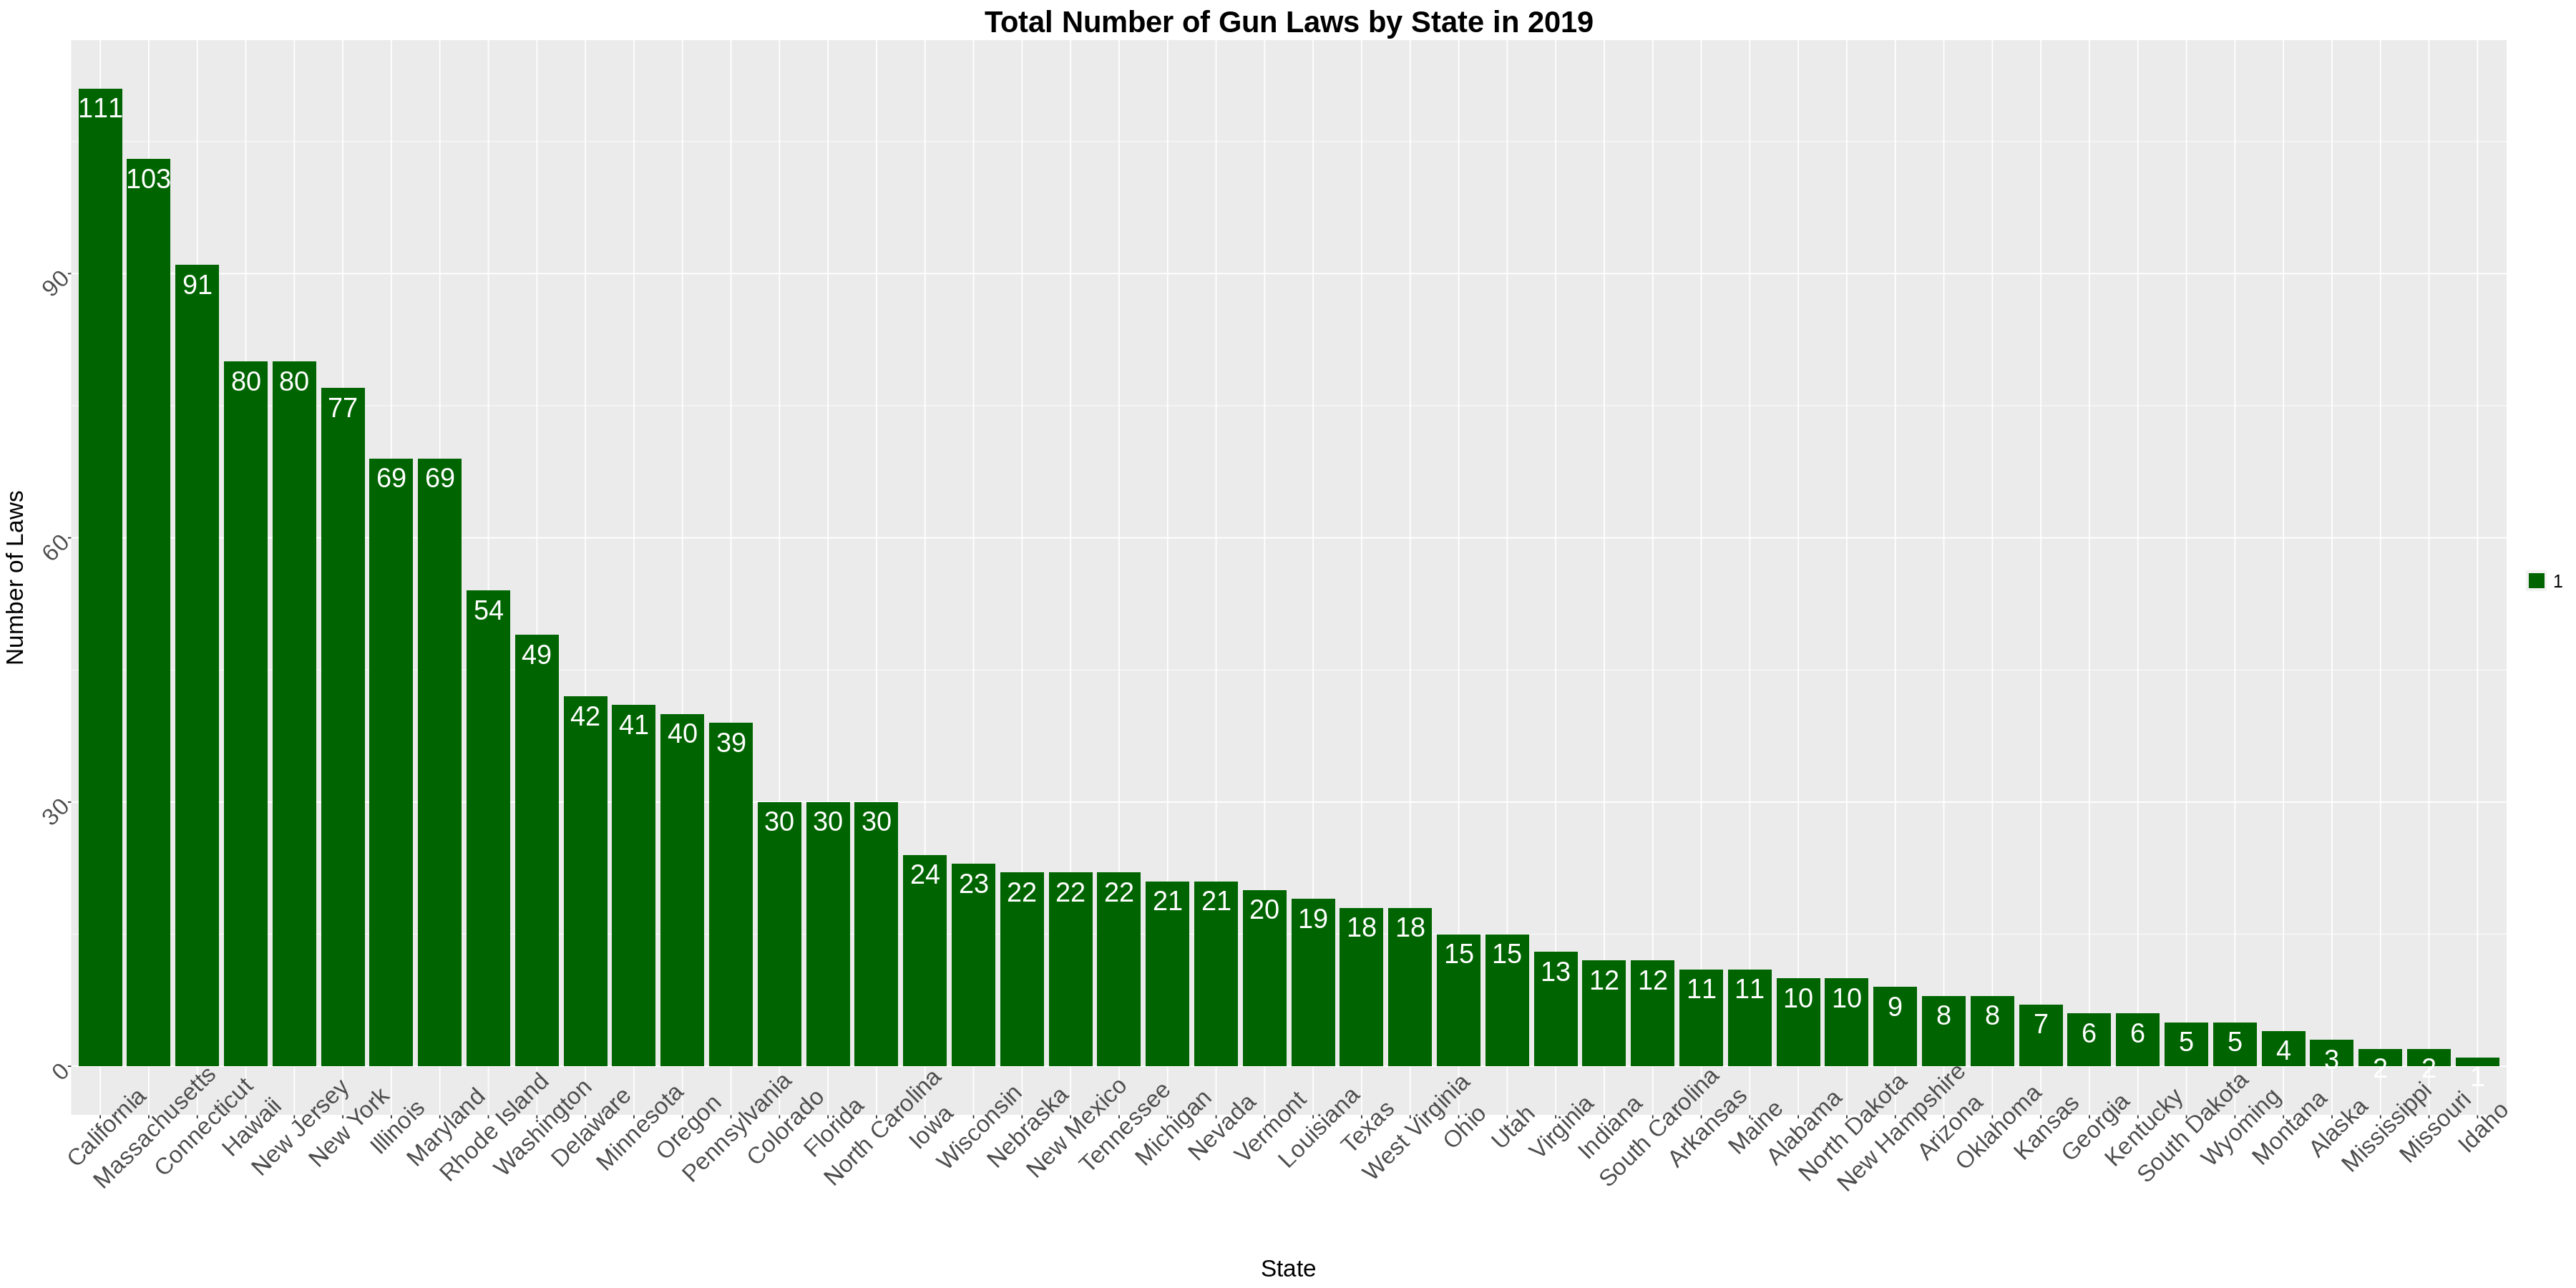

In [150]:
options(repr.plot.width=30, repr.plot.height=15)

icpsr %>%
  arrange(desc(LAWTOTAL)) %>%
  filter(YEAR == 2019) %>%
  ggplot(aes(x = reorder(STATE, -LAWTOTAL), y = LAWTOTAL)) +
    geom_bar(stat="sum", fill = 'darkgreen') +
    geom_text(aes(label = LAWTOTAL), vjust = 1.5, colour = "white", size = 8) +
    # geom_text(aes(label = after_stat(y), group = Year), stat = 'summary', fun = sum, size = 7, position = position_stack(vjust = 1.1)) +
    labs(title = "Total Number of Gun Laws by State in 2019", x = "State", y = "Number of Laws") +
    scale_y_continuous(labels = scales::label_comma()) +
    theme(
      axis.title = element_text(size = 20),
      axis.text = element_text(size = 10, angle = 45),
      legend.title = element_blank(),
      legend.text = element_text(size = 15),
      plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
      axis.text.x = element_text(size = rel(2)),
      axis.text.y = element_text(size = rel(2))
    )

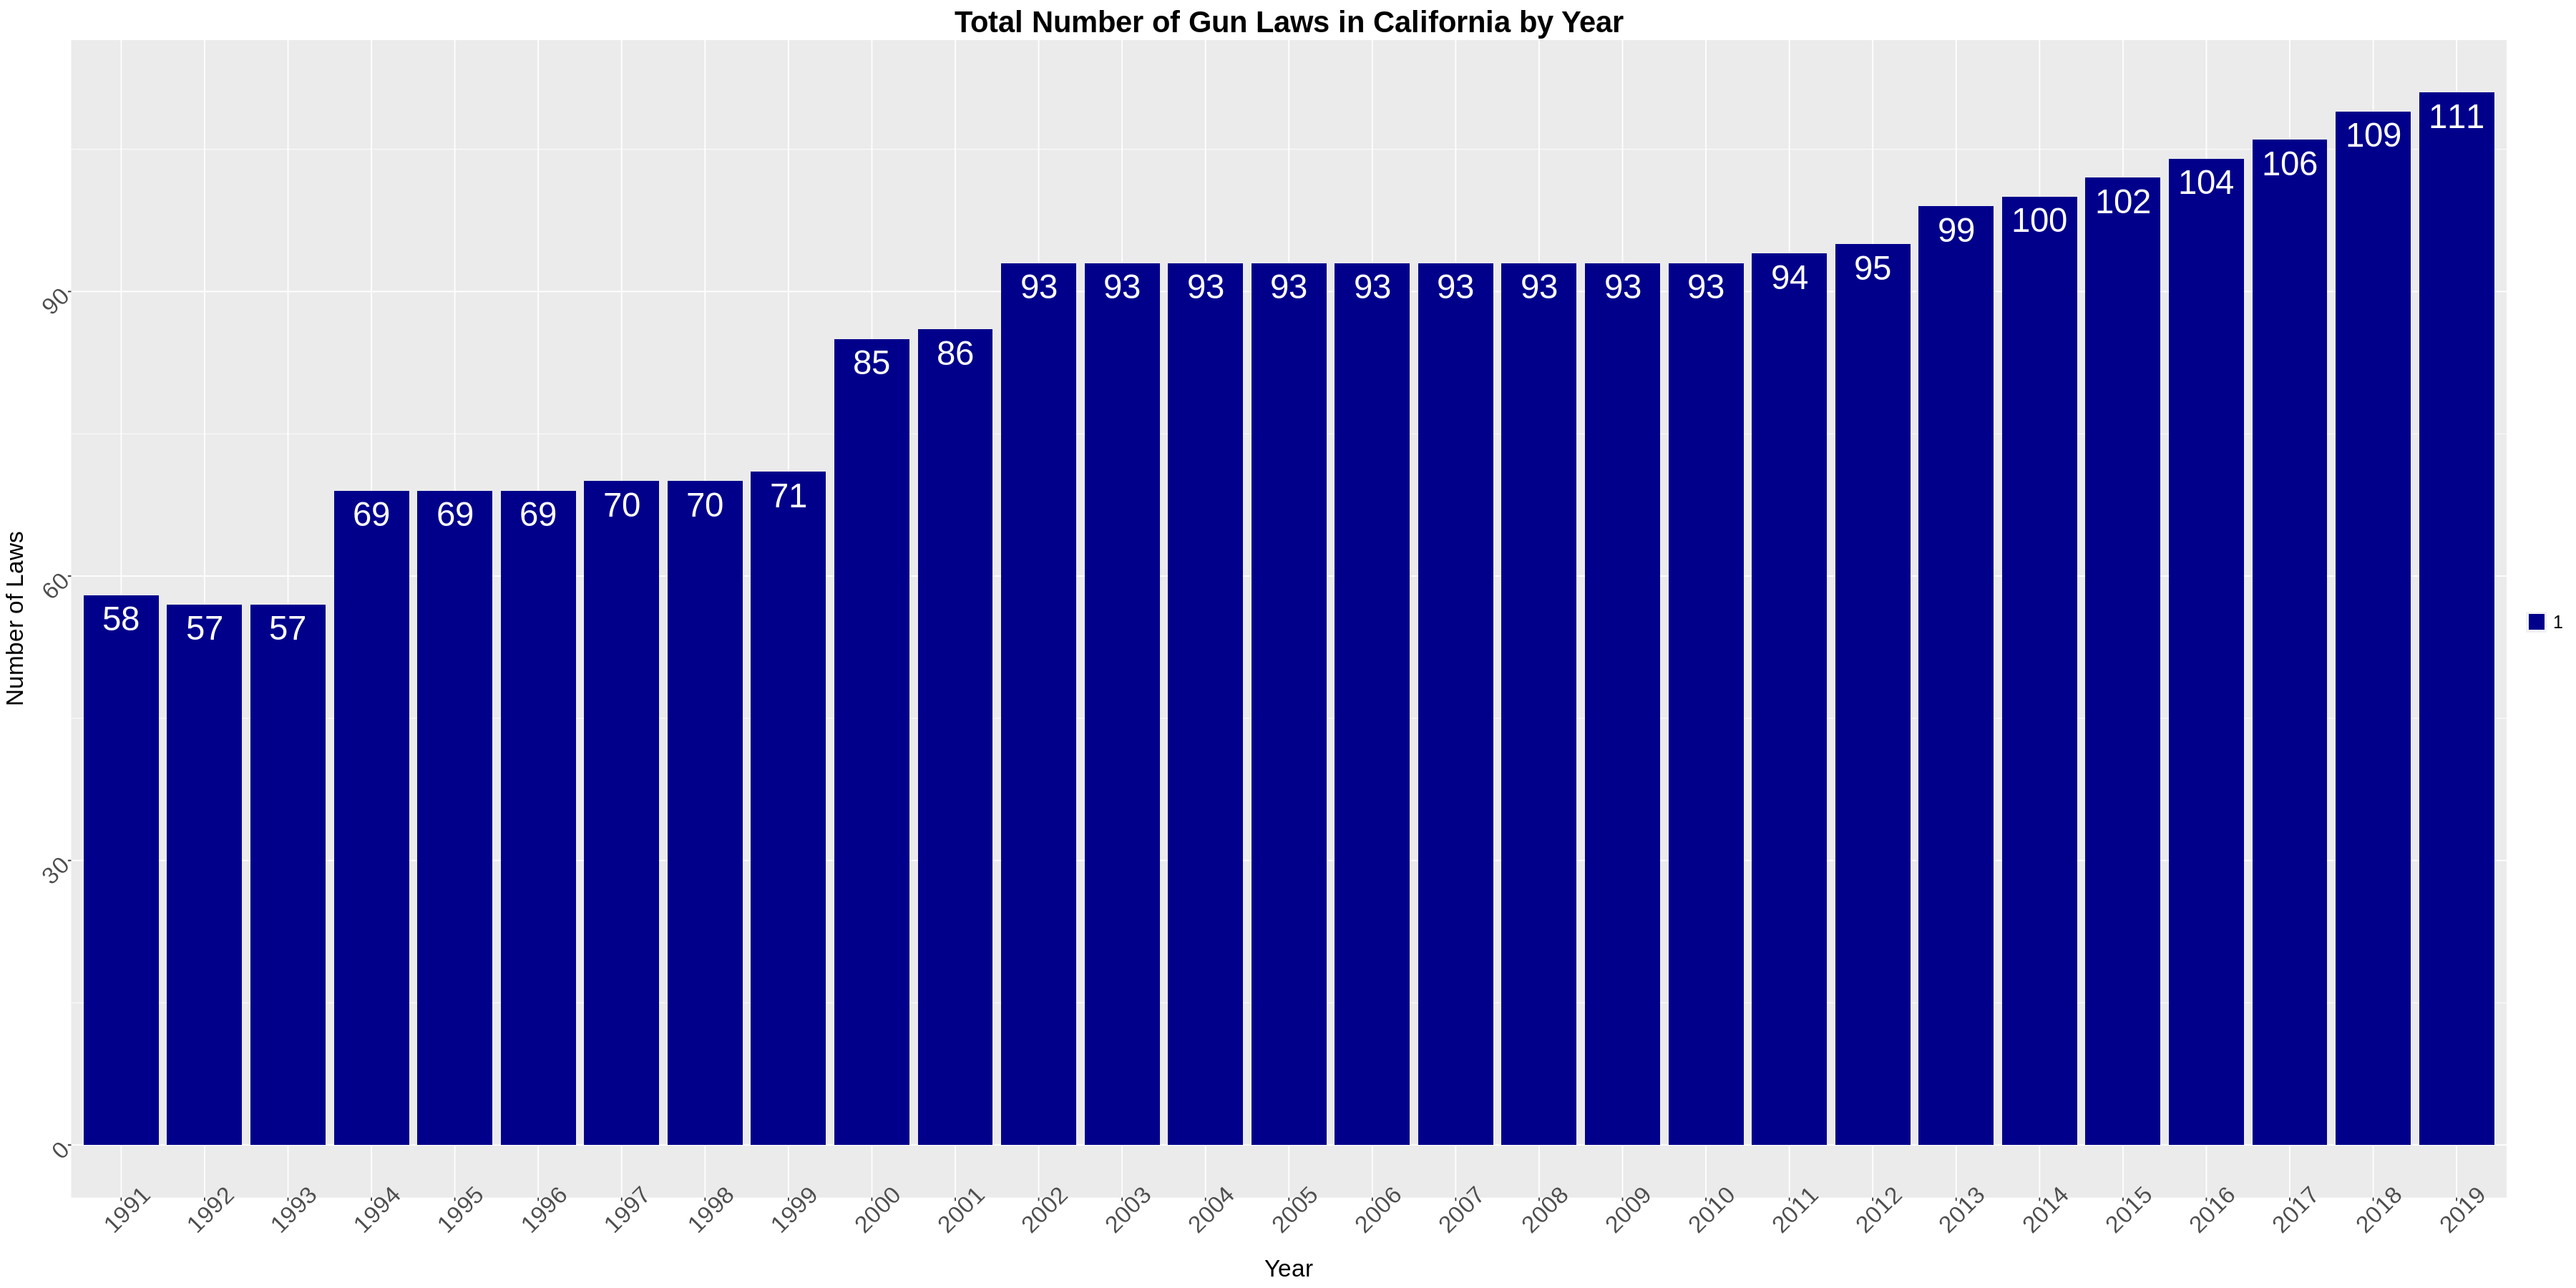

In [151]:
options(repr.plot.width=30, repr.plot.height=15)

icpsr %>%
  filter(tolower(STATE) == 'california') %>%
  ggplot(aes(x = reorder(YEAR, YEAR), y = LAWTOTAL)) +
    geom_bar(stat="sum", fill = 'darkblue') +
    geom_text(aes(label = LAWTOTAL), vjust = 1.5, colour = "white", size = 10) +
    # geom_text(aes(label = after_stat(y), group = Year), stat = 'summary', fun = sum, size = 7, position = position_stack(vjust = 1.1)) +
    labs(title = "Total Number of Gun Laws in California by Year", x = "Year", y = "Number of Laws") +
    scale_y_continuous(labels = scales::label_comma()) +
    theme(
      axis.title = element_text(size = 20),
      axis.text = element_text(size = 10, angle = 45),
      legend.title = element_blank(),
      legend.text = element_text(size = 15),
      plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
      axis.text.x = element_text(size = rel(2)),
      axis.text.y = element_text(size = rel(2))
    )

# GVA EDA

In [152]:
# x <- drive_get("~/accidental_deaths.csv")
# drive_download(x, overwrite = TRUE)
accidental_deaths <- read.csv("/content/accidental_deaths.csv", header = TRUE)

# x <- drive_get("~/officer_involved_shootings.csv")
# drive_download(x, overwrite = TRUE)
officer_involved_shootings <- read.csv("/content/officer_involved_shootings.csv", header = TRUE)

# x <- drive_get("~/school_shootings.csv")
# drive_download(x, overwrite = TRUE)
school_shootings <- read.csv("/content/school_shootings.csv", header = TRUE)

# x <- drive_get("~/mass_shootings.csv")
# drive_download(x, overwrite = TRUE)
mass_shootings <- read.csv("/content/mass_shootings.csv", header = TRUE)

In [153]:
summary(accidental_deaths)

  Incident.ID      Incident.Date         State           City.Or.County    
 Min.   :1416972   Length:2000        Length:2000        Length:2000       
 1st Qu.:1713435   Class :character   Class :character   Class :character  
 Median :1973491   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1994588                                                           
 3rd Qu.:2274092                                                           
 Max.   :2615784                                                           
   Address          X..Victims.Injured X..Victims.Killed
 Length:2000        Min.   :0.000      Min.   :0.000    
 Class :character   1st Qu.:0.000      1st Qu.:1.000    
 Mode  :character   Median :0.000      Median :1.000    
                    Mean   :0.092      Mean   :0.995    
                    3rd Qu.:0.000      3rd Qu.:1.000    
                    Max.   :6.000      Max.   :2.000    
 X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
 Min.   :0.

In [154]:
summary(officer_involved_shootings)

  Incident.ID      Incident.Date         State           City.Or.County    
 Min.   : 508097   Length:2000        Length:2000        Length:2000       
 1st Qu.:1041548   Class :character   Class :character   Class :character  
 Median :1621275   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1592948                                                           
 3rd Qu.:2140990                                                           
 Max.   :2618853                                                           
   Address          X..Victims.Injured X..Victims.Killed
 Length:2000        Min.   :  0.000    Min.   : 0.000   
 Class :character   1st Qu.:  1.000    1st Qu.: 0.000   
 Mode  :character   Median :  1.000    Median : 0.000   
                    Mean   :  1.562    Mean   : 0.227   
                    3rd Qu.:  1.000    3rd Qu.: 0.000   
                    Max.   :441.000    Max.   :58.000   
 X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
 Min.   :0.

In [155]:
summary(school_shootings)

  Incident.ID      Incident.Date         State           City.Or.County    
 Min.   :2136927   Length:2000        Length:2000        Length:2000       
 1st Qu.:2265711   Class :character   Class :character   Class :character  
 Median :2424384   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2393452                                                           
 3rd Qu.:2516879                                                           
 Max.   :2618525                                                           
   Address          X..Victims.Injured X..Victims.Killed
 Length:2000        Min.   : 0.000     Min.   : 0.0000  
 Class :character   1st Qu.: 0.000     1st Qu.: 0.0000  
 Mode  :character   Median : 0.000     Median : 0.0000  
                    Mean   : 0.131     Mean   : 0.0495  
                    3rd Qu.: 0.000     3rd Qu.: 0.0000  
                    Max.   :17.000     Max.   :21.0000  
 X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
 Min.   :0.

In [156]:
summary(mass_shootings)

  Incident.ID      Incident.Date         State           City.Or.County    
 Min.   :1712342   Length:2000        Length:2000        Length:2000       
 1st Qu.:1965485   Class :character   Class :character   Class :character  
 Median :2163462   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2170548                                                           
 3rd Qu.:2393157                                                           
 Max.   :2618358                                                           
   Address          X..Victims.Injured X..Victims.Killed
 Length:2000        Min.   : 0.000     Min.   : 0.0000  
 Class :character   1st Qu.: 3.000     1st Qu.: 0.0000  
 Mode  :character   Median : 4.000     Median : 1.0000  
                    Mean   : 4.077     Mean   : 0.9805  
                    3rd Qu.: 5.000     3rd Qu.: 1.0000  
                    Max.   :32.000     Max.   :21.0000  
 X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
 Min.   :0.

In [157]:
head(accidental_deaths)

Incident.ID Incident.Date State     City.Or.County
1 2615598     June 3, 2023  Tennessee Collierville  
2 2615784     June 3, 2023  Texas     San Antonio   
3 2613908     June 1, 2023  Missouri  Saint Louis   
4 2613423     May 31, 2023  Illinois  River Grove   
5 2613673     May 30, 2023  Alabama   Troy          
6 2611417     May 29, 2023  Florida   Bonifay       
  Address                          X..Victims.Injured X..Victims.Killed
1 712 W Poplar Ave                 0                  1                
2 11300 block of Woollcott St      0                  1                
3 3100 block of Brantner Pl        0                  1                
4 2400 block of West St            0                  1                
5 900 block of Pike County Lake Rd 0                  1                
6 115 Washington Dr                0                  1                
  X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
1 0                            0                          
2 0                            0                          
3 0                            0                          
4 0                            0                          
5 0                            0                          
6 0                            0                          
  X..Subjects.Suspects.Arrested Operations
1 0                             N/A       
2 0                             N/A       
3 0                             N/A       
4 0                             N/A       
5 1                             N/A       
6 0                             N/A

In [158]:
head(officer_involved_shootings)

Incident.ID Incident.Date State        City.Or.County
1 2618850     June 7, 2023  Colorado     Denver        
2 2618853     June 6, 2023  Utah         Ogden         
3 2614016     June 1, 2023  Oklahoma     Okmulgee      
4 2613822     June 1, 2023  Mississippi  Brandon       
5 2614035     June 1, 2023  Tennessee    Nashville     
6 2613245     May 31, 2023  Pennsylvania Philadelphia  
  Address                        X..Victims.Injured X..Victims.Killed
1 2600 block of N Zuni St        1                  0                
2 170 N Washington Blvd          1                  0                
3 E 2nd St and N Central Ave     1                  0                
4 50 block of Terrapin Hill Rd N 1                  1                
5 560 Donelson Pike              1                  0                
6 2800 block of Jasper St        1                  0                
  X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
1 0                            1                          
2 0                            1                          
3 0                            0                          
4 0                            1                          
5 0                            1                          
6 0                            1                          
  X..Subjects.Suspects.Arrested Operations
1 0                             N/A       
2 0                             N/A       
3 1                             N/A       
4 0                             N/A       
5 0                             N/A       
6 0                             N/A

In [159]:
head(school_shootings)

Incident.ID Incident.Date State        City.Or.County Address          
1 2618525     June 6, 2023  Pennsylvania Philadelphia   4300 Tacony St   
2 2618358     June 6, 2023  Virginia     Richmond       6 N Laurel St    
3 2617124     June 5, 2023  Michigan     Warren         31300 Ryan Rd    
4 2617497     June 5, 2023  Utah         Salt Lake City 2166 S 1700 E    
5 2618343     June 2, 2023  Wisconsin    Madison        702 Pflaum Rd    
6 2616067     June 2, 2023  California   San Mateo      506 N Delaware St
  X..Victims.Injured X..Victims.Killed X..Subjects.Suspects.Injured
1 0                  0                 0                           
2 5                  2                 0                           
3 0                  0                 0                           
4 0                  0                 0                           
5 0                  0                 0                           
6 0                  0                 0                           
  X..Subjects.Suspects.Killed X..Subjects.Suspects.Arrested Operations
1 0                           1                             N/A       
2 0                           1                             N/A       
3 0                           0                             N/A       
4 0                           2                             N/A       
5 0                           1                             N/A       
6 0                           2                             N/A

In [160]:
head(mass_shootings)

Incident.ID Incident.Date State       City.Or.County
1 2618358     June 6, 2023  Virginia    Richmond      
2 2617560     June 5, 2023  Mississippi Jackson       
3 2616439     June 4, 2023  Texas       Dallas        
4 2615978     June 4, 2023  Illinois    Chicago       
5 2616034     June 4, 2023  Florida     Pensacola     
6 2616015     June 4, 2023  Missouri    Columbia      
  Address                   X..Victims.Injured X..Victims.Killed
1 6 N Laurel St             5                  2                
2 440 N Mill St             5                  0                
3 201 Planters Rd           4                  1                
4 4800 block of W Iowa St   6                  1                
5 Cresent Dr                4                  1                
6 2600 block of Oakbrook Dr 4                  2                
  X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
1 0                            0                          
2 0                            0                          
3 0                            0                          
4 0                            0                          
5 0                            0                          
6 0                            0                          
  X..Subjects.Suspects.Arrested Operations
1 1                             N/A       
2 0                             N/A       
3 0                             N/A       
4 0                             N/A       
5 0                             N/A       
6 0                             N/A

In [161]:
accidental_deaths_2 <- accidental_deaths %>%
  mutate(event_type = 'accidental_death')

officer_involved_shootings_2 <- officer_involved_shootings %>%
  mutate(event_type = 'officer_involved_shooting')

school_shootings_2 <- school_shootings %>%
  mutate(event_type = 'school_shooting')

mass_shootings_2 <- mass_shootings %>%
  mutate(event_type = 'mass_shooting')

In [162]:
head(accidental_deaths_2)
head(officer_involved_shootings_2)
head(school_shootings_2)
head(mass_shootings_2)

Incident.ID Incident.Date State     City.Or.County
1 2615598     June 3, 2023  Tennessee Collierville  
2 2615784     June 3, 2023  Texas     San Antonio   
3 2613908     June 1, 2023  Missouri  Saint Louis   
4 2613423     May 31, 2023  Illinois  River Grove   
5 2613673     May 30, 2023  Alabama   Troy          
6 2611417     May 29, 2023  Florida   Bonifay       
  Address                          X..Victims.Injured X..Victims.Killed
1 712 W Poplar Ave                 0                  1                
2 11300 block of Woollcott St      0                  1                
3 3100 block of Brantner Pl        0                  1                
4 2400 block of West St            0                  1                
5 900 block of Pike County Lake Rd 0                  1                
6 115 Washington Dr                0                  1                
  X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
1 0                            0                          
2 0                            0                          
3 0                            0                          
4 0                            0                          
5 0                            0                          
6 0                            0                          
  X..Subjects.Suspects.Arrested Operations event_type      
1 0                             N/A        accidental_death
2 0                             N/A        accidental_death
3 0                             N/A        accidental_death
4 0                             N/A        accidental_death
5 1                             N/A        accidental_death
6 0                             N/A        accidental_death

Incident.ID Incident.Date State        City.Or.County
1 2618850     June 7, 2023  Colorado     Denver        
2 2618853     June 6, 2023  Utah         Ogden         
3 2614016     June 1, 2023  Oklahoma     Okmulgee      
4 2613822     June 1, 2023  Mississippi  Brandon       
5 2614035     June 1, 2023  Tennessee    Nashville     
6 2613245     May 31, 2023  Pennsylvania Philadelphia  
  Address                        X..Victims.Injured X..Victims.Killed
1 2600 block of N Zuni St        1                  0                
2 170 N Washington Blvd          1                  0                
3 E 2nd St and N Central Ave     1                  0                
4 50 block of Terrapin Hill Rd N 1                  1                
5 560 Donelson Pike              1                  0                
6 2800 block of Jasper St        1                  0                
  X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
1 0                            1                          
2 0                            1                          
3 0                            0                          
4 0                            1                          
5 0                            1                          
6 0                            1                          
  X..Subjects.Suspects.Arrested Operations event_type               
1 0                             N/A        officer_involved_shooting
2 0                             N/A        officer_involved_shooting
3 1                             N/A        officer_involved_shooting
4 0                             N/A        officer_involved_shooting
5 0                             N/A        officer_involved_shooting
6 0                             N/A        officer_involved_shooting

Incident.ID Incident.Date State        City.Or.County Address          
1 2618525     June 6, 2023  Pennsylvania Philadelphia   4300 Tacony St   
2 2618358     June 6, 2023  Virginia     Richmond       6 N Laurel St    
3 2617124     June 5, 2023  Michigan     Warren         31300 Ryan Rd    
4 2617497     June 5, 2023  Utah         Salt Lake City 2166 S 1700 E    
5 2618343     June 2, 2023  Wisconsin    Madison        702 Pflaum Rd    
6 2616067     June 2, 2023  California   San Mateo      506 N Delaware St
  X..Victims.Injured X..Victims.Killed X..Subjects.Suspects.Injured
1 0                  0                 0                           
2 5                  2                 0                           
3 0                  0                 0                           
4 0                  0                 0                           
5 0                  0                 0                           
6 0                  0                 0                           
  X..Subjects.Suspects.Killed X..Subjects.Suspects.Arrested Operations
1 0                           1                             N/A       
2 0                           1                             N/A       
3 0                           0                             N/A       
4 0                           2                             N/A       
5 0                           1                             N/A       
6 0                           2                             N/A       
  event_type     
1 school_shooting
2 school_shooting
3 school_shooting
4 school_shooting
5 school_shooting
6 school_shooting

Incident.ID Incident.Date State       City.Or.County
1 2618358     June 6, 2023  Virginia    Richmond      
2 2617560     June 5, 2023  Mississippi Jackson       
3 2616439     June 4, 2023  Texas       Dallas        
4 2615978     June 4, 2023  Illinois    Chicago       
5 2616034     June 4, 2023  Florida     Pensacola     
6 2616015     June 4, 2023  Missouri    Columbia      
  Address                   X..Victims.Injured X..Victims.Killed
1 6 N Laurel St             5                  2                
2 440 N Mill St             5                  0                
3 201 Planters Rd           4                  1                
4 4800 block of W Iowa St   6                  1                
5 Cresent Dr                4                  1                
6 2600 block of Oakbrook Dr 4                  2                
  X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
1 0                            0                          
2 0                            0                          
3 0                            0                          
4 0                            0                          
5 0                            0                          
6 0                            0                          
  X..Subjects.Suspects.Arrested Operations event_type   
1 1                             N/A        mass_shooting
2 0                             N/A        mass_shooting
3 0                             N/A        mass_shooting
4 0                             N/A        mass_shooting
5 0                             N/A        mass_shooting
6 0                             N/A        mass_shooting

In [163]:
gva <- rbind(accidental_deaths_2, officer_involved_shootings_2, school_shootings_2, mass_shootings_2)

In [164]:
## final export
write.csv(gva, "GVA.csv", row.names=FALSE)

# Combined Final EDA


In [165]:
# x <- drive_get("~/GVA.csv")
# drive_download(x, overwrite = TRUE)
gva <- read.csv("/content/GVA.csv", header = TRUE)

# x <- drive_get("~/ICPSR.csv")
# drive_download(x, overwrite = TRUE)
icpsr <- read.csv("/content/ICPSR.csv", header = TRUE)

# x <- drive_get("~/RAND.csv")
# drive_download(x, overwrite = TRUE)
rand <- read.csv("/content/RAND.csv", header = TRUE)

# x <- drive_get("~/cdc_by_state.csv")
# drive_download(x, overwrite = TRUE)
cdc_state <- read.csv("/content/cdc_by_state.csv", header = TRUE)

# x <- drive_get("~/cdc_by_death_cause.csv")
# drive_download(x, overwrite = TRUE)
cdc_cause <- read.csv("/content/cdc_by_death_cause.csv", header = TRUE)

# x <- drive_get("~/gun_sell_licenced_stores_by_state.xlsx")
# drive_download(x, overwrite = TRUE)
gun_stores <- read_xlsx("/content/gun_sell_licenced_stores_by_state.xlsx")

# x <- drive_get("~/states_demographics.csv")
# drive_download(x, overwrite = TRUE)
state_demo <- read.csv("/content/states_demographics.csv", header = TRUE)

# x <- drive_get("~/states_demographics.csv")
# drive_download(x, overwrite = TRUE)
cdc_monthly_imputed <- read.csv("/content/cdc_monthly_state_gun_deaths_imputed.csv", header = TRUE)

In [166]:
state_demo_no_us <- state_demo %>%
  filter(!Location %in% c('United States', 'NA'))

In [167]:
state_demo_no_us

Location             Total.Residents size   Children.0.18 Adults.19.25
1  Alabama              4900800         50750  0.236         0.087       
2  Alaska               698700          570641 0.264         0.085       
3  Arizona              7107300         113642 0.236         0.088       
4  Arkansas             2936400         52075  0.246         0.087       
5  California           38379200        155973 0.236         0.087       
6  Colorado             5664200         103730 0.227         0.086       
7  Connecticut          3501500         4845   0.216         0.083       
8  Delaware             974100          1955   0.218         0.078       
9  District of Columbia 633400          68     0.198         0.079       
10 Florida              21304700        53997  0.208         0.077       
11 Georgia              10478300        57919  0.250         0.086       
12 Hawaii               1365100         6423   0.226         0.071       
13 Idaho                1865000         82751  0.261         0.086       
14 Illinois             12368800        55593  0.235         0.085       
15 Indiana              6601300         35870  0.246         0.089       
16 Iowa                 3093200         55875  0.244         0.089       
17 Kansas               2843100         81823  0.254         0.091       
18 Kentucky             4365500         39732  0.237         0.087       
19 Louisiana            4480200         43566  0.248         0.089       
20 Maine                1336900         30865  0.190         0.068       
21 Maryland             5992100         9775   0.234         0.078       
22 Massachusetts        6744100         7838   0.210         0.082       
23 Michigan             9841800         56539  0.226         0.088       
24 Minnesota            5585100         79617  0.241         0.082       
25 Mississippi          2850600         46914  0.252         0.090       
26 Missouri             5987500         68898  0.239         0.083       
27 Montana              1073800         145556 0.222         0.089       
28 Nebraska             1907000         76878  0.260         0.088       
29 Nevada               3090300         109806 0.233         0.081       
30 New Hampshire        1346700         8969   0.198         0.076       
31 New Jersey           9085100         7419   0.230         0.079       
32 New Mexico           2063100         121365 0.241         0.084       
33 New York             19309800        47224  0.219         0.081       
34 North Carolina       10211700        48718  0.234         0.083       
35 North Dakota         741600          68994  0.253         0.098       
36 Ohio                 11455700        40953  0.234         0.084       
37 Oklahoma             3858600         68679  0.256         0.090       
38 Oregon               4163500         96003  0.211         0.082       
39 Pennsylvania         12564000        44820  0.219         0.077       
40 Rhode Island         1050300         1034   0.205         0.085       
41 South Carolina       5040600         30111  0.230         0.082       
42 South Dakota         863800          75898  0.260         0.090       
43 Tennessee            6796100         41220  0.232         0.085       
44 Texas                28845300        261914 0.268         0.091       
45 Utah                 3281800         82168  0.300         0.108       
46 Vermont              619700          9249   0.193         0.082       
47 Virginia             8305000         39598  0.234         0.083       
48 Washington           7552200         66582  0.228         0.082       
49 West Virginia        1733000         24087  0.212         0.083       
50 Wisconsin            5754400         54314  0.228         0.085       
51 Wyoming              563500          97105  0.240         0.085       
52 Puerto Rico          3233000         3360   0.181         0.098       
   Adults.26.34 Adults.35.54 Adults.55.64 X65.  Male  ⋯ Asian
1  0.113        0.2

In [168]:
state_demo_no_us[ , 2] <- sapply(state_demo_no_us[ , 2], as.integer)
state_demo_no_us[ , 3] <- sapply(state_demo_no_us[ , 3], as.integer)
state_demo_no_us[ , -1:-10] <- sapply(state_demo_no_us[ , -1:-10], as.double)

for (i in c(gva, icpsr, rand, cdc_state, cdc_cause, state_demo)) {
  names(i) <- gsub("\\.", "_", names(i))
}

Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”


In [169]:
head(gun_stores)
head(icpsr)
head(gva)
head(rand)
head(cdc_state)
head(cdc_cause)
head(state_demo_no_us)
head(cdc_monthly_imputed)

LIC_REGN LIC_DIST LIC_CNTY LIC_TYPE LIC_XPRDTE LIC_SEQN
1 1        66       003      01       3L         00332   
2 1        66       003      01       4F         00258   
3 1        66       005      01       5M         00224   
4 1        66       013      01       5L         00368   
5 1        66       023      01       5E         00095   
6 1        66       065      01       4H         00397   
  LICENSE_NAME                           BUSINESS_NAME                   
1 AGUADA ARMORY SHOOTING AND RENTAL CORP NA                              
2 HERNANDEZ-MUNOZ, GILBERTO              ARMERIA Y ACCESORIOS EL NARANJAL
3 CARDONA-VALENTIN, VIRGINIA             SHOOTING ACCESSORIES & SERVICE  
4 GUTIERREZ, ORLANDO D                   ARMERIA GUTIERREZ               
5 ORTIZ-RODRIGUEZ, PABLO MANUEL          WEST SHOOTING SUPPLIES          
6 ARMERIA 129 LLC                        NA                              
  PREMISE_STREET                           PREMISE_CITY PREMISE_STATE
1 4 CALLE COLON SUITE 3                    AGUADA       PR           
2 CARR 411 KM 1.0 BO GUAYABO SECTOR BAJURA AGUADA       PR           
3 BO PALMAR CARR 111 KM 1.8                AGUADILLA    PR           
4 165 CALLE BETANCES                       ARECIBO      PR           
5 #33 JOSE DE DIEGO ST LOCAL 1-C           CABO ROJO    PR           
6 CARR 129 KM 8 0                          HATILLO      PR           
  PREMISE_ZIP_CODE MAIL_STREET           MAIL_CITY MAIL_STATE MAIL_ZIP_CODE
1 00602            4 CALLE COLON SUITE 3 AGUADA    PR         00602        
2 00602            4 REPTO MINERVA       AGUADA    PR         00602        
3 00603            HC 2 BOX 20554        AGUADILLA PR         00603        
4 00612            165 CALLE BETANCES    ARECIBO   PR         00612        
5 00623            PO BOX 1303           CABO ROJO PR         00623        
6 00659            PO BOX 9115           ARECIBO   PR         00613        
  VOICE_PHONE
1 7878686682 
2 7878680125 
3 7876587174 
4 7878782995 
5 7878513257 
6 7875041142

STATE      YEAR FELONY INVCOMMITMENT INVOUTPATIENT DANGER DRUGMISDEMEANOR
1 Alabama    1991 0      0             0             0      0              
2 Alaska     1991 1      0             0             0      0              
3 Arizona    1991 0      1             1             1      0              
4 Arkansas   1991 1      1             0             1      0              
5 California 1991 1      1             0             1      0              
6 Colorado   1991 0      0             0             0      0              
  ALCTREATMENT ALCOHOLISM RELINQUISHMENT ⋯ EXPARTEDATING DVROSURRENDER
1 0            1          0              ⋯ 0             0            
2 0            0          0              ⋯ 0             0            
3 0            0          0              ⋯ 0             0            
4 0            0          0              ⋯ 0             0            
5 0            1          0              ⋯ 0             0            
6 0            0          0              ⋯ 0             0            
  DVROSURRENDERNOCONDITIONS DVROSURRENDERDATING EXPARTESURRENDER
1 0                         0                   0               
2 0                         0                   0               
3 0                         0                   0               
4 0                         0                   0               
5 0                         0                   0               
6 0                         0                   0               
  EXPARTESURRENDERNOCONDITIONS EXPARTESURRENDERDATING DVROREMOVAL STALKING
1 0                            0                      0           0       
2 0                            0                      0           0       
3 0                            0                      0           0       
4 0                            0                      0           0       
5 0                            0                      0           0       
6 0                            0                      0           0       
  LAWTOTAL
1 15      
2 10      
3 12      
4 15      
5 58      
6  9

Incident.ID Incident.Date State     City.Or.County
1 2615598     June 3, 2023  Tennessee Collierville  
2 2615784     June 3, 2023  Texas     San Antonio   
3 2613908     June 1, 2023  Missouri  Saint Louis   
4 2613423     May 31, 2023  Illinois  River Grove   
5 2613673     May 30, 2023  Alabama   Troy          
6 2611417     May 29, 2023  Florida   Bonifay       
  Address                          X..Victims.Injured X..Victims.Killed
1 712 W Poplar Ave                 0                  1                
2 11300 block of Woollcott St      0                  1                
3 3100 block of Brantner Pl        0                  1                
4 2400 block of West St            0                  1                
5 900 block of Pike County Lake Rd 0                  1                
6 115 Washington Dr                0                  1                
  X..Subjects.Suspects.Injured X..Subjects.Suspects.Killed
1 0                            0                          
2 0                            0                          
3 0                            0                          
4 0                            0                          
5 0                            0                          
6 0                            0                          
  X..Subjects.Suspects.Arrested Operations event_type      
1 0                             N/A        accidental_death
2 0                             N/A        accidental_death
3 0                             N/A        accidental_death
4 0                             N/A        accidental_death
5 1                             N/A        accidental_death
6 0                             N/A        accidental_death

Law.ID State  State.Postal.Abbreviation FIPS.Code Law.Class..num.
1 AK1001 Alaska AK                        2         1              
2 AK1002 Alaska AK                        2         2              
3 AK1003 Alaska AK                        2         2              
4 AK1004 Alaska AK                        2         2              
5 AK1005 Alaska AK                        2         3              
6 AK1006 Alaska AK                        2         3              
  Law.Class                         Law.Class.Subtype                
1 background checks                 private sales                    
2 carrying a concealed weapon (ccw) prohibited                       
3 carrying a concealed weapon (ccw) shall issue                      
4 carrying a concealed weapon (ccw) shall issue (permit not required)
5 castle doctrine                                                    
6 castle doctrine                   expanded 2                       
  Handguns.or.Long.Guns   Effect      Type.of.Change ⋯ Supersession.Date
1 handgun                                            ⋯                  
2 handgun                 Restrictive Implement      ⋯ 1994-10-01       
3 handgun                 Permissive  Modify         ⋯ 2003-09-09       
4 handgun                 Permissive  Modify         ⋯                  
5 handgun and/or long gun Permissive  Modify         ⋯ 2006-09-13       
6 handgun and/or long gun Permissive  Modify         ⋯ 2013-09-18       
  Supersession.Date.Year Supersession.Date.Month Supersession.Date.Day
1   NA                   NA                      NA                   
2 1994                   10                       1                   
3 2003                    9                       9                   
4   NA                   NA                      NA                   
5 2006                    9                      13                   
6 2013                    9                      18                   
  Controlling.Law.at.Beginning.of.Period..1979. Age.for.Minimum.Age.Laws
1 1                                                                     
2 1                                                                     
3                                                                       
4                                                                       
5 1                                                                     
6                                                                       
  Length.of.Waiting.Period..days..handguns.
1                                          
2                                          
3                                          
4                                          
5                                          
6                                          
  Additional.Context.and.Notes                                                                                                                                                                                                                                                                                                                   
1                                                                                                                                                                                                                                                                                                                                                
2 Prior law prohibiting concealed carry enacted before 1966. Carl Bakal, "The Right to Bear Arms.". Replaced by  § 11.61.220 in 1978, which says "a person commits the crime of misconduct involving weapons in the third degree if he‚…knowingly possesses a deadly weapon other than an ordinary pocket knife, that is concealed on his person.
3                                                                                                                                                                                                  

State   State.Code Year Year.Code Deaths Population Crude.Rate YoY        
1 Alabama 1          1999 1999      787    4430141    17.8                NA
2 Alabama 1          2000 2000      764    4447100    17.2       -0.03010471
3 Alabama 1          2001 2001      737    4467634    16.5       -0.03663501
4 Alabama 1          2002 2002      724    4480089    16.2       -0.01795580
5 Alabama 1          2003 2003      764    4503491    17.0        0.05235602
6 Alabama 1          2004 2004      677    4530729    14.9       -0.12850812

Year Year.Code Month       Month.Code
1 2021 2021      Jan., 2021  2021/01   
2 2021 2021      Jan., 2021  2021/01   
3 2021 2021      Jan., 2021  2021/01   
4 2021 2021      Jan., 2021  2021/01   
5 2021 2021      Feb., 2021  2021/02   
6 2021 2021      Feb., 2021  2021/02   
  ICD.10.113.Cause.List                                             
1 Accidental discharge of firearms (W32-W34)                        
2 Intentional self-harm (suicide) by discharge of firearms (X72-X74)
3 Assault (homicide) by discharge of firearms (*U01.4,X93-X95)      
4 Discharge of firearms, undetermined intent (Y22-Y24)              
5 Accidental discharge of firearms (W32-W34)                        
6 Intentional self-harm (suicide) by discharge of firearms (X72-X74)
  ICD.10.113.Cause.List.Code Deaths
1 GR113-119                    45  
2 GR113-125                  2148  
3 GR113-128                  1703  
4 GR113-132                    43  
5 GR113-119                    48  
6 GR113-125                  1976

Location   Total.Residents size   Children.0.18 Adults.19.25 Adults.26.34
1 Alabama     4900800         50750 0.236         0.087        0.113       
2 Alaska       698700        570641 0.264         0.085        0.132       
3 Arizona     7107300        113642 0.236         0.088        0.123       
4 Arkansas    2936400         52075 0.246         0.087        0.115       
5 California 38379200        155973 0.236         0.087        0.134       
6 Colorado    5664200        103730 0.227         0.086        0.141       
  Adults.35.54 Adults.55.64 X65.  Male  ⋯ Asian American.Indian.Alaska.Native
1 0.251        0.137        0.177 0.481 ⋯ 0.013 0.004                        
2 0.258        0.125        0.137 0.512 ⋯ 0.070 0.138                        
3 0.245        0.122        0.186 0.495 ⋯ 0.033 0.033                        
4 0.247        0.130        0.174 0.490 ⋯ 0.014 0.004                        
5 0.266        0.123        0.153 0.497 ⋯ 0.151 0.002                        
6 0.270        0.123        0.153 0.502 ⋯ 0.031 0.003                        
  Native.Hawaiian.Other.Pacific.Islander Multiple.Races Under.100. X100.199.
1    NA                                  0.037          0.160      0.193    
2 0.015                                  0.105          0.110      0.130    
3 0.002                                  0.047          0.129      0.171    
4 0.004                                  0.068          0.164      0.213    
5 0.003                                  0.047          0.123      0.153    
6 0.002                                  0.053          0.099      0.128    
  X200.399. X400.. Median.Annual.Household.Income Unemployed
1 0.318     0.329  53913                          0.029     
2 0.324     0.436  77845                          0.050     
3 0.313     0.387  69056                          0.033     
4 0.326     0.297  52528                          0.031     
5 0.273     0.451  84907                          0.049     
6 0.276     0.497  82254                          0.037

X state  year period  monthly_gun_deaths
1 0 Alaska 2021 2021/01 13                
2 1 Alaska 2021 2021/02 10                
3 2 Alaska 2021 2021/03 12                
4 3 Alaska 2021 2021/04 18                
5 4 Alaska 2021 2021/05 15                
6 5 Alaska 2021 2021/06 20

In [17]:
glimpse(gun_stores)
glimpse(icpsr)
glimpse(gva)
glimpse(rand)
glimpse(cdc_state)
glimpse(cdc_cause)
glimpse(state_demo_no_us)

Rows: 81,904
Columns: 17
$ LIC_REGN         <chr> "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1"…
$ LIC_DIST         <chr> "66", "66", "66", "66", "66", "66", "66", "66", "66",…
$ LIC_CNTY         <chr> "003", "003", "005", "013", "023", "065", "065", "071…
$ LIC_TYPE         <chr> "01", "01", "01", "01", "01", "01", "01", "01", "08",…
$ LIC_XPRDTE       <chr> "3L", "4F", "5M", "5L", "5E", "4H", "5M", "3D", "3D",…
$ LIC_SEQN         <chr> "00332", "00258", "00224", "00368", "00095", "00397",…
$ LICENSE_NAME     <chr> "AGUADA ARMORY SHOOTING AND RENTAL CORP", "HERNANDEZ-…
$ BUSINESS_NAME    <chr> NA, "ARMERIA Y ACCESORIOS EL NARANJAL", "SHOOTING ACC…
$ PREMISE_STREET   <chr> "4 CALLE COLON SUITE 3", "CARR 411 KM 1.0 BO GUAYABO …
$ PREMISE_CITY     <chr> "AGUADA", "AGUADA", "AGUADILLA", "ARECIBO", "CABO ROJ…
$ PREMISE_STATE    <chr> "PR", "PR", "PR", "PR", "PR", "PR", "PR", "PR", "PR",…
$ PREMISE_ZIP_CODE <chr> "00602", "00602", "00603", "00612", "00623", "00659",…
$ MAIL_STREET  

In [18]:
gun_stores_new <- gun_stores %>%
  left_join(rand, by = join_by(PREMISE_STATE == State.Postal.Abbreviation), relationship = "many-to-many") %>%
  group_by(State) %>%
  summarise(count = n_distinct(LIC_SEQN)) %>%
  left_join(state_demo_no_us, by = join_by(State == Location), relationship = "many-to-many") %>%
  group_by(State) %>%
  summarise(store_count = sum(count), population = sum(Total.Residents), size = sum(size)) %>%
  mutate(rate = (store_count/population)*1000, size_rate = (store_count/size)*1000) %>%
  filter(State != 'NA' & !is.na(State)) %>%
  arrange(desc(rate))

In [19]:
gun_stores_new

State                store_count population size   rate        size_rate 
1  Wyoming               794          563500    97105 1.409050577   8.176716
2  Montana              1241         1073800   145556 1.155708698   8.525928
3  Alaska                640          698700   570641 0.915986833   1.121546
4  South Dakota          641          863800    75898 0.742069924   8.445545
5  North Dakota          543          741600    68994 0.732200647   7.870250
6  Idaho                1332         1865000    82751 0.714209115  16.096482
7  Vermont               380          619700     9249 0.613199935  41.085523
8  West Virginia        1032         1733000    24087 0.595499134  42.844688
9  Arkansas             1530         2936400    52075 0.521046179  29.380701
10 Iowa                 1522         3093200    55875 0.492047071  27.239374
11 Kansas               1321         2843100    81823 0.464633675  16.144605
12 Oklahoma             1768         3858600    68679 0.458197274  25.742949
13 New Hampshire         616         1346700     8969 0.457414420  68.681012
14 Maine                 608         1336900    30865 0.454783454  19.698688
15 Nebraska              833         1907000    76878 0.436811746  10.835350
16 Utah                 1406         3281800    82168 0.428423426  17.111284
17 Missouri             2518         5987500    68898 0.420542797  36.546779
18 Colorado             2268         5664200   103730 0.400409590  21.864456
19 Mississippi          1110         2850600    46914 0.389391707  23.660315
20 Arizona              2696         7107300   113642 0.379328296  23.723623
21 Kentucky             1615         4365500    39732 0.369946169  40.647337
22 New Mexico            750         2063100   121365 0.363530609   6.179706
23 Oregon               1508         4163500    96003 0.362195268  15.707842
24 Wisconsin            1829         5754400    54314 0.317843737  33.674559
25 Louisiana            1397         4480200    43566 0.311816437  32.066290
26 Alabama              1514         4900800    50750 0.308929154  29.832512
27 North Carolina       3090        10211700    48718 0.302594083  63.426249
28 Minnesota            1655         5585100    79617 0.296324148  20.787018
29 South Carolina       1475         5040600    30111 0.292623894  48.985421
30 Tennessee            1939         6796100    41220 0.285310693  47.040272
31 Texas                7935        28845300   261914 0.275088143  30.296204
32 Nevada                834         3090300   109806 0.269876711   7.595213
33 Indiana              1718         6601300    35870 0.260251769  47.895177
34 Michigan             2556         9841800    56539 0.259708590  45.207733
35 Virginia             2146         8305000    39598 0.258398555  54.194656
36 Pennsylvania         3245        12564000    44820 0.258277619  72.400714
37 Georgia              2579        10478300    57919 0.246127712  44.527702
38 Ohio                 2748        11455700    40953 0.239880583  67.101311
39 Florida              4510        21304700    53997 0.211690378  83.523159
40 Washington           1524         7552200    66582 0.201795503  22.889069
41 Connecticut           673         3501500     4845 0.192203341 138.906089
42 Delaware              144          974100     1955 0.147828765  73.657289
43 Maryland              804         5992100     9775 0.134176666  82.250639
44 Illinois             1574        12368800    55593 0.127255676  28.312917
45 New York             2112        19309800    47224 0.109374514  44.723022
46 Rhode Island          109         1050300     1034 0.103779872 105.415861
47 Massachusetts         644         6744100     7838 0.095490874  82.163817
48 Hawaii                115         1365100     6423 0.084242913  17.904406
49 California           2464        38379200   155973 0.064201442  15.797606
50 New Jersey            370         9085100     7419 0.040726024  49.871950
51 District of Columbia    5          633400       68 0.007893906  73.529412

In [20]:
gva_new <- gva %>%
  mutate(year = str_sub(Incident.Date,-4,-1)) %>%
  group_by(State, event_type, year) %>%
  summarise(victims_killed = sum(X..Victims.Killed)) %>%
  arrange(State, event_type, year)

`summarise()` has grouped output by 'State', 'event_type'. You can override
using the `.groups` argument.


In [21]:
gva_new

State         event_type                year victims_killed
1   Alabama       accidental_death          2019  9            
2   Alabama       accidental_death          2020 18            
3   Alabama       accidental_death          2021 11            
4   Alabama       accidental_death          2022 15            
5   Alabama       accidental_death          2023  4            
6   Alabama       mass_shooting             2020  6            
7   Alabama       mass_shooting             2021 20            
8   Alabama       mass_shooting             2022 11            
9   Alabama       mass_shooting             2023 11            
10  Alabama       officer_involved_shooting 2016  1            
11  Alabama       officer_involved_shooting 2017  1            
12  Alabama       officer_involved_shooting 2018  1            
13  Alabama       officer_involved_shooting 2019  2            
14  Alabama       officer_involved_shooting 2020  0            
15  Alabama       officer_involved_shooting 2021  3            
16  Alabama       officer_involved_shooting 2022  2            
17  Alabama       officer_involved_shooting 2023  1            
18  Alabama       school_shooting           2021  0            
19  Alabama       school_shooting           2022  0            
20  Alabama       school_shooting           2023  0            
21  Alaska        accidental_death          2019  2            
22  Alaska        accidental_death          2020  1            
23  Alaska        accidental_death          2021  2            
24  Alaska        accidental_death          2022  2            
25  Alaska        mass_shooting             2020  5            
26  Alaska        mass_shooting             2021  1            
27  Alaska        officer_involved_shooting 2016  0            
28  Alaska        officer_involved_shooting 2019  0            
29  Alaska        officer_involved_shooting 2020  0            
30  Alaska        officer_involved_shooting 2021  0            
⋮   ⋮             ⋮                         ⋮    ⋮             
812 West Virginia school_shooting           2023  0            
813 Wisconsin     accidental_death          2019  7            
814 Wisconsin     accidental_death          2020  9            
815 Wisconsin     accidental_death          2021 10            
816 Wisconsin     accidental_death          2022 12            
817 Wisconsin     accidental_death          2023  3            
818 Wisconsin     mass_shooting             2020  0            
819 Wisconsin     mass_shooting             2021 12            
820 Wisconsin     mass_shooting             2022 16            
821 Wisconsin     mass_shooting             2023  2            
822 Wisconsin     officer_involved_shooting 2016  0            
823 Wisconsin     officer_involved_shooting 2017  0            
824 Wisconsin     officer_involved_shooting 2018  1            
825 Wisconsin     officer_involved_shooting 2019  1            
826 Wisconsin     officer_involved_shooting 2020  0            
827 Wisconsin     officer_involved_shooting 2021  1            
828 Wisconsin     officer_involved_shooting 2022  0            
829 Wisconsin     officer_involved_shooting 2023  0            
830 Wisconsin     school_shooting           2021  0            
831 Wisconsin     school_shooting           2022  1            
832 Wisconsin     school_shooting           2023  0            
833 Wyoming       accidental_death          2020  1            
834 Wyoming       accidental_death          2021  1            
835 Wyoming       accidental_death          2023  1            
836 Wyoming       officer_involved_shooting 2017  0            
837 Wyoming       officer_involved_shooting 2018  0            
838 Wyoming       officer_involved_shooting 2021  0            
839 Wyoming       officer_involved_shooting 2022  0            
840 Wyoming       officer_involved_shooting 2023  0            
841 Wyoming       school_shooting           2022  0

In [22]:
gva_2022 <- gva_new %>%
  filter(year == '2022')

In [23]:
gva_2022

State                event_type                year victims_killed
1   Alabama              accidental_death          2022 15            
2   Alabama              mass_shooting             2022 11            
3   Alabama              officer_involved_shooting 2022  2            
4   Alabama              school_shooting           2022  0            
5   Alaska               accidental_death          2022  2            
6   Alaska               officer_involved_shooting 2022  0            
7   Alaska               school_shooting           2022  0            
8   Arizona              accidental_death          2022 14            
9   Arizona              mass_shooting             2022 13            
10  Arizona              officer_involved_shooting 2022  4            
11  Arizona              school_shooting           2022  1            
12  Arkansas             accidental_death          2022  5            
13  Arkansas             mass_shooting             2022  8            
14  Arkansas             officer_involved_shooting 2022  2            
15  Arkansas             school_shooting           2022  1            
16  California           accidental_death          2022 11            
17  California           mass_shooting             2022 60            
18  California           officer_involved_shooting 2022  0            
19  California           school_shooting           2022  4            
20  Colorado             accidental_death          2022  8            
21  Colorado             mass_shooting             2022 23            
22  Colorado             officer_involved_shooting 2022  0            
23  Colorado             school_shooting           2022  0            
24  Connecticut          mass_shooting             2022  1            
25  Connecticut          officer_involved_shooting 2022  2            
26  Connecticut          school_shooting           2022  0            
27  Delaware             accidental_death          2022  2            
28  Delaware             mass_shooting             2022  0            
29  Delaware             school_shooting           2022  0            
30  District of Columbia accidental_death          2022  5            
⋮   ⋮                    ⋮                         ⋮    ⋮             
142 South Dakota         school_shooting           2022  0            
143 Tennessee            accidental_death          2022 20            
144 Tennessee            mass_shooting             2022 14            
145 Tennessee            officer_involved_shooting 2022  0            
146 Tennessee            school_shooting           2022  1            
147 Texas                accidental_death          2022 60            
148 Texas                mass_shooting             2022 84            
149 Texas                officer_involved_shooting 2022 24            
150 Texas                school_shooting           2022 22            
151 Utah                 accidental_death          2022  4            
152 Utah                 officer_involved_shooting 2022  0            
153 Utah                 school_shooting           2022  0            
154 Vermont              officer_involved_shooting 2022  1            
155 Virginia             accidental_death          2022  7            
156 Virginia             mass_shooting             2022 36            
157 Virginia             officer_involved_shooting 2022  0            
158 Virginia             school_shooting           2022  6            
159 Washington           accidental_death          2022  8            
160 Washington           mass_shooting             2022  4            
161 Washington           officer_involved_shooting 2022  3            
162 Washington           school_shooting           2022  3            
163 West Virginia        accidental_death          2022  6            
164 West Virginia        officer_involved_shooting 2022  1            
165 West Virginia        school_shooting           2022  0            
166 Wisconsin            acc

In [24]:
cdc_state_new <- cdc_state %>%
  select(State, Year, Crude.Rate) %>%
  filter(Year == 2021)

In [25]:
cdc_state_new

State                Year Crude.Rate
1  Alabama              2021 25.9      
2  Alaska               2021 24.7      
3  Arizona              2021 18.4      
4  Arkansas             2021 22.8      
5  California           2021  8.9      
6  Colorado             2021 17.8      
7  Connecticut          2021  6.8      
8  Delaware             2021 15.5      
9  District of Columbia 2021 27.3      
10 Florida              2021 14.3      
11 Georgia              2021 20.2      
12 Hawaii               2021  4.7      
13 Idaho                2021 15.7      
14 Illinois             2021 15.6      
15 Indiana              2021 18.2      
16 Iowa                 2021 11.4      
17 Kansas               2021 17.1      
18 Kentucky             2021 20.8      
19 Louisiana            2021 28.3      
20 Maine                2021 12.6      
21 Maryland             2021 14.7      
22 Massachusetts        2021  3.4      
23 Michigan             2021 15.3      
24 Minnesota            2021  9.9      
25 Mississippi          2021 32.4      
26 Missouri             2021 22.7      
27 Montana              2021 25.2      
28 Nebraska             2021  9.9      
29 Nevada               2021 19.9      
30 New Hampshire        2021  8.6      
31 New Jersey           2021  5.1      
32 New Mexico           2021 26.1      
33 New York             2021  5.4      
34 North Carolina       2021 17.3      
35 North Dakota         2021 16.5      
36 Ohio                 2021 16.1      
37 Oklahoma             2021 20.9      
38 Oregon               2021 15.5      
39 Pennsylvania         2021 14.6      
40 Rhode Island         2021  5.8      
41 South Carolina       2021 21.8      
42 South Dakota         2021 13.8      
43 Tennessee            2021 22.4      
44 Texas                2021 15.5      
45 Utah                 2021 13.3      
46 Vermont              2021 12.7      
47 Virginia             2021 14.4      
48 Washington           2021 11.5      
49 West Virginia        2021 17.8      
50 Wisconsin            2021 13.3      
51 Wyoming              2021 26.3

## Gun Store Modeling

In [170]:
big_table <- gun_stores_new %>%
  select(State, store_count, rate, size_rate) %>%
  rename('gun_store_rate' = rate) %>%
  left_join(cdc_state_new, by = join_by(State == State))




In [171]:
big_table

State                store_count gun_store_rate size_rate  Year Crude.Rate
1  Wyoming               794        1.409050577      8.176716 2021 26.3      
2  Montana              1241        1.155708698      8.525928 2021 25.2      
3  Alaska                640        0.915986833      1.121546 2021 24.7      
4  South Dakota          641        0.742069924      8.445545 2021 13.8      
5  North Dakota          543        0.732200647      7.870250 2021 16.5      
6  Idaho                1332        0.714209115     16.096482 2021 15.7      
7  Vermont               380        0.613199935     41.085523 2021 12.7      
8  West Virginia        1032        0.595499134     42.844688 2021 17.8      
9  Arkansas             1530        0.521046179     29.380701 2021 22.8      
10 Iowa                 1522        0.492047071     27.239374 2021 11.4      
11 Kansas               1321        0.464633675     16.144605 2021 17.1      
12 Oklahoma             1768        0.458197274     25.742949 2021 20.9      
13 New Hampshire         616        0.457414420     68.681012 2021  8.6      
14 Maine                 608        0.454783454     19.698688 2021 12.6      
15 Nebraska              833        0.436811746     10.835350 2021  9.9      
16 Utah                 1406        0.428423426     17.111284 2021 13.3      
17 Missouri             2518        0.420542797     36.546779 2021 22.7      
18 Colorado             2268        0.400409590     21.864456 2021 17.8      
19 Mississippi          1110        0.389391707     23.660315 2021 32.4      
20 Arizona              2696        0.379328296     23.723623 2021 18.4      
21 Kentucky             1615        0.369946169     40.647337 2021 20.8      
22 New Mexico            750        0.363530609      6.179706 2021 26.1      
23 Oregon               1508        0.362195268     15.707842 2021 15.5      
24 Wisconsin            1829        0.317843737     33.674559 2021 13.3      
25 Louisiana            1397        0.311816437     32.066290 2021 28.3      
26 Alabama              1514        0.308929154     29.832512 2021 25.9      
27 North Carolina       3090        0.302594083     63.426249 2021 17.3      
28 Minnesota            1655        0.296324148     20.787018 2021  9.9      
29 South Carolina       1475        0.292623894     48.985421 2021 21.8      
30 Tennessee            1939        0.285310693     47.040272 2021 22.4      
31 Texas                7935        0.275088143     30.296204 2021 15.5      
32 Nevada                834        0.269876711      7.595213 2021 19.9      
33 Indiana              1718        0.260251769     47.895177 2021 18.2      
34 Michigan             2556        0.259708590     45.207733 2021 15.3      
35 Virginia             2146        0.258398555     54.194656 2021 14.4      
36 Pennsylvania         3245        0.258277619     72.400714 2021 14.6      
37 Georgia              2579        0.246127712     44.527702 2021 20.2      
38 Ohio                 2748        0.239880583     67.101311 2021 16.1      
39 Florida              4510        0.211690378     83.523159 2021 14.3      
40 Washington           1524        0.201795503     22.889069 2021 11.5      
41 Connecticut           673        0.192203341    138.906089 2021  6.8      
42 Delaware              144        0.147828765     73.657289 2021 15.5      
43 Maryland              804        0.134176666     82.250639 2021 14.7      
44 Illinois             1574        0.127255676     28.312917 2021 15.6      
45 New York             2112        0.109374514     44.723022 2021  5.4      
46 Rhode Island          109        0.103779872    105.415861 2021  5.8      
47 Massachusetts         644        0.095490874     82.163817 2021  3.4      
48 Hawaii                115        0.084242913     17.904406 2021  4.7      
49 California           2464        0.064201442     15.797606 2021  8.9      
50 New Jersey            370        0.040726024     49.871950 2021  5.1      
51 District of Columbia  

In [172]:
big_table2 <- gun_stores_new %>%
  select(State, store_count, rate, size_rate) %>%
  rename('gun_store_rate' = rate) %>%
  left_join(gva_2022, by = join_by(State == State), relationship = 'one-to-many')

big_table2[ , 5] = as.factor(big_table2$event_type)


In [173]:
head(big_table2)

State   store_count gun_store_rate size_rate event_type                year
1 Wyoming  794        1.4090506      8.176716  officer_involved_shooting 2022
2 Wyoming  794        1.4090506      8.176716  school_shooting           2022
3 Montana 1241        1.1557087      8.525928  accidental_death          2022
4 Montana 1241        1.1557087      8.525928  officer_involved_shooting 2022
5 Montana 1241        1.1557087      8.525928  school_shooting           2022
6 Alaska   640        0.9159868      1.121546  accidental_death          2022
  victims_killed
1 0             
2 0             
3 2             
4 0             
5 0             
6 2

In [174]:
lm1 <- lm(Crude.Rate ~ gun_store_rate, data = big_table)
lm2 <- lm(Crude.Rate ~ store_count, data = big_table)

In [175]:
summary(lm1)
summary(lm2)


Call:
lm(formula = Crude.Rate ~ gun_store_rate, data = big_table)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1831  -4.4877  -0.2075   3.3060  15.8517 

Coefficients:
               Estimate Std. Error t value        Pr(>|t|)    
(Intercept)      12.620      1.498   8.425 0.0000000000432 ***
gun_store_rate   10.089      3.278   3.078         0.00341 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.207 on 49 degrees of freedom
Multiple R-squared:  0.162,	Adjusted R-squared:  0.1449 
F-statistic: 9.472 on 1 and 49 DF,  p-value: 0.003411



Call:
lm(formula = Crude.Rate ~ store_count, data = big_table)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7291  -3.4396  -0.6102   4.4451  16.1482 

Coefficients:
              Estimate Std. Error t value           Pr(>|t|)    
(Intercept) 15.9595018  1.5037878  10.613 0.0000000000000269 ***
store_count  0.0002633  0.0007405   0.356              0.724    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.772 on 49 degrees of freedom
Multiple R-squared:  0.002574,	Adjusted R-squared:  -0.01778 
F-statistic: 0.1264 on 1 and 49 DF,  p-value: 0.7237


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


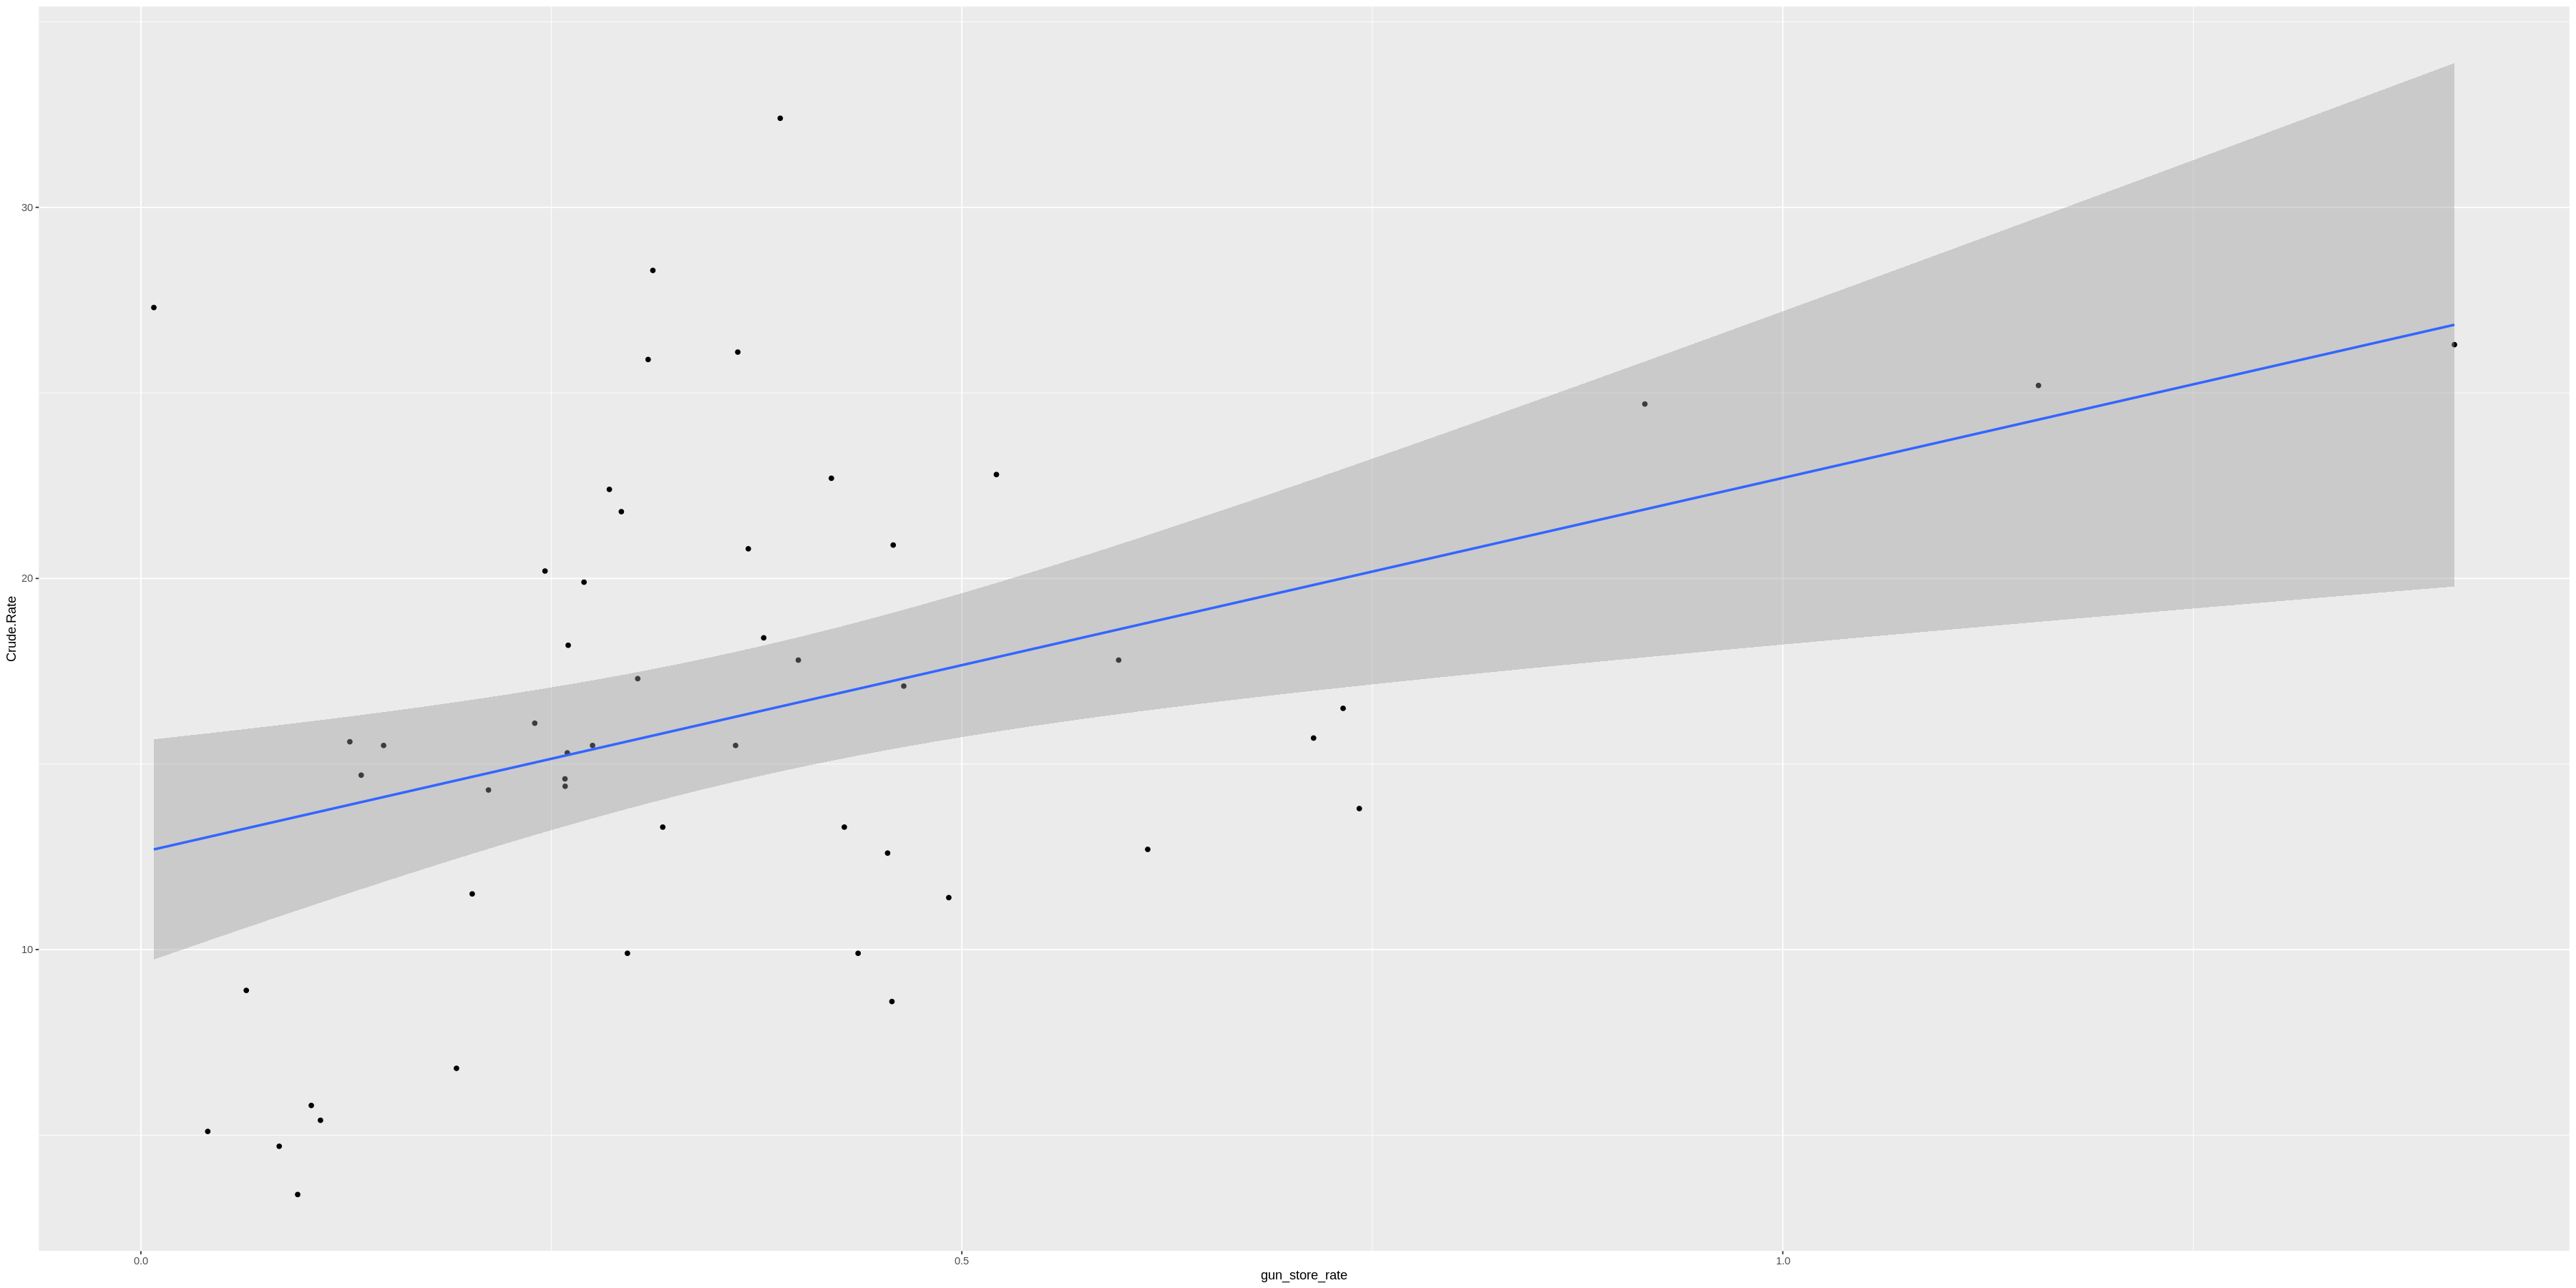

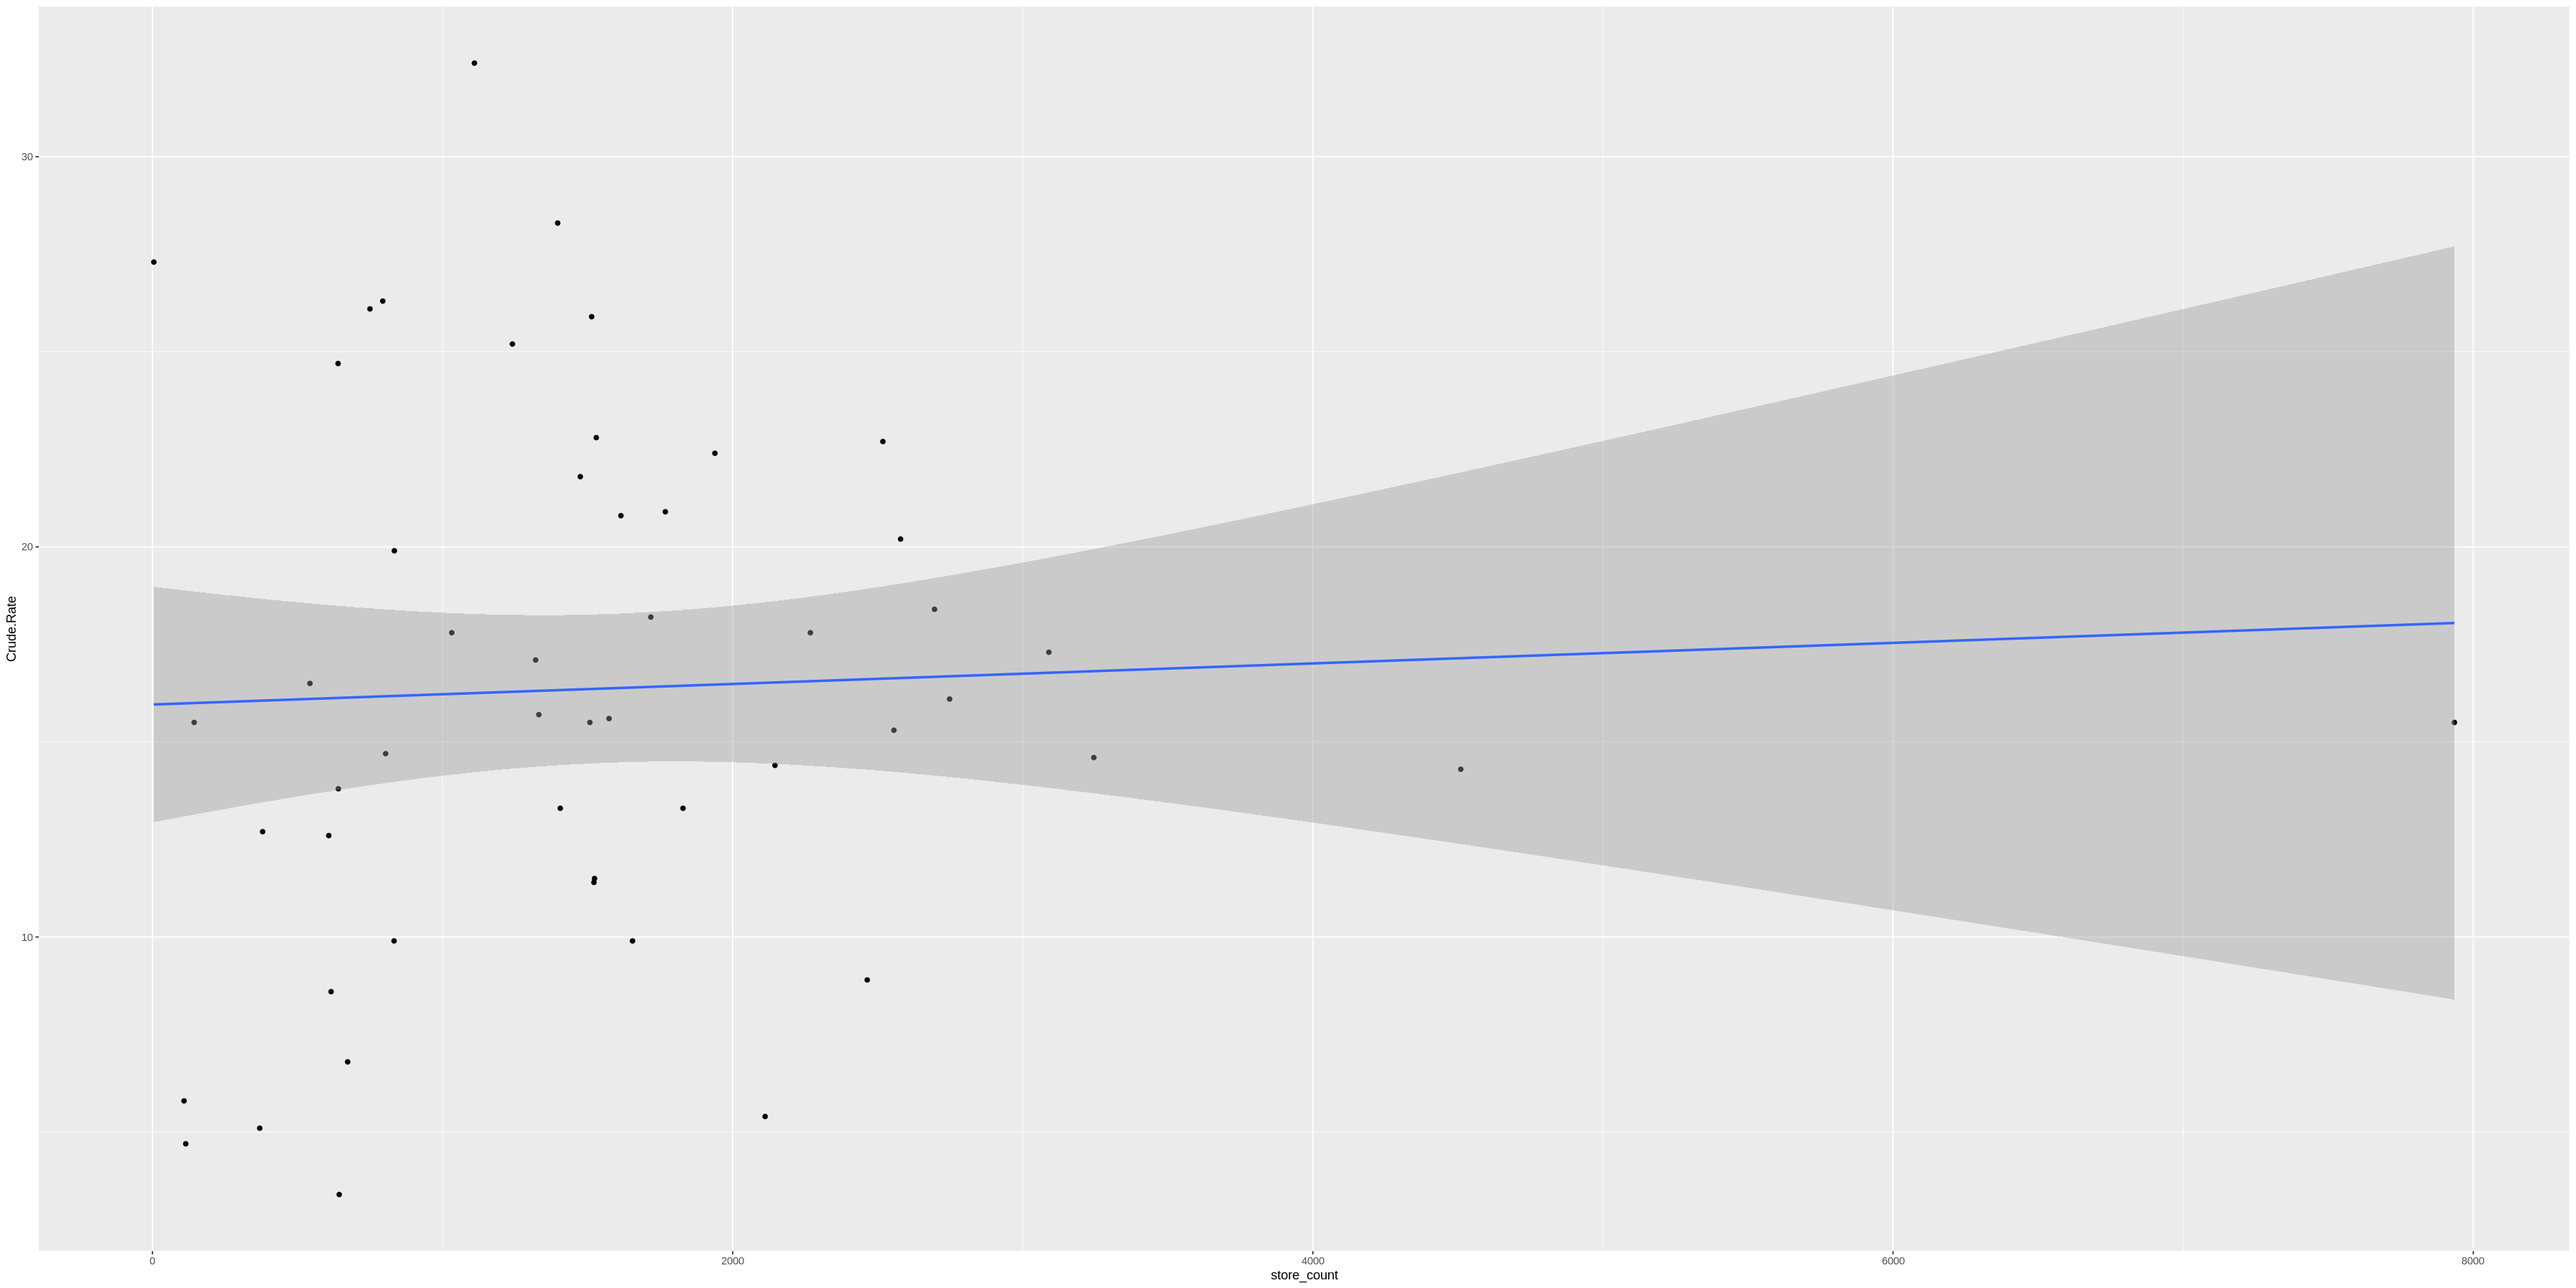

In [176]:
ggplot(big_table,aes(y = Crude.Rate,x = gun_store_rate))+geom_point()+geom_smooth(method="lm")
ggplot(big_table,aes(y = Crude.Rate,x = store_count))+geom_point()+geom_smooth(method="lm")

In [177]:
lm3 <- lm(victims_killed ~ event_type*gun_store_rate, data = big_table2)
lm4 <- lm(victims_killed ~ event_type*store_count, data = big_table2)

In [178]:
summary(lm3)


Call:
lm(formula = victims_killed ~ event_type * gun_store_rate, data = big_table2)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.218  -1.906  -0.897   1.181  67.013 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                          14.577      2.796   5.213
event_typemass_shooting                              10.422      4.778   2.181
event_typeofficer_involved_shooting                 -12.558      3.783  -3.320
event_typeschool_shooting                           -12.491      3.742  -3.338
gun_store_rate                                      -12.389      6.786  -1.826
event_typemass_shooting:gun_store_rate              -16.736     14.389  -1.163
event_typeofficer_involved_shooting:gun_store_rate   10.948      8.795   1.245
event_typeschool_shooting:gun_store_rate             10.393      8.711   1.193
                                                      Pr(>|t|)    
(Intercept)                 

In [179]:
summary(lm3)


Call:
lm(formula = victims_killed ~ event_type * gun_store_rate, data = big_table2)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.218  -1.906  -0.897   1.181  67.013 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                          14.577      2.796   5.213
event_typemass_shooting                              10.422      4.778   2.181
event_typeofficer_involved_shooting                 -12.558      3.783  -3.320
event_typeschool_shooting                           -12.491      3.742  -3.338
gun_store_rate                                      -12.389      6.786  -1.826
event_typemass_shooting:gun_store_rate              -16.736     14.389  -1.163
event_typeofficer_involved_shooting:gun_store_rate   10.948      8.795   1.245
event_typeschool_shooting:gun_store_rate             10.393      8.711   1.193
                                                      Pr(>|t|)    
(Intercept)                 

In [180]:
summary(lm4)


Call:
lm(formula = victims_killed ~ event_type * store_count, data = big_table2)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.963  -2.541  -0.327   1.411  37.665 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                     -1.9207995  1.5999143  -1.201
event_typemass_shooting                          1.8234588  2.3819981   0.766
event_typeofficer_involved_shooting             -0.4012981  2.3064617  -0.174
event_typeschool_shooting                       -0.3040468  2.2272186  -0.137
store_count                                      0.0069981  0.0007361   9.507
event_typemass_shooting:store_count              0.0021061  0.0010629   1.982
event_typeofficer_involved_shooting:store_count -0.0048638  0.0010546  -4.612
event_typeschool_shooting:store_count           -0.0048865  0.0010358  -4.718
                                                            Pr(>|t|)    
(Intercept)                       

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


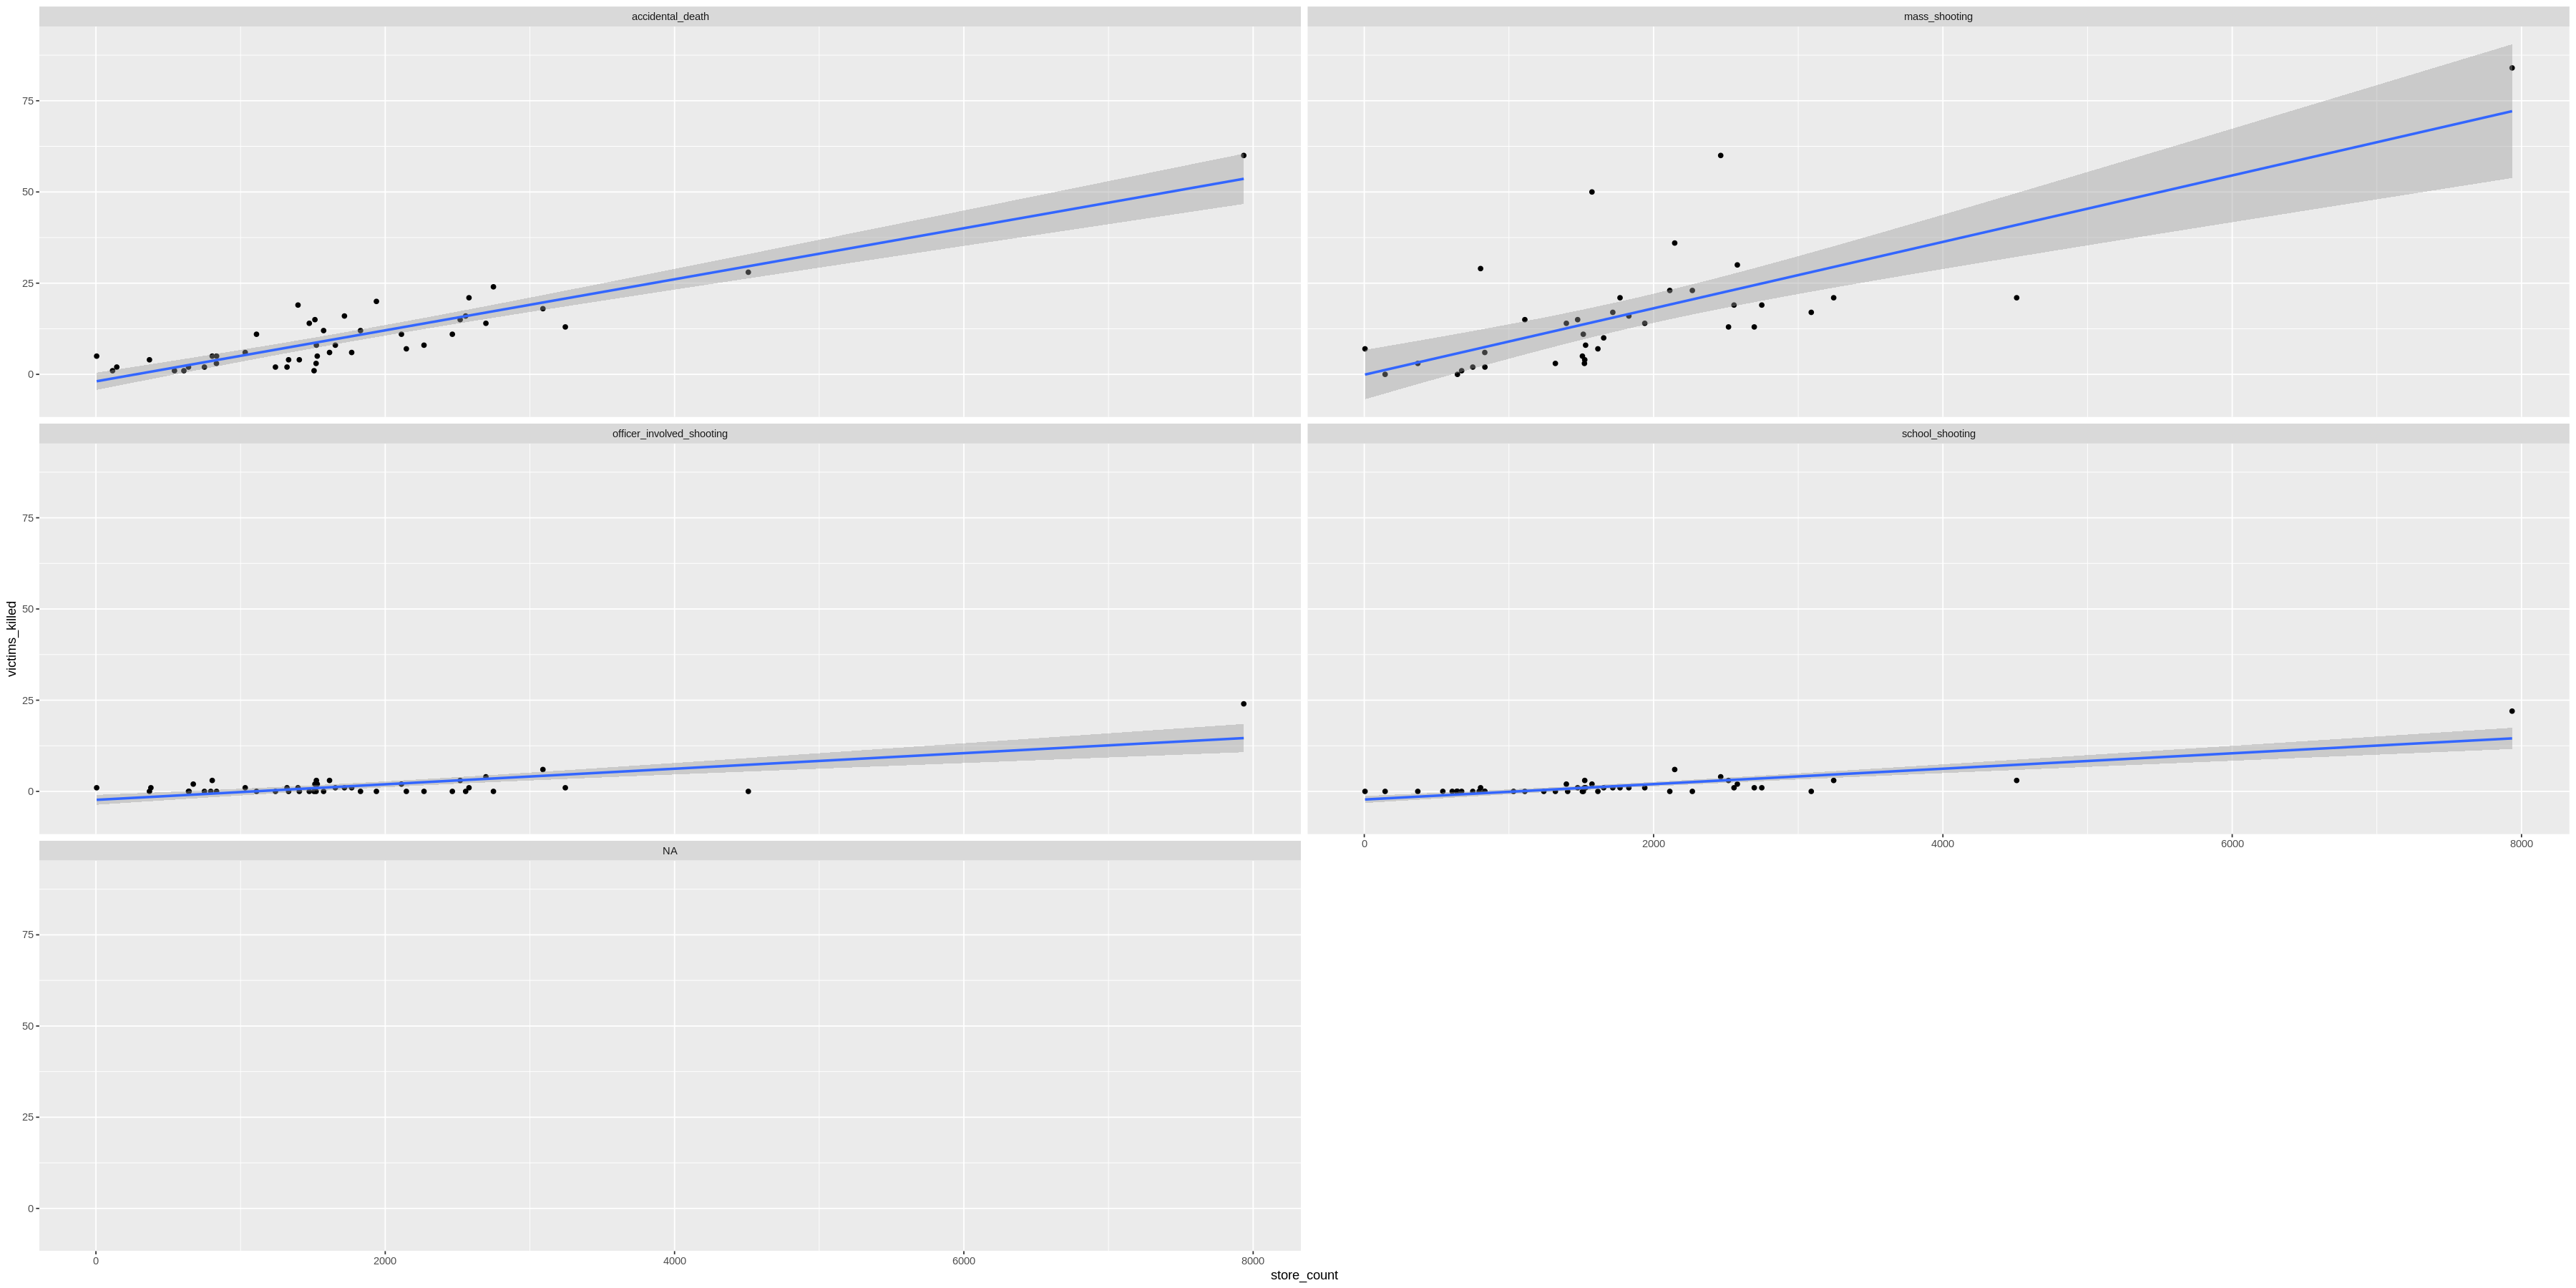

In [181]:
ggplot(big_table2,aes(y = victims_killed, x = store_count))+
  geom_point()+
  geom_smooth(method="lm") +
  facet_wrap( ~ event_type, ncol = 2)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


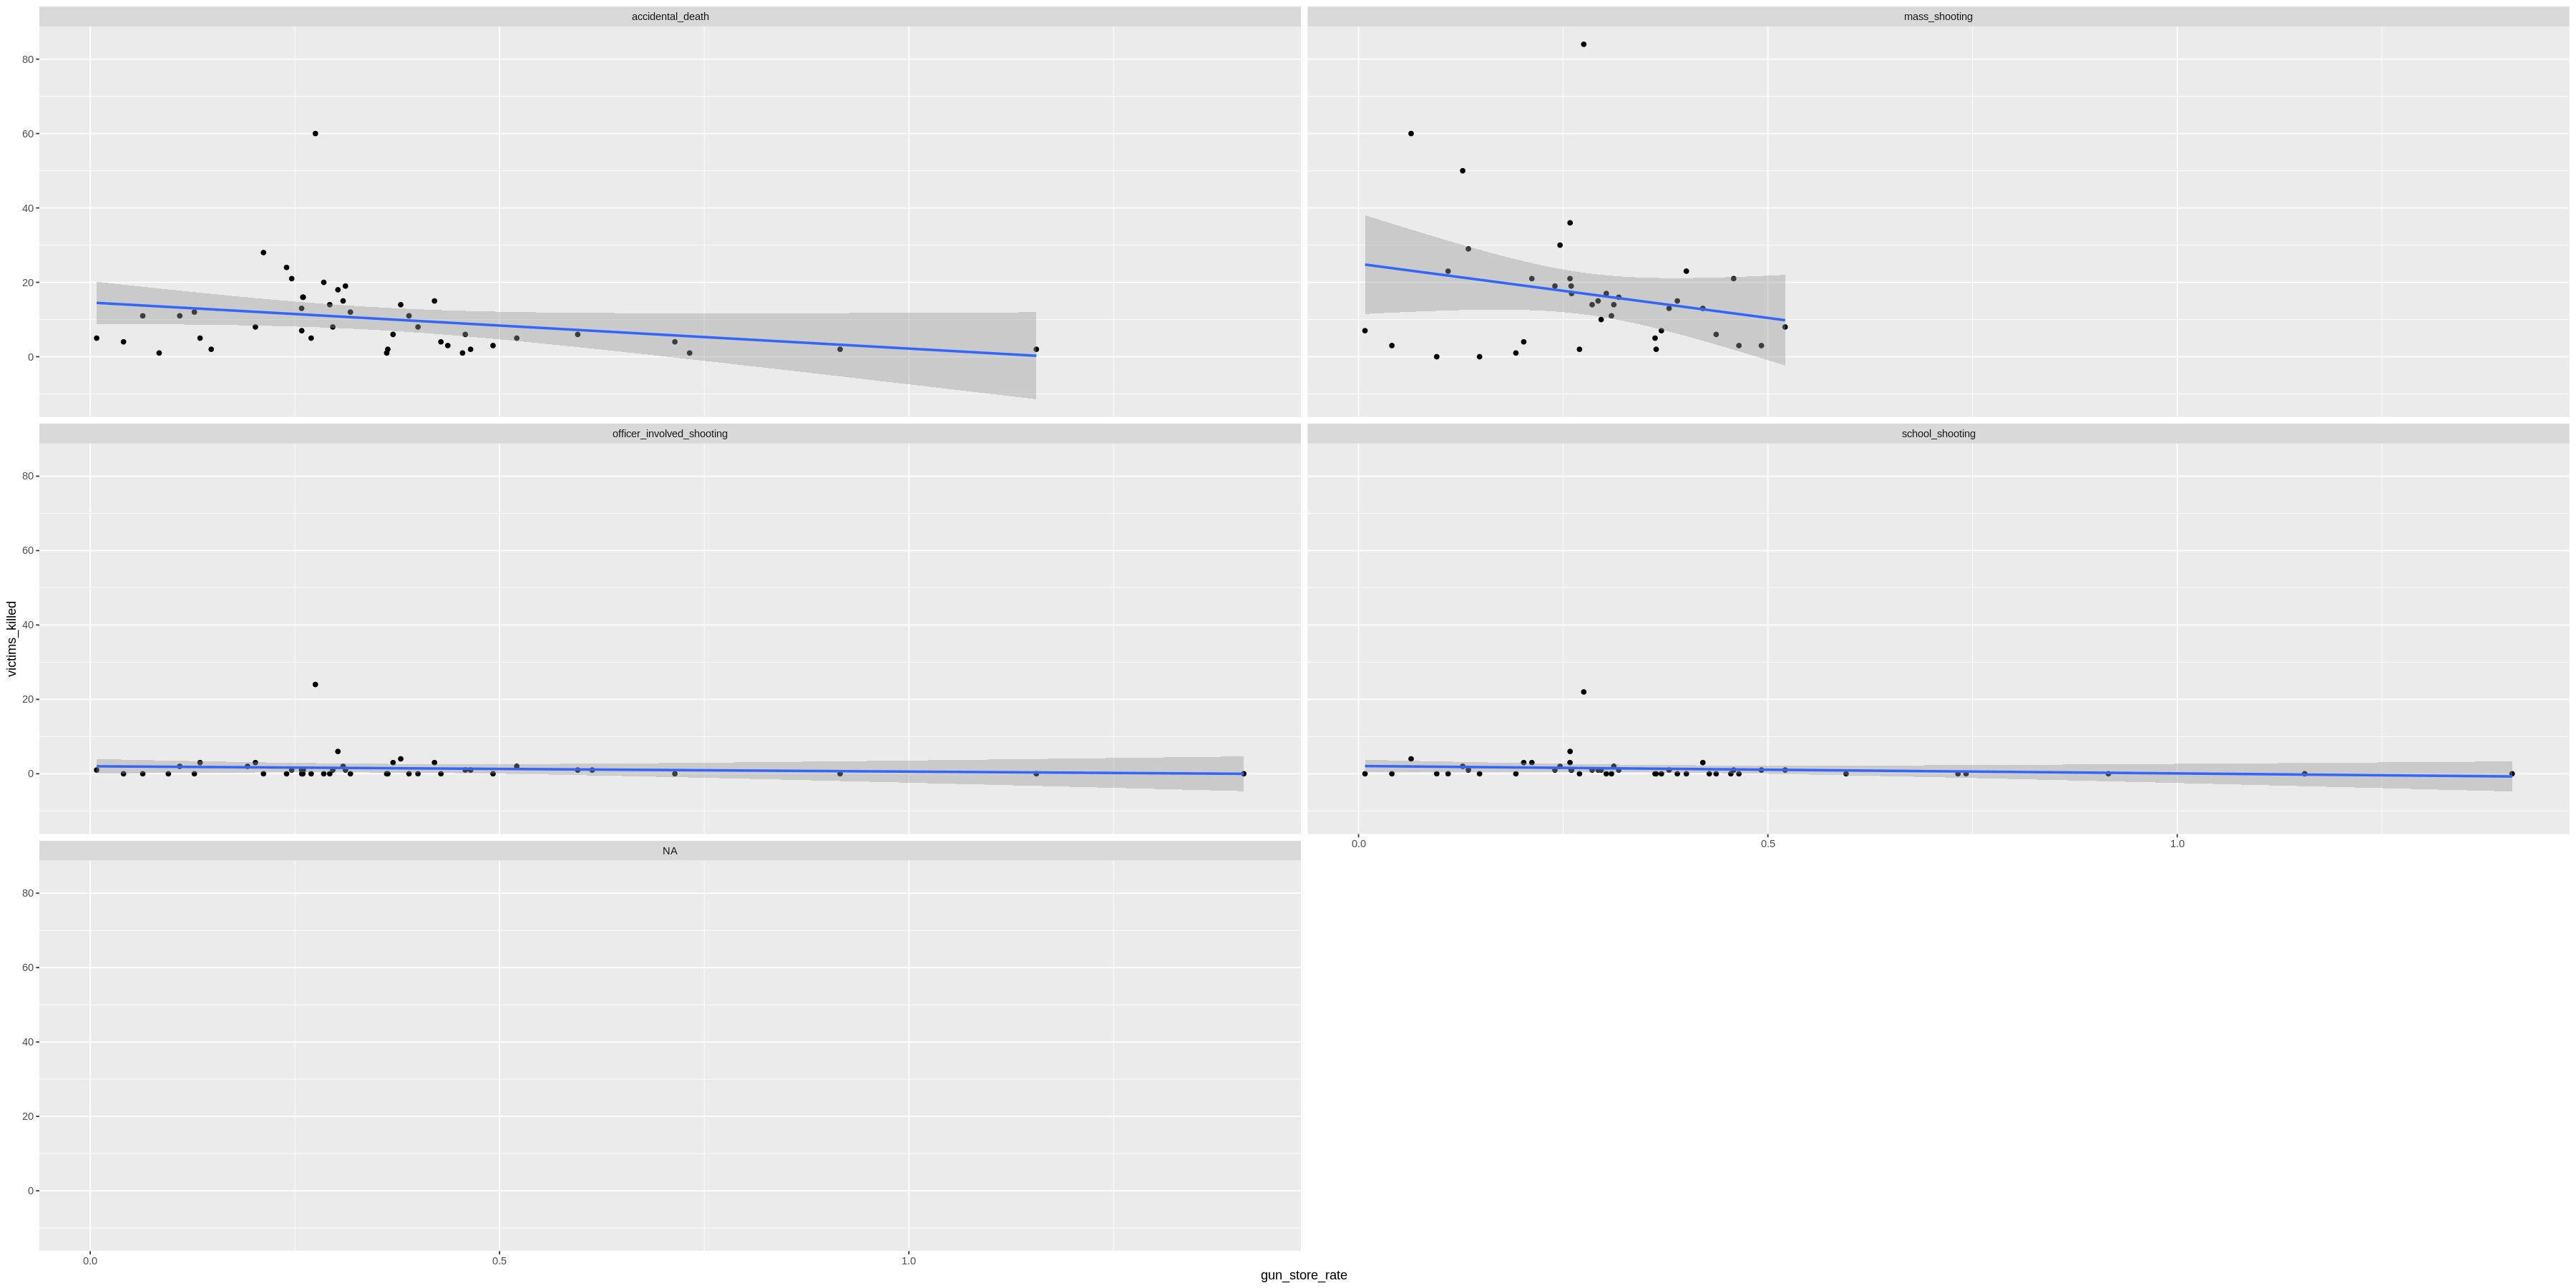

In [182]:
ggplot(big_table2,aes(y = victims_killed, x = gun_store_rate))+
  geom_point()+
  geom_smooth(method="lm") +
  facet_wrap( ~ event_type, ncol = 2)

In [184]:
lm5 <- lm(Crude.Rate ~ size_rate, data = big_table)
summary(lm5)


Call:
lm(formula = Crude.Rate ~ size_rate, data = big_table)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3381  -4.8952   0.0764   4.4224  14.8191 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 19.46020    1.52683  12.745 <0.0000000000000002 ***
size_rate   -0.07943    0.03185  -2.494              0.0161 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.387 on 49 degrees of freedom
Multiple R-squared:  0.1126,	Adjusted R-squared:  0.0945 
F-statistic: 6.218 on 1 and 49 DF,  p-value: 0.01607


`geom_smooth()` using formula = 'y ~ x'


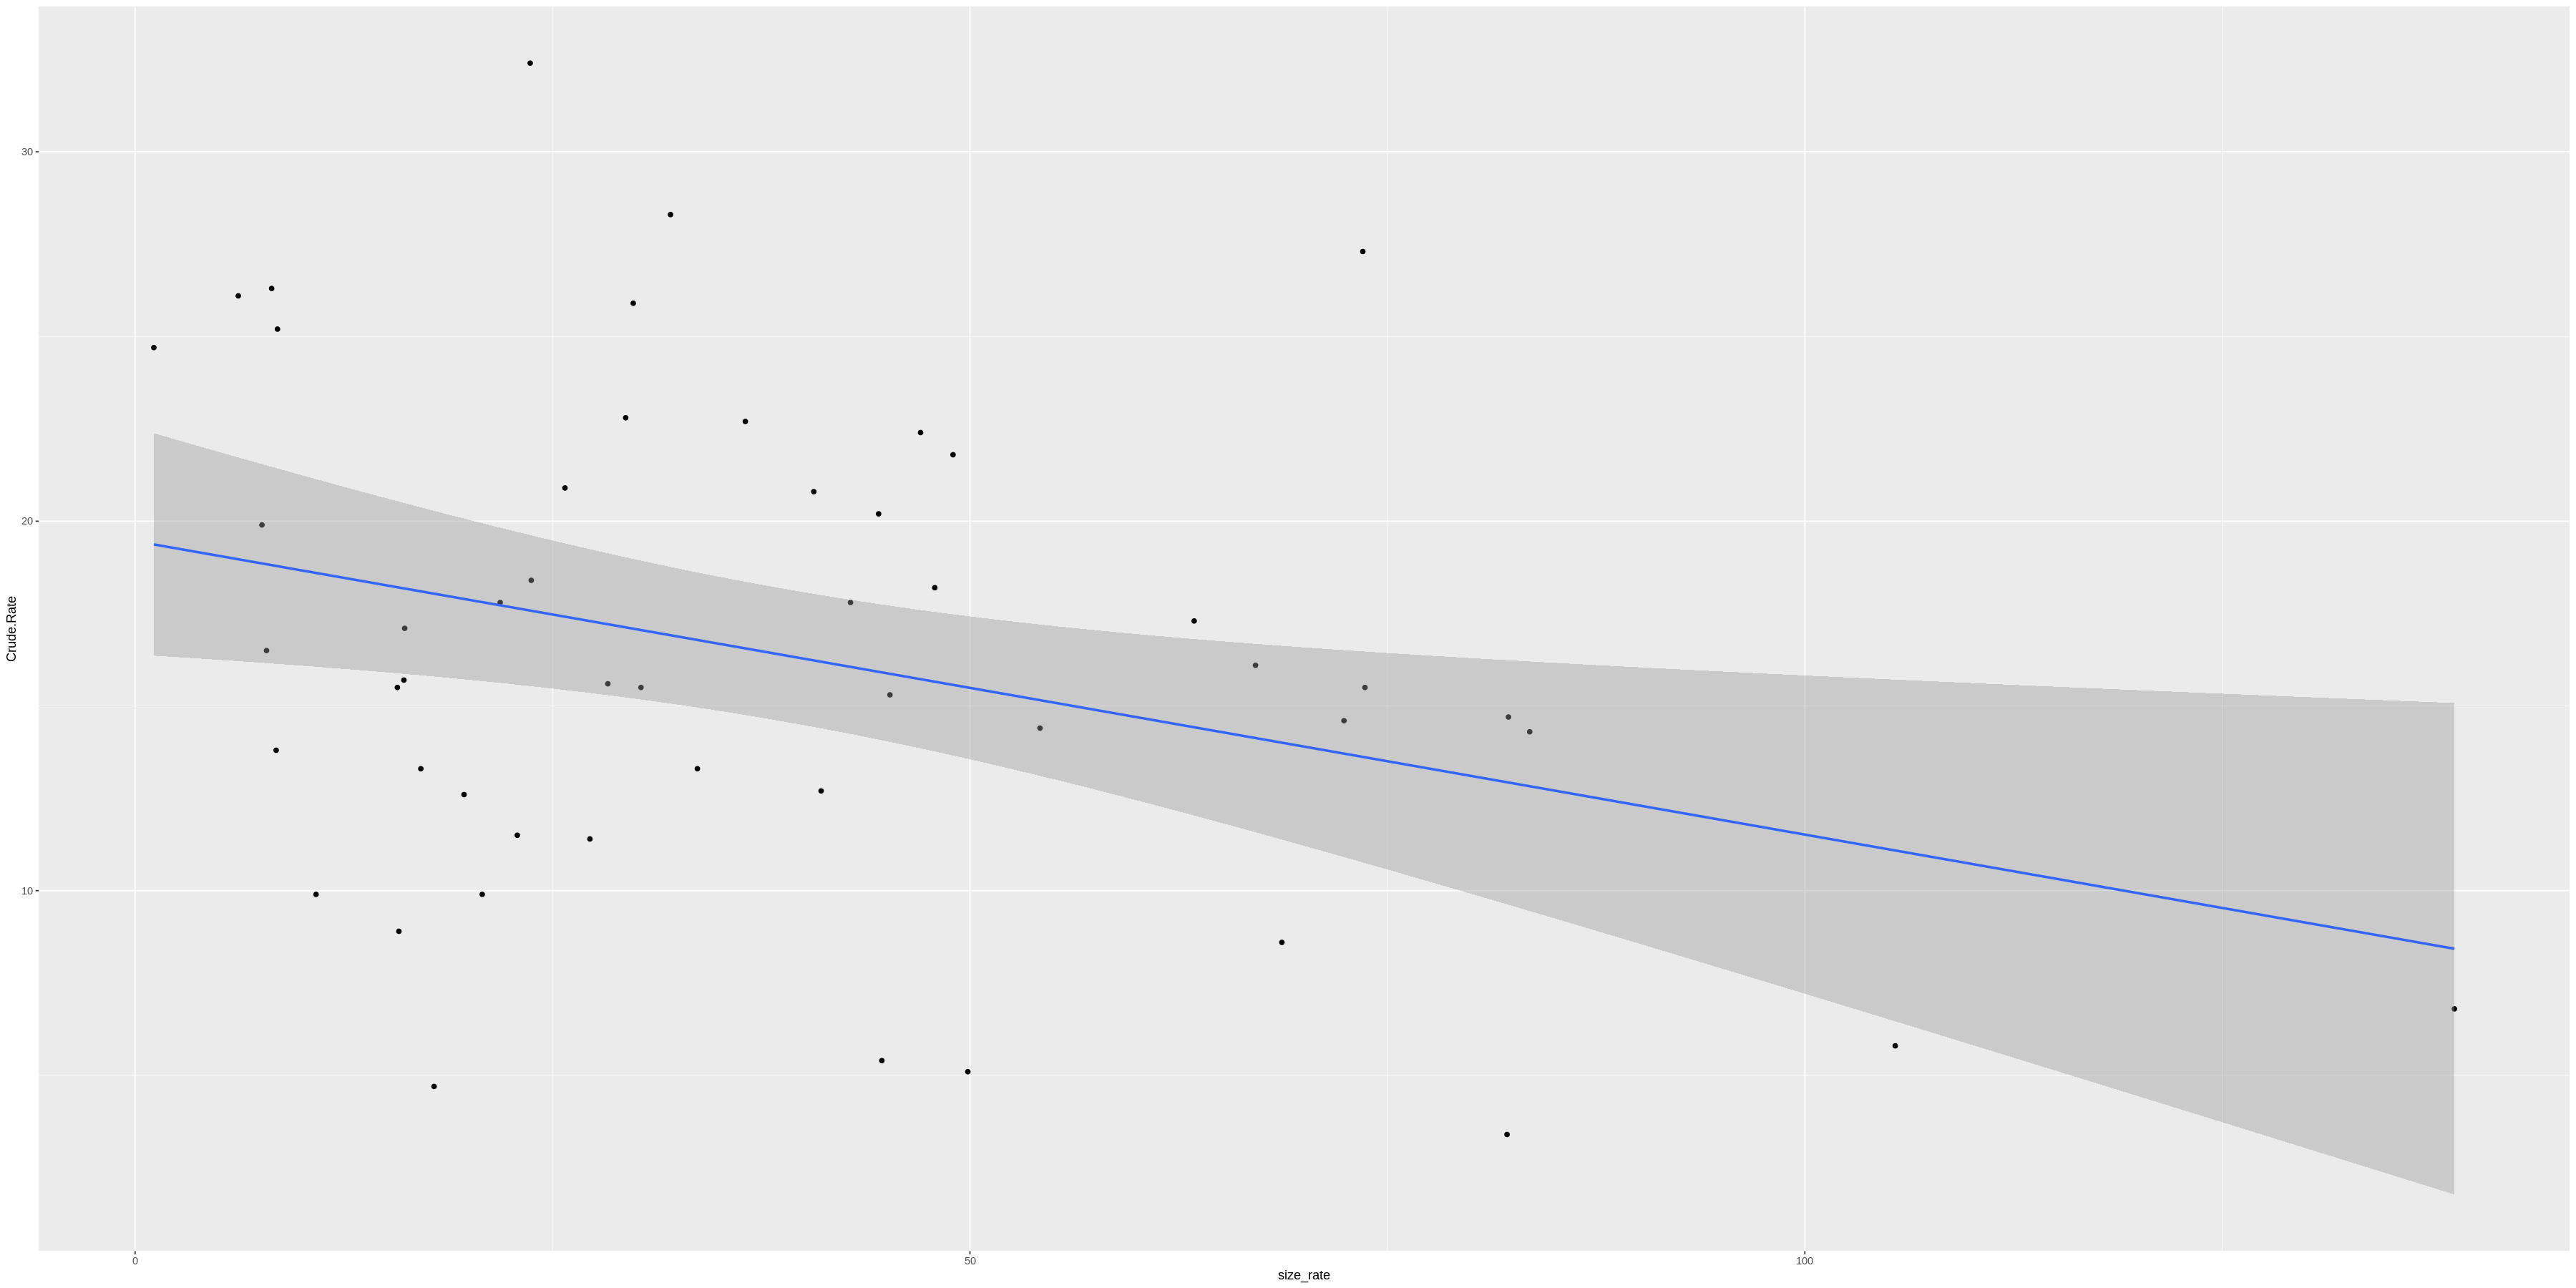

In [185]:
ggplot(big_table,aes(y = Crude.Rate,x = size_rate))+geom_point()+geom_smooth(method="lm")

In [186]:
lm6 <- lm(victims_killed ~ event_type*size_rate, data = big_table2)
summary(lm6)


Call:
lm(formula = victims_killed ~ event_type * size_rate, data = big_table2)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.045  -2.185  -1.282   1.419  66.379 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                    4.99723    2.84252   1.758
event_typemass_shooting                       14.41254    4.14868   3.474
event_typeofficer_involved_shooting           -3.72532    3.91064  -0.953
event_typeschool_shooting                     -3.73301    3.78878  -0.985
size_rate                                      0.15121    0.06956   2.174
event_typemass_shooting:size_rate             -0.21027    0.09188  -2.289
event_typeofficer_involved_shooting:size_rate -0.14564    0.09002  -1.618
event_typeschool_shooting:size_rate           -0.14899    0.08804  -1.692
                                              Pr(>|t|)    
(Intercept)                                   0.080620 .  
event_typemass_shooting    

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


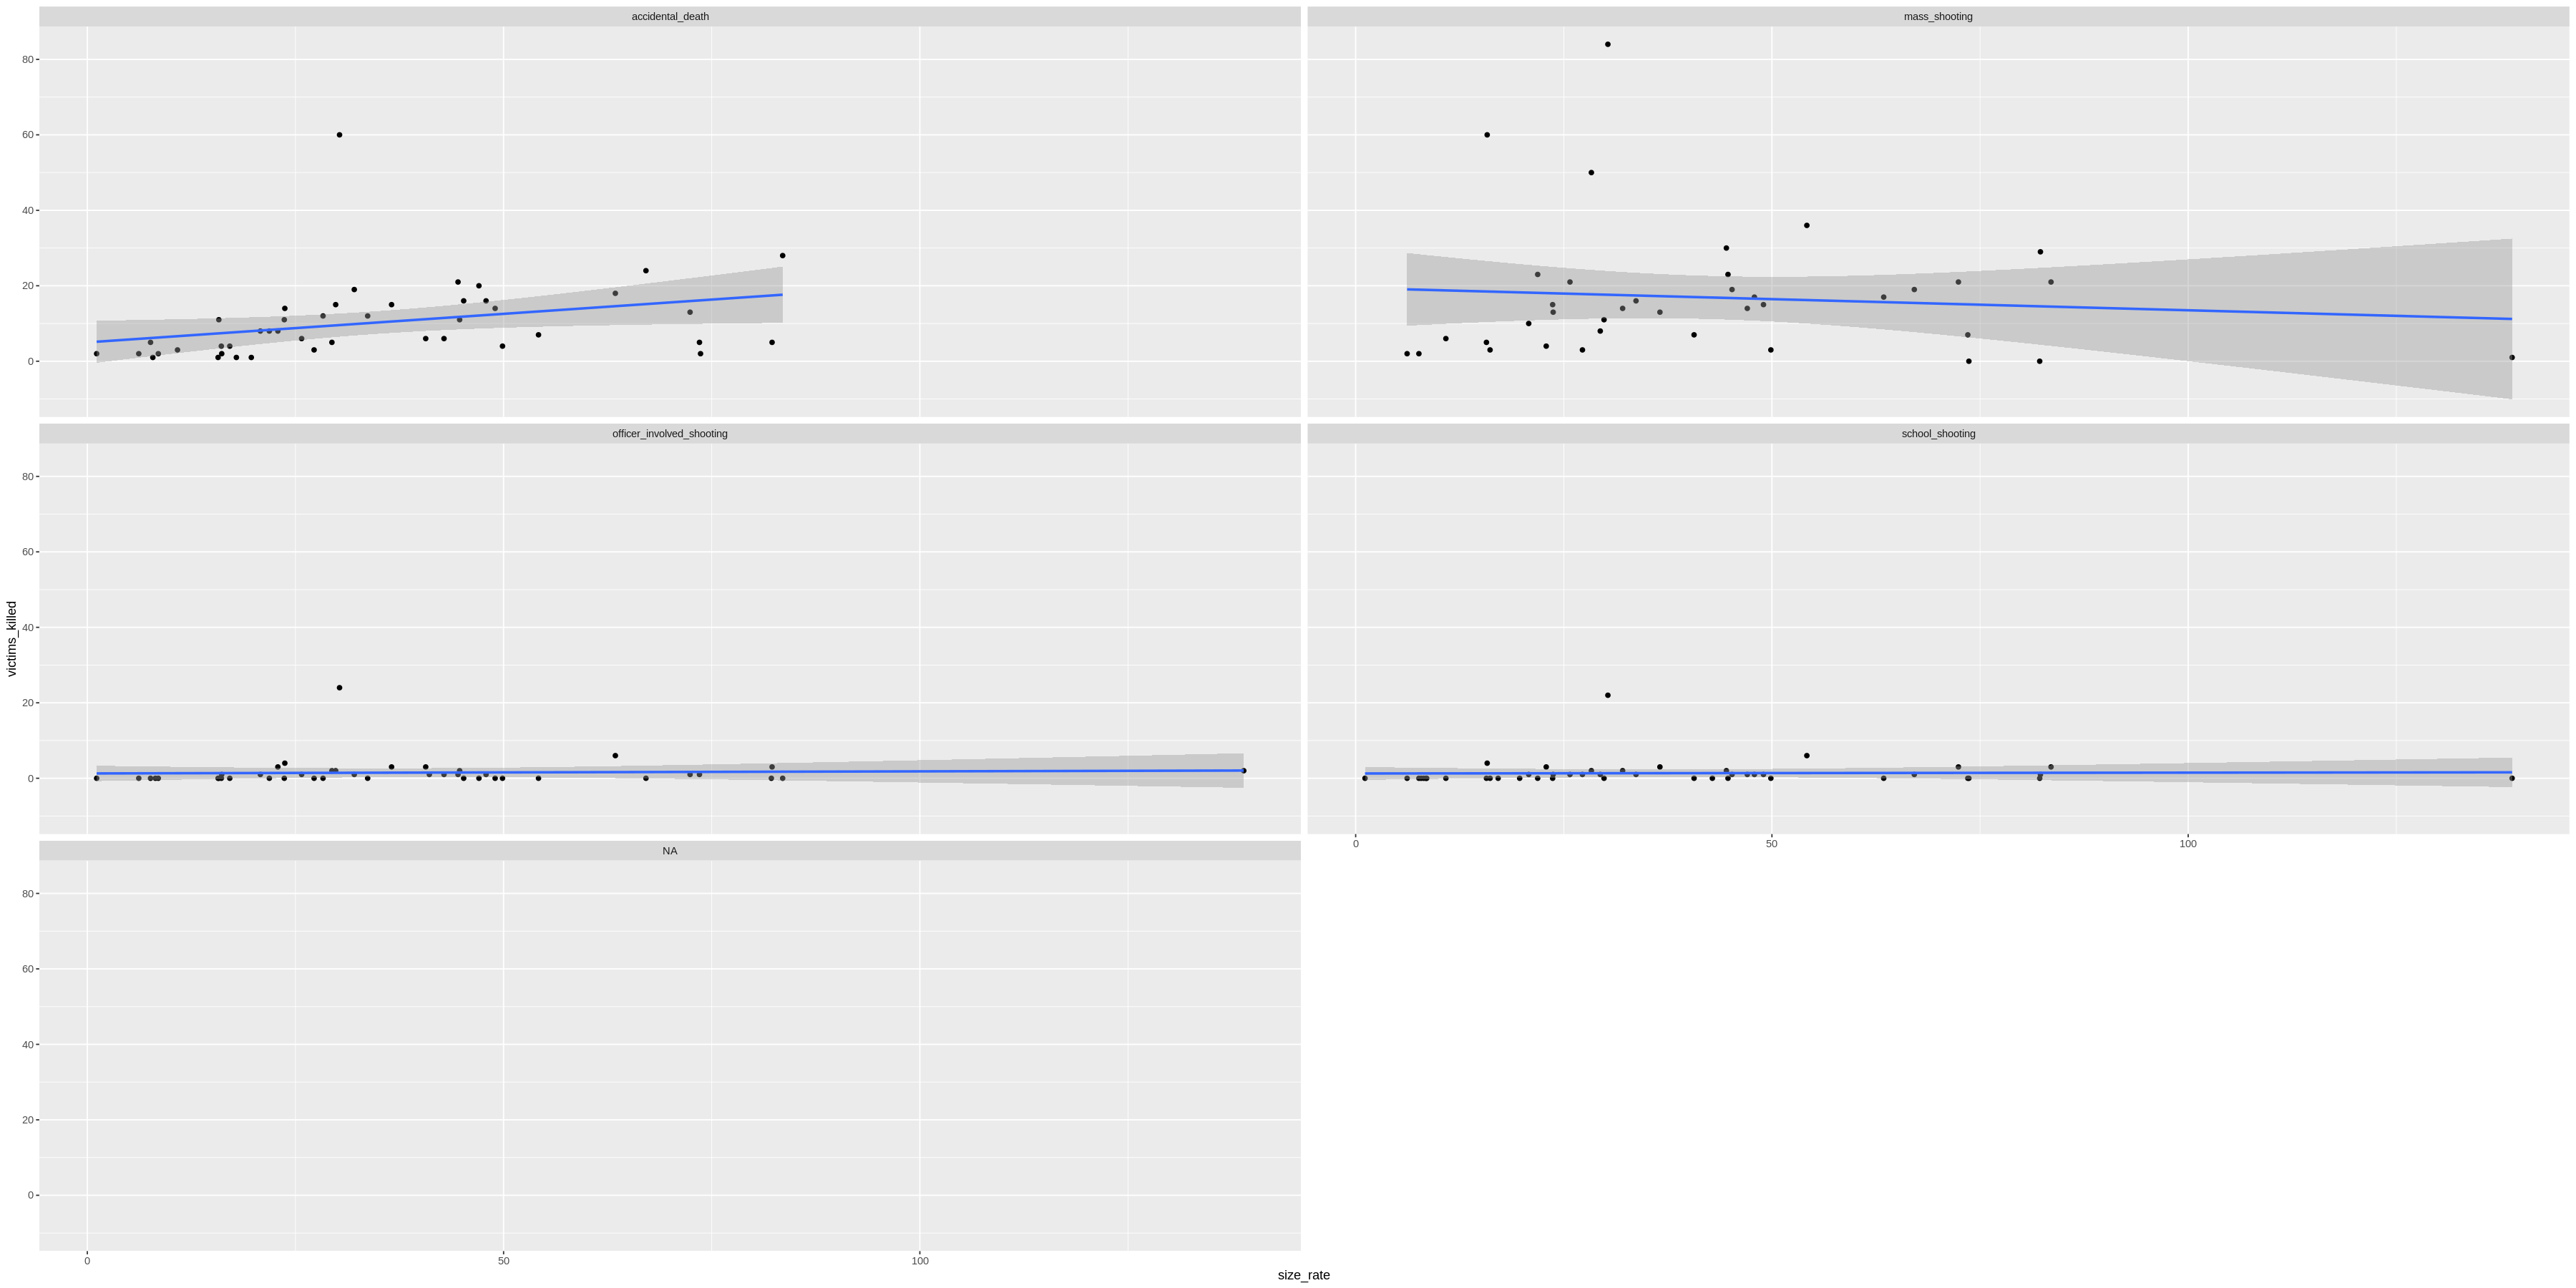

In [187]:
ggplot(big_table2,aes(y = victims_killed, x = size_rate))+
  geom_point()+
  geom_smooth(method="lm") +
  facet_wrap( ~ event_type, ncol = 2)

## Demographics EDA

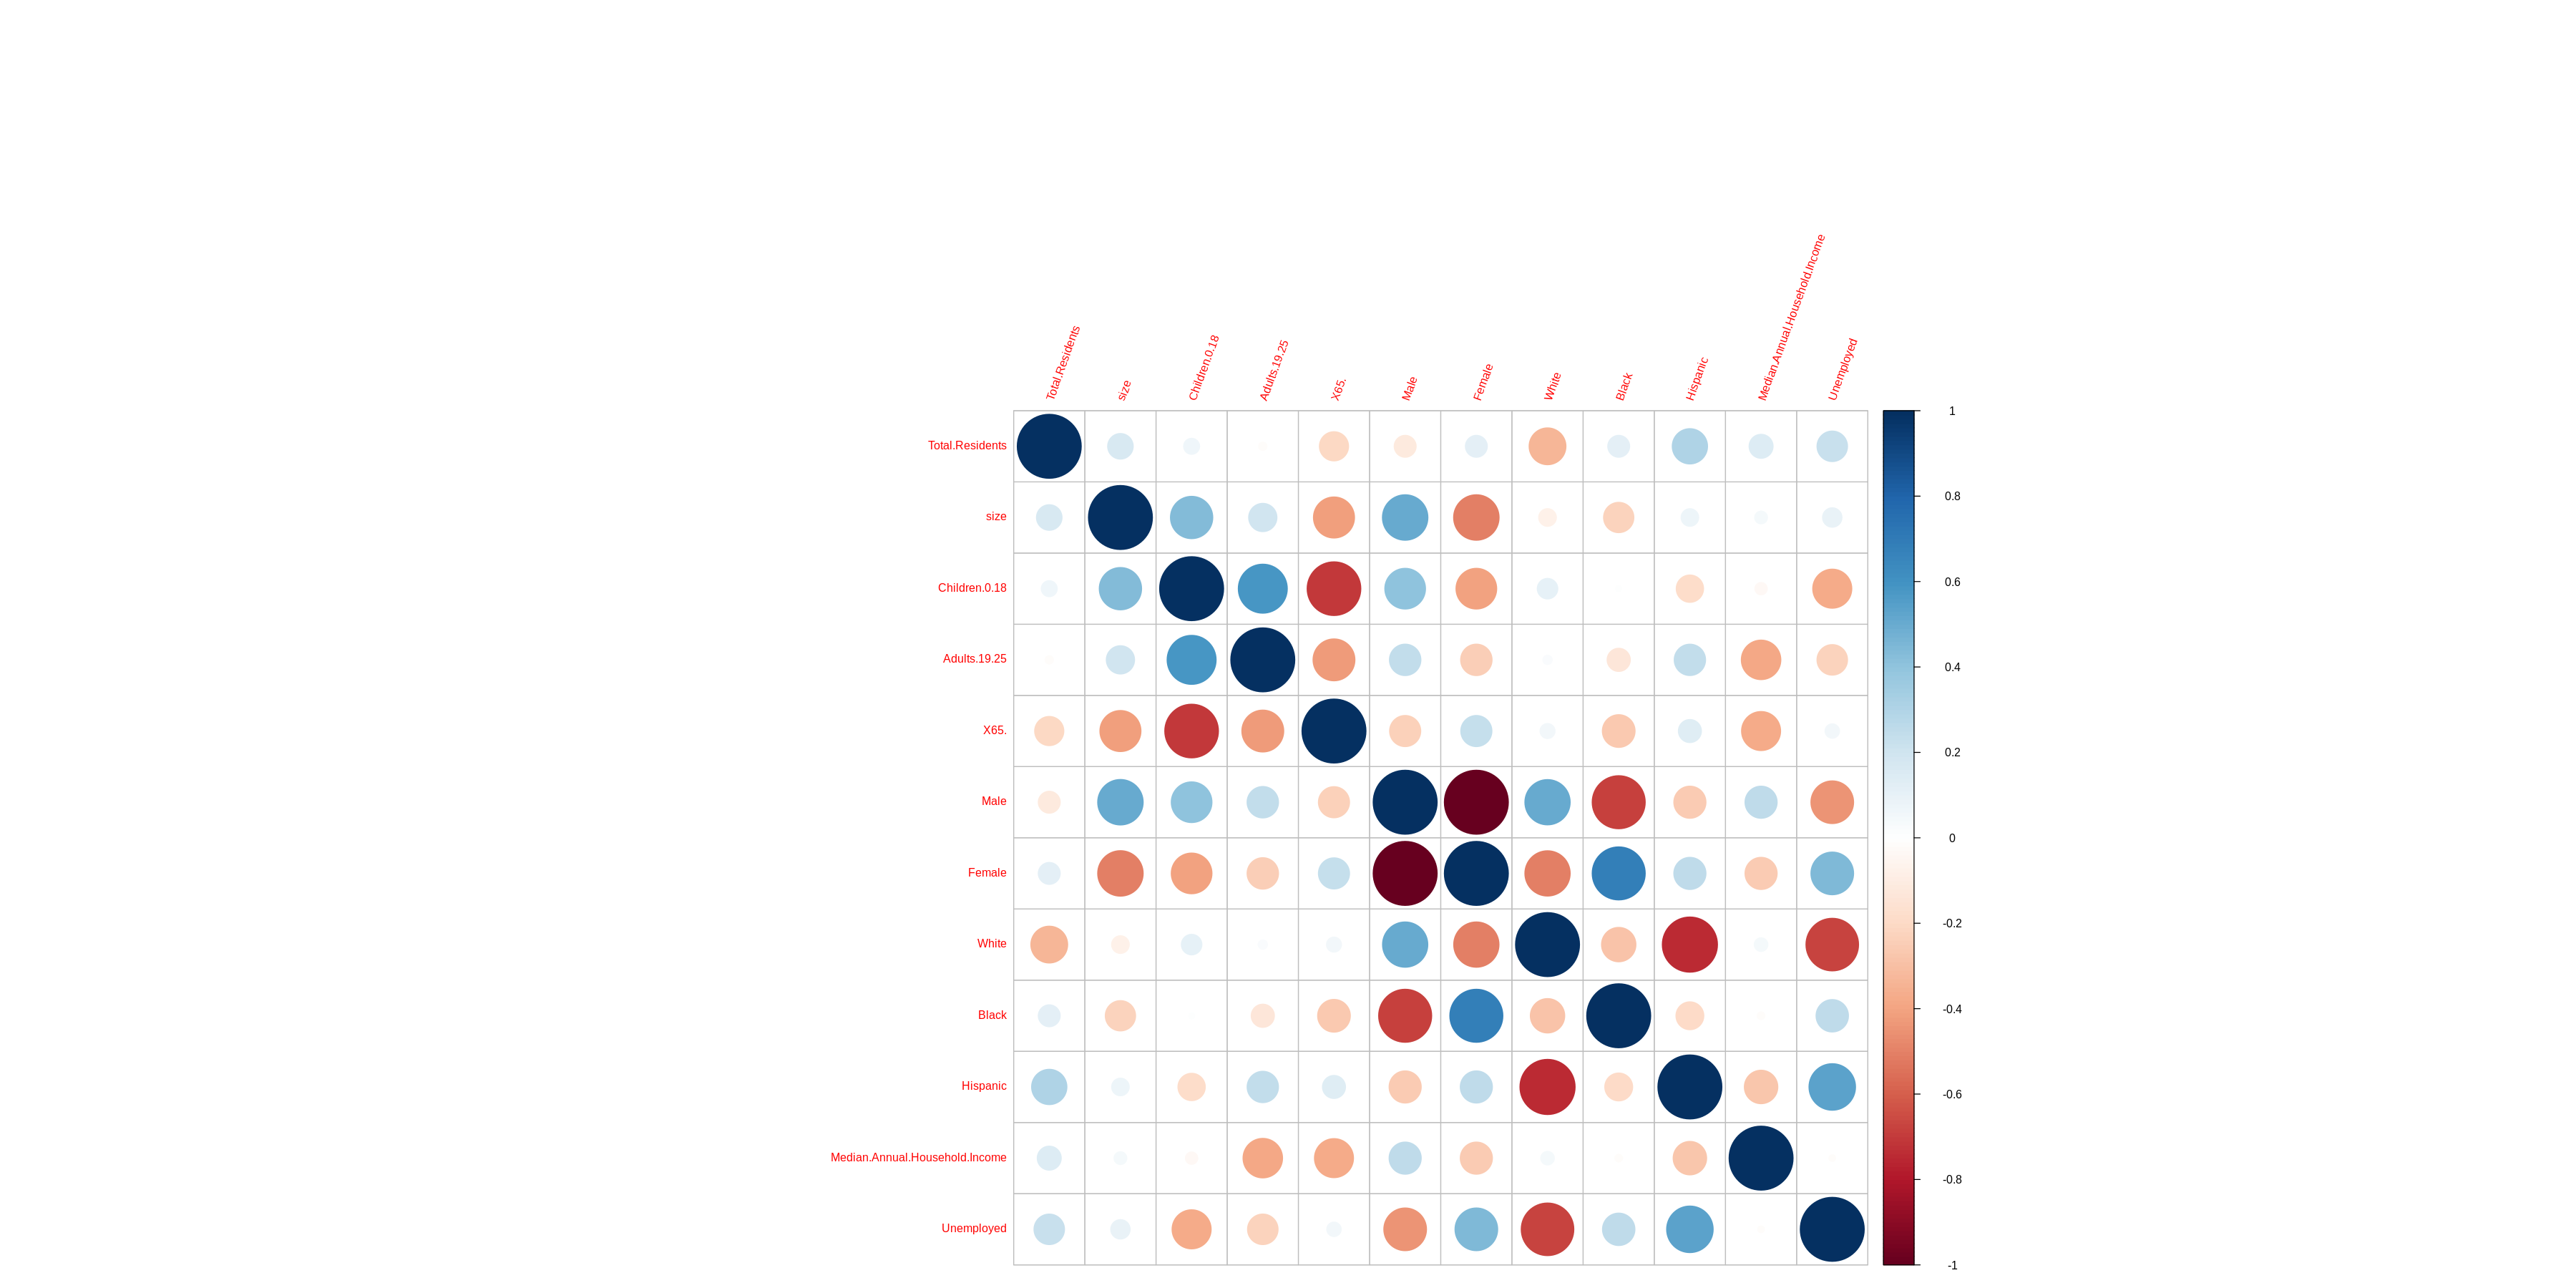

In [188]:
state_corr <- state_demo_no_us %>%
  select(Total.Residents, size, Children.0.18, Adults.19.25, X65., Male, Female, White, Black, Hispanic, Median.Annual.Household.Income, Unemployed)

corrplot(cor(state_corr), tl.cex=0.8, tl.srt=70)

In [189]:
head(state_corr)

Total.Residents size   Children.0.18 Adults.19.25 X65.  Male  Female White
1  4900800         50750 0.236         0.087        0.177 0.481 0.519  0.644
2   698700        570641 0.264         0.085        0.137 0.512 0.488  0.579
3  7107300        113642 0.236         0.088        0.186 0.495 0.505  0.521
4  2936400         52075 0.246         0.087        0.174 0.490 0.510  0.683
5 38379200        155973 0.236         0.087        0.153 0.497 0.503  0.342
6  5664200        103730 0.227         0.086        0.153 0.502 0.498  0.653
  Black Hispanic Median.Annual.Household.Income Unemployed
1 0.255 0.047    53913                          0.029     
2 0.026 0.067    77845                          0.050     
3 0.041 0.324    69056                          0.033     
4 0.144 0.083    52528                          0.031     
5 0.051 0.403    84907                          0.049     
6 0.036 0.222    82254                          0.037

Total.Residents size   Children.0.18 Adults.19.25 X65.  Male  Female White
1  4900800         50750 0.236         0.087        0.177 0.481 0.519  0.644
2   698700        570641 0.264         0.085        0.137 0.512 0.488  0.579
3  7107300        113642 0.236         0.088        0.186 0.495 0.505  0.521
4  2936400         52075 0.246         0.087        0.174 0.490 0.510  0.683
5 38379200        155973 0.236         0.087        0.153 0.497 0.503  0.342
6  5664200        103730 0.227         0.086        0.153 0.502 0.498  0.653
  Black Hispanic Median.Annual.Household.Income Unemployed Crude.Rate
1 0.255 0.047    53913                          0.029      25.9      
2 0.026 0.067    77845                          0.050      24.7      
3 0.041 0.324    69056                          0.033      18.4      
4 0.144 0.083    52528                          0.031      22.8      
5 0.051 0.403    84907                          0.049       8.9      
6 0.036 0.222    82254                          0.037      17.8

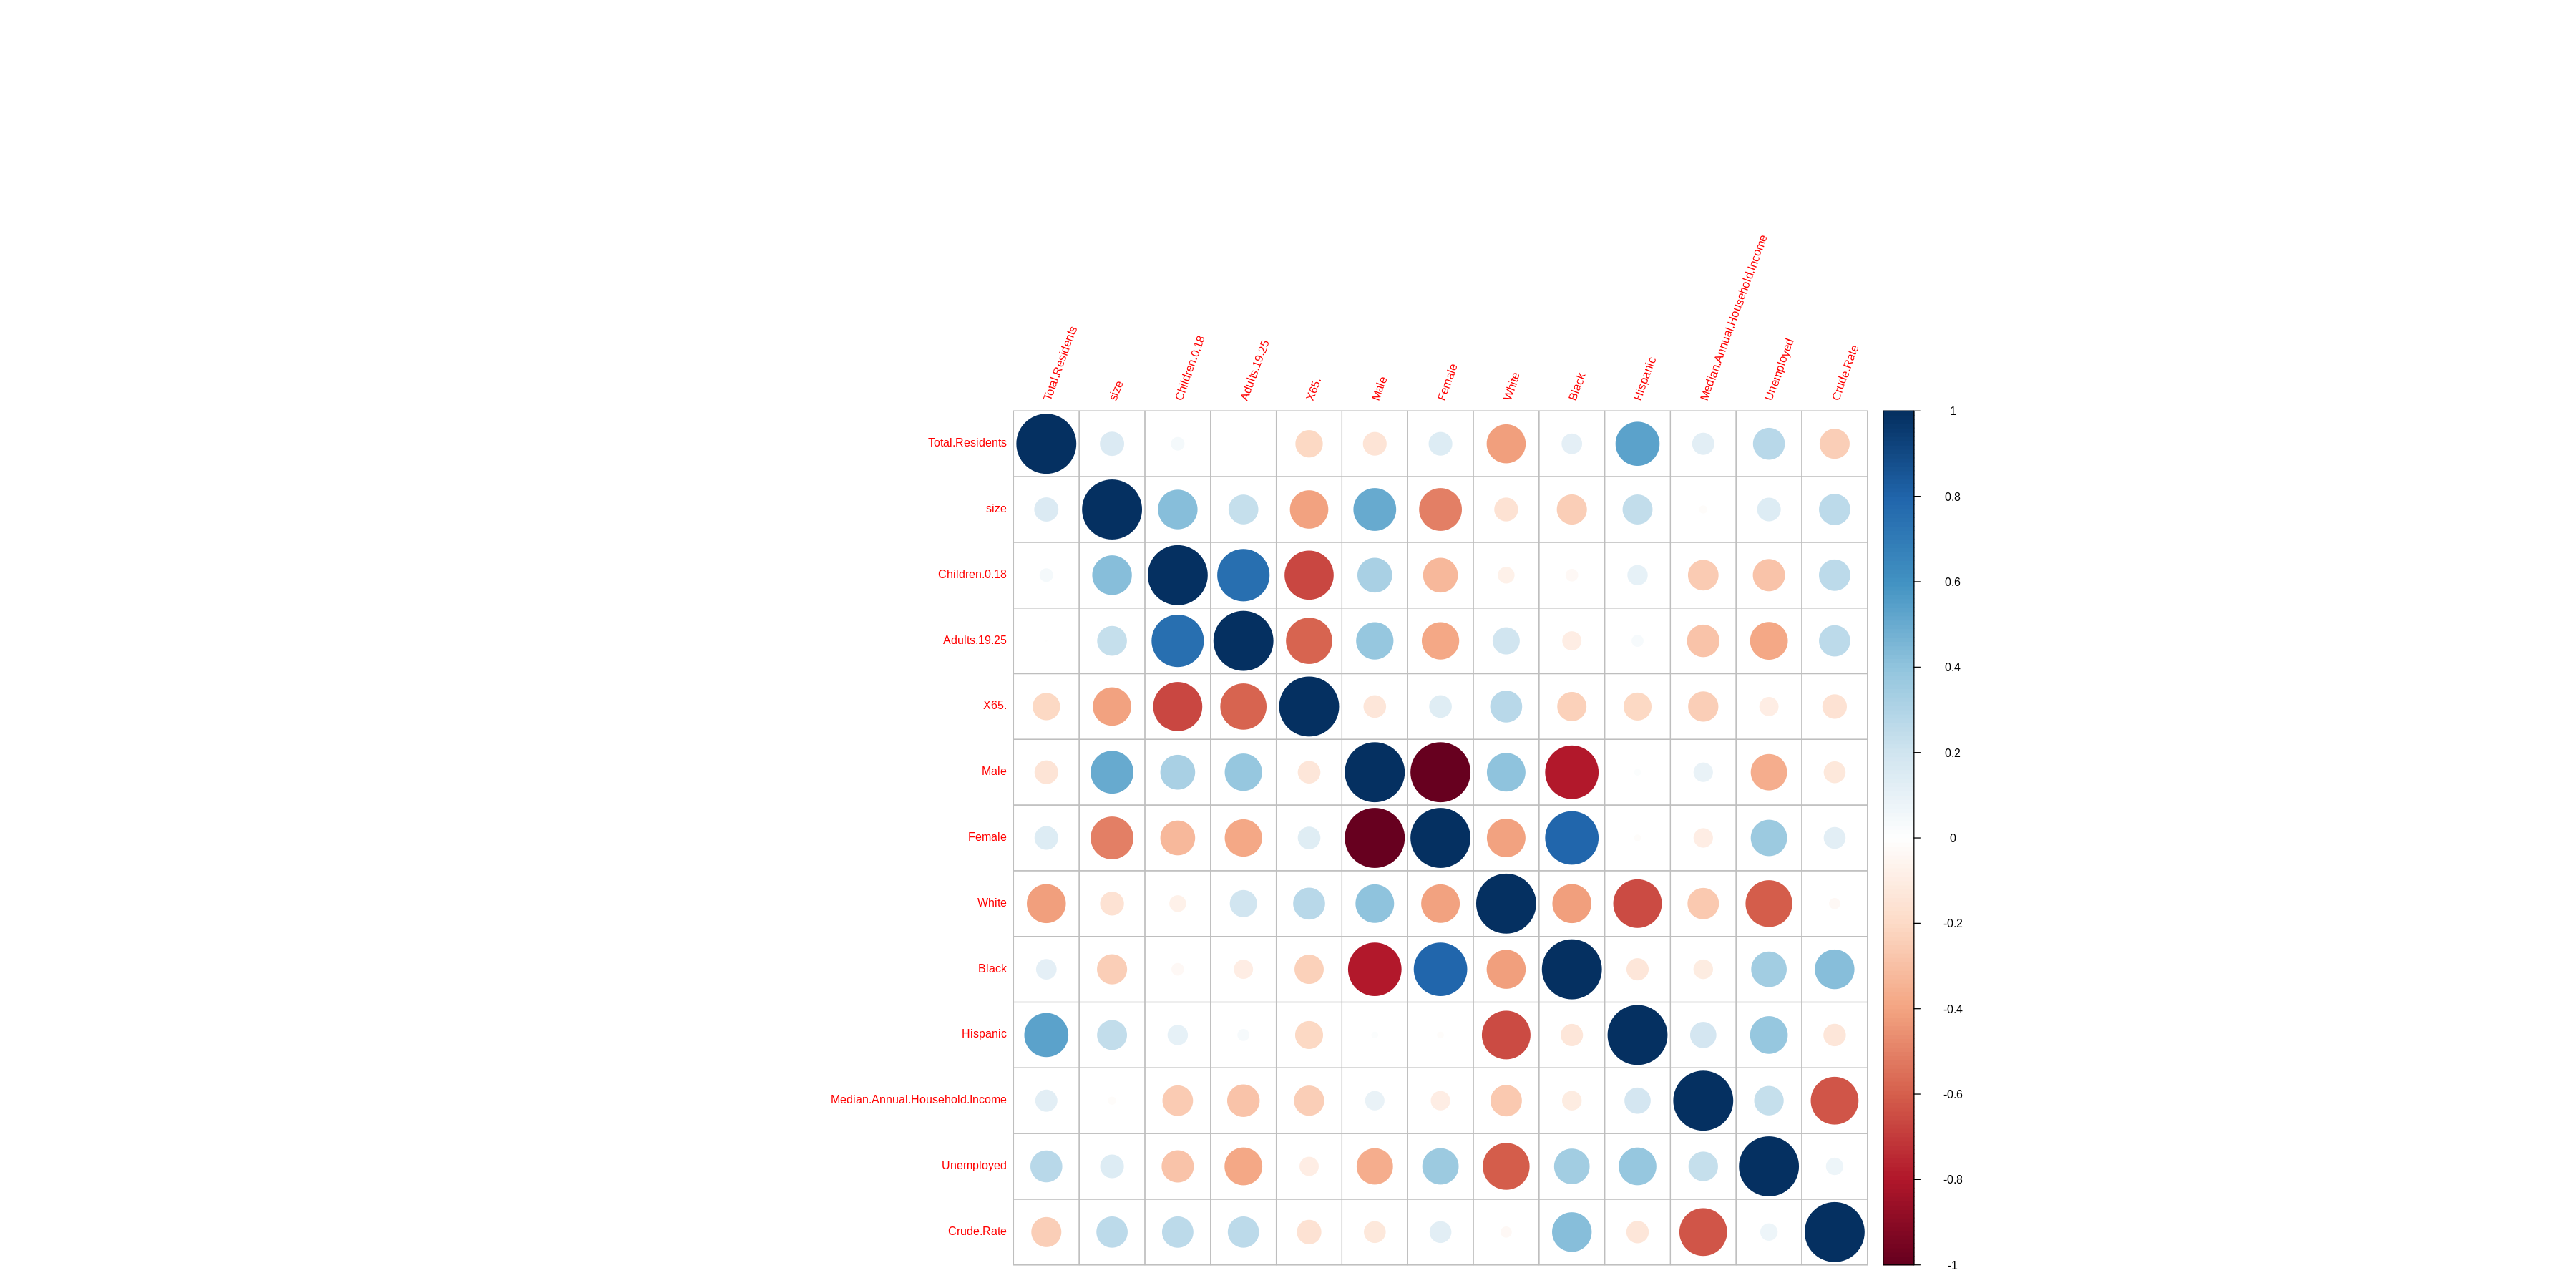

In [190]:
state_corr_with_deaths <- state_demo_no_us %>%
  left_join(cdc_state_new, by = join_by(Location == State)) %>%
  select(Total.Residents, size, Children.0.18, Adults.19.25, X65., Male, Female, White, Black, Hispanic, Median.Annual.Household.Income, Unemployed, Crude.Rate) %>%
  drop_na()

head(state_corr_with_deaths)

corrplot(cor(state_corr_with_deaths), tl.cex=0.8, tl.srt=70)

`geom_smooth()` using formula = 'y ~ x'


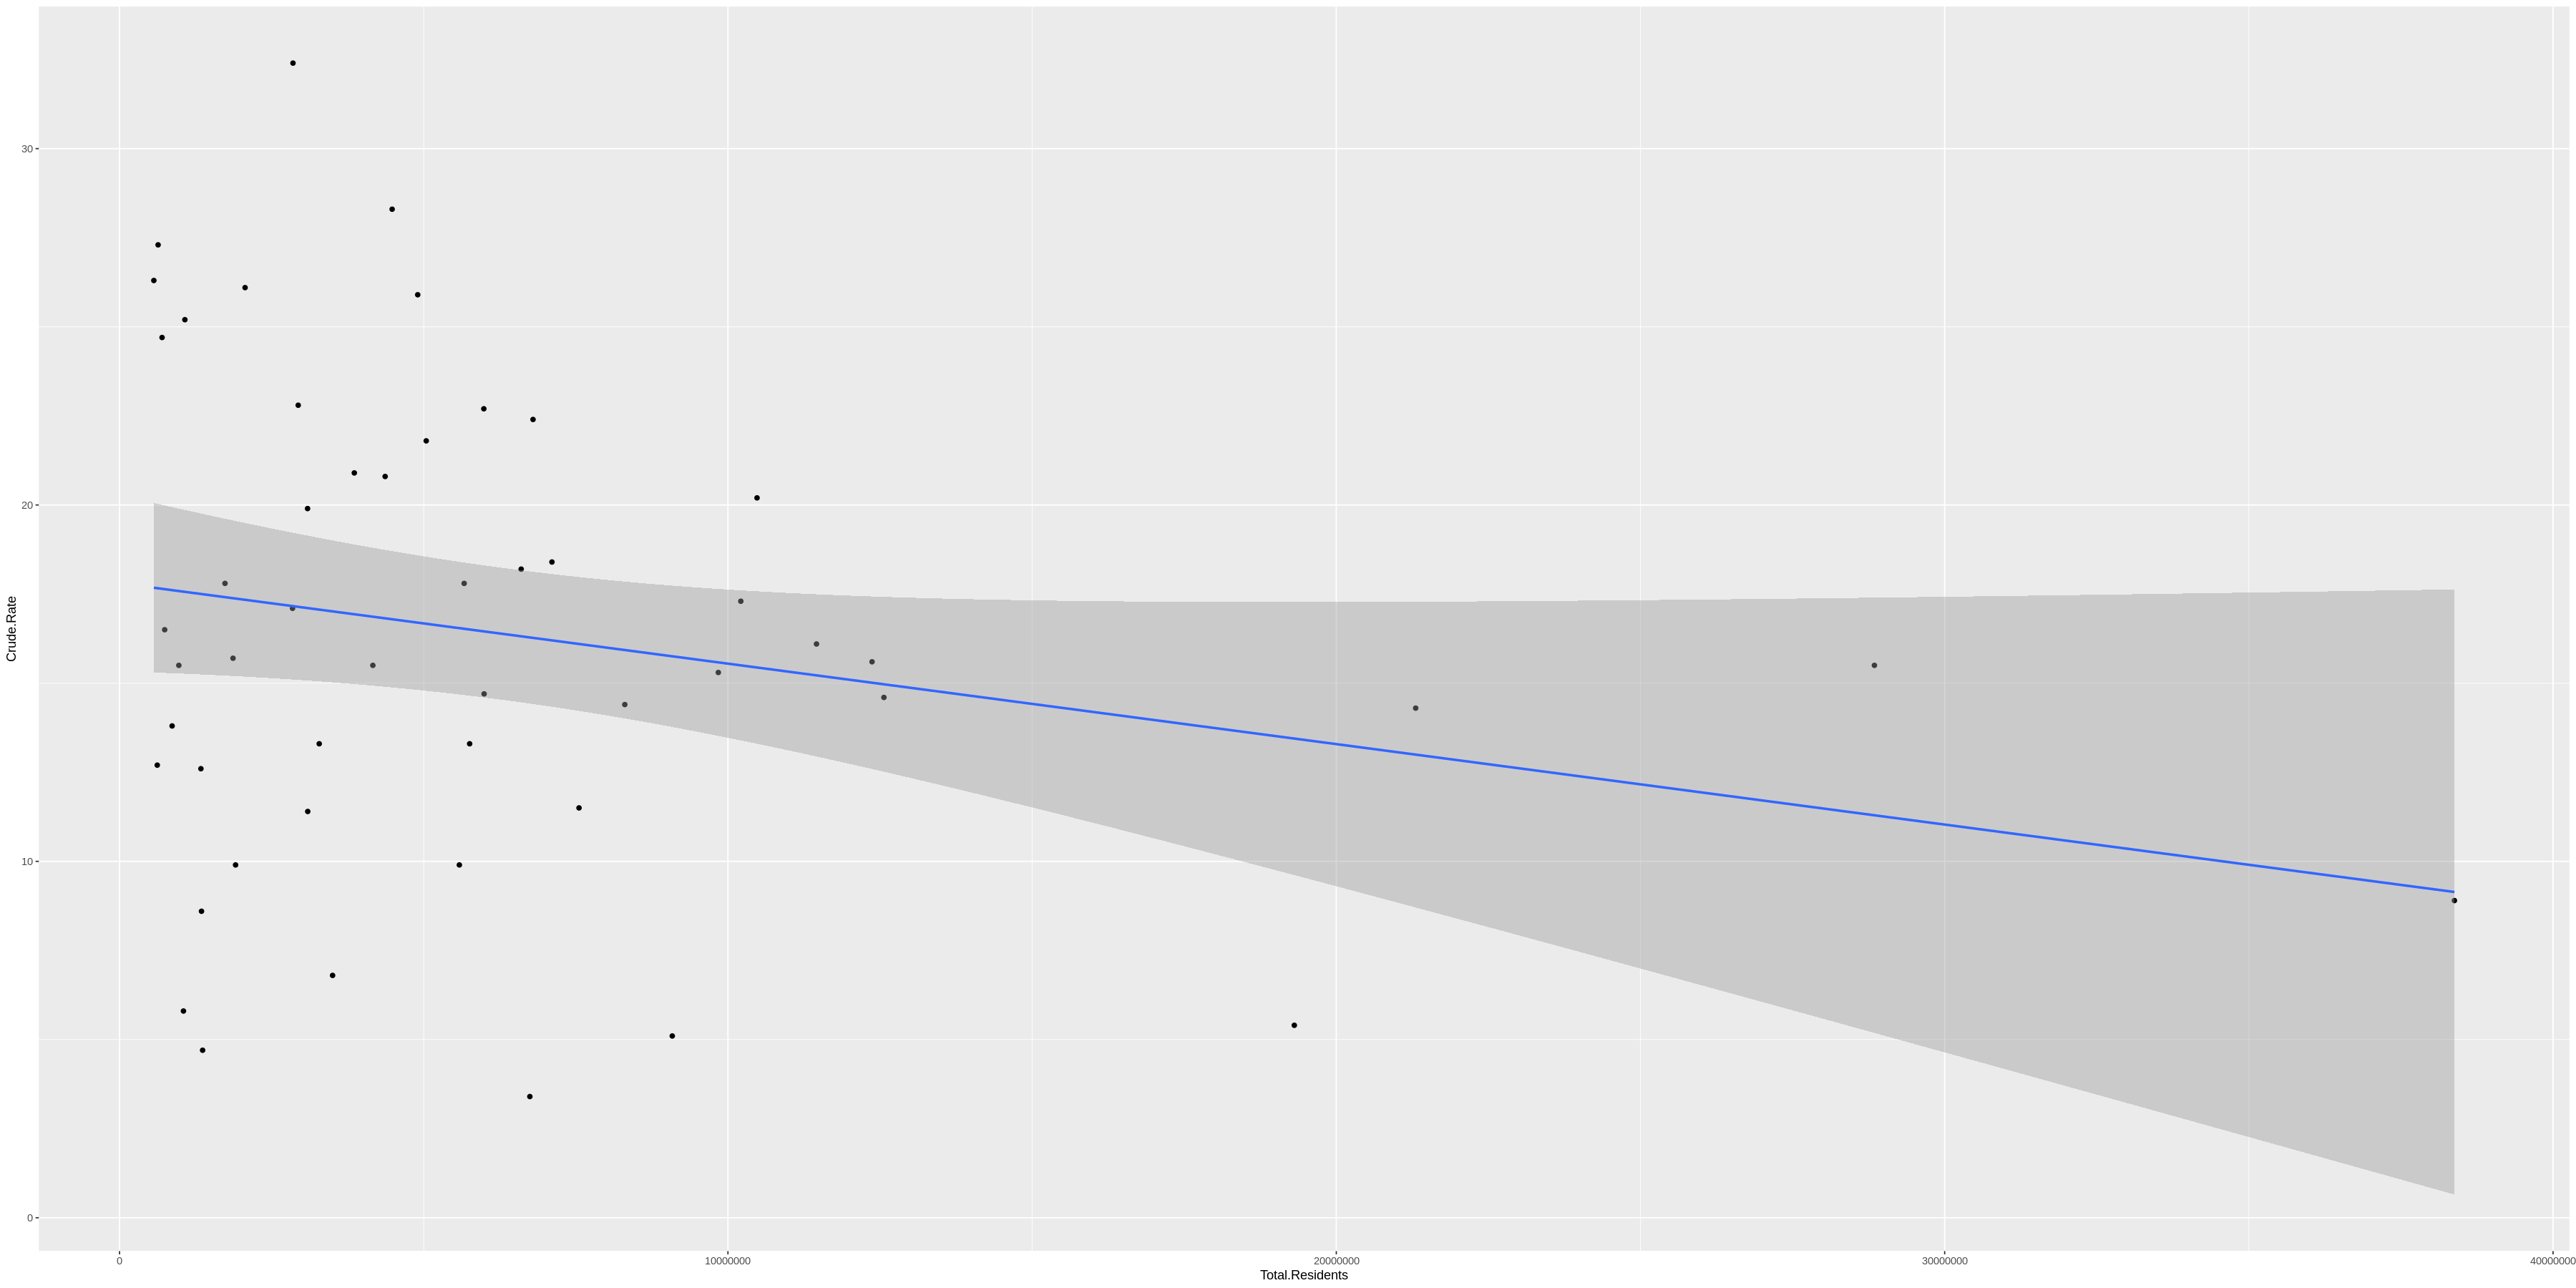

In [191]:
ggplot(state_corr_with_deaths, aes(y = Crude.Rate,x = Total.Residents))+geom_point()+geom_smooth(method="lm")

In [193]:
gva_wide <- gva_new %>%
  filter(year %in% c('2020', '2021', '2022')) %>%
  pivot_wider(names_from = event_type, values_from = victims_killed) %>%
  mutate(across(everything(), ~replace_na(., 0))) %>%
  mutate(across(everything(), ~ifelse(. == "NA", 0, .))) %>%
  group_by(State) %>%
  summarise(accidental_death = sum(accidental_death), mass_shooting = sum(mass_shooting), officer_involved_shooting = sum(officer_involved_shooting),
school_shooting = sum(school_shooting))

gva_wide

State                accidental_death mass_shooting
1  Alabama               44               37          
2  Alaska                 5                6          
3  Arizona               38               25          
4  Arkansas              14               20          
5  California            46              143          
6  Colorado              19               59          
7  Connecticut            3                7          
8  Delaware               2                6          
9  District of Columbia   8               21          
10 Florida              110               65          
11 Georgia               80               70          
12 Hawaii                 2                0          
13 Idaho                  6                2          
14 Illinois              57              141          
15 Indiana               46               48          
16 Iowa                  15                7          
17 Kansas                22                5          
18 Kentucky              28               14          
19 Louisiana             52               46          
20 Maine                  2                0          
21 Maryland              18               51          
22 Massachusetts          5                4          
23 Michigan              62               67          
24 Minnesota             27               20          
25 Mississippi           43               46          
26 Missouri              49               37          
27 Montana                6                0          
28 Nebraska              13                9          
29 Nevada                16               11          
30 New Hampshire          0                0          
31 New Jersey             9               20          
32 New Mexico            14                3          
33 New York              40               52          
34 North Carolina        62               52          
35 North Dakota           3                0          
36 Ohio                  79               59          
37 Oklahoma              24               28          
38 Oregon                 5               11          
39 Pennsylvania          56               55          
40 Rhode Island           0                0          
41 South Carolina        45               47          
42 South Dakota           0                4          
43 Tennessee             70               42          
44 Texas                209              166          
45 Utah                  13                1          
46 Vermont                3                0          
47 Virginia              44               53          
48 Washington            18               17          
49 West Virginia         15               11          
50 Wisconsin             31               28          
51 Wyoming                2                0          
   officer_involved_shooting school_shooting
1   5                         0             
2   0                         0             
3   6                         1             
4   4                         1             
5  10                         5             
6   5                         0             
7   2                         0             
8   0                         0             
9   1                         0             
10  5                         3             
11  6                         3             
12  0                         0             
13  1                         0             
14  6                         2             
15  2                         2             
16  0                         1             
17  1                         0             
18  5                         0             
19  5                         4             
20  0                         0             
21  3                         1             
22  1                         0             
23  0                         5             
24  1                         1             
25  1             

In [194]:
rand_new <- rand %>%
  group_by(State) %>%
  mutate(across(Effect, ~ifelse(. == "", 'Unknown', .))) %>%
  mutate(across(Effect, ~ifelse(. == "Modify", 'Unknown', .))) %>%
  count(State, Effect) %>%
  pivot_wider(names_from = Effect, values_from = n) %>%
  mutate(permissive_restrictive_rate = Permissive/Restrictive, total_laws = Permissive + Restrictive + Unknown)



rand_new

State                Permissive Restrictive Unknown
1  Alabama               7         10          26     
2  Alaska                8         10          31     
3  Arizona               7         18          26     
4  Arkansas              8         12          29     
5  California            7         70          20     
6  Colorado              9         18          31     
7  Connecticut           9         43          25     
8  Delaware              4         26          29     
9  District of Columbia  6         38          15     
10 Florida               5         27          28     
11 Georgia              11         13          28     
12 Hawaii                9         50          18     
13 Idaho                11         12          30     
14 Illinois              5         46          13     
15 Indiana              11         17          27     
16 Iowa                  7         15          23     
17 Kansas                8          8          28     
18 Kentucky              8          8          28     
19 Louisiana            11         13          29     
20 Maine                 7         10          27     
21 Maryland              5         32          23     
22 Massachusetts         3         45          11     
23 Michigan              8         20          22     
24 Minnesota             7         14          24     
25 Mississippi           9         10          29     
26 Missouri             14         17          27     
27 Montana               7          7          30     
28 Nebraska              5         18          25     
29 Nevada                6         24          24     
30 New Hampshire         8         12          26     
31 New Jersey            4         44          15     
32 New Mexico            4         13          31     
33 New York              3         37          24     
34 North Carolina        7         22          24     
35 North Dakota          7         11          28     
36 Ohio                  5         16          26     
37 Oklahoma              8         15          25     
38 Oregon                7         21          24     
39 Pennsylvania         11         24          22     
40 Rhode Island          6         31          20     
41 South Carolina        9         13          19     
42 South Dakota          7          6          29     
43 Tennessee            11         18          24     
44 Texas                 9         13          27     
45 Utah                 11         18          27     
46 Vermont               4         12          31     
47 Virginia              8         24          29     
48 Washington            6         29          26     
49 West Virginia         7         13          29     
50 Wisconsin             5         18          30     
51 Wyoming               8         10          32     
   permissive_restrictive_rate total_laws
1  0.70000000                  43        
2  0.80000000                  49        
3  0.38888889                  51        
4  0.66666667                  49        
5  0.10000000                  97        
6  0.50000000                  58        
7  0.20930233                  77        
8  0.15384615                  59        
9  0.15789474                  59        
10 0.18518519                  60        
11 0.84615385                  52        
12 0.18000000                  77        
13 0.91666667                  53        
14 0.10869565                  64        
15 0.64705882                  55        
16 0.46666667                  45        
17 1.00000000                  44        
18 1.00000000                  44        
19 0.84615385                  53        
20 0.70000000                  44        
21 0.15625000                  60        
22 0.06666667                  59        
23 0.40000000                  50        
24 0.50000000                  45        
25 0.90000000                  48        
26 0.82352941                  58        
27 1.0000

## All Variables EDA

In [195]:

state_corr_with_deaths_violence <- state_demo_no_us %>%
  left_join(cdc_state_new, by = join_by(Location == State)) %>%
  left_join(gva_wide, by = join_by(Location == State)) %>%
  left_join(rand_new, by = join_by(Location == State)) %>%
  select(Total.Residents, size, Children.0.18, Male, White, Black, Hispanic, Median.Annual.Household.Income, Unemployed, accidental_death,
mass_shooting, officer_involved_shooting, school_shooting, permissive_restrictive_rate, total_laws, Crude.Rate) %>%
  drop_na()

head(state_corr_with_deaths_violence)

Total.Residents size   Children.0.18 Male  White Black Hispanic
1  4900800         50750 0.236         0.481 0.644 0.255 0.047   
2   698700        570641 0.264         0.512 0.579 0.026 0.067   
3  7107300        113642 0.236         0.495 0.521 0.041 0.324   
4  2936400         52075 0.246         0.490 0.683 0.144 0.083   
5 38379200        155973 0.236         0.497 0.342 0.051 0.403   
6  5664200        103730 0.227         0.502 0.653 0.036 0.222   
  Median.Annual.Household.Income Unemployed accidental_death mass_shooting
1 53913                          0.029      44                37          
2 77845                          0.050       5                 6          
3 69056                          0.033      38                25          
4 52528                          0.031      14                20          
5 84907                          0.049      46               143          
6 82254                          0.037      19                59          
  officer_involved_shooting school_shooting permissive_restrictive_rate
1  5                        0               0.7000000                  
2  0                        0               0.8000000                  
3  6                        1               0.3888889                  
4  4                        1               0.6666667                  
5 10                        5               0.1000000                  
6  5                        0               0.5000000                  
  total_laws Crude.Rate
1 43         25.9      
2 49         24.7      
3 51         18.4      
4 49         22.8      
5 97          8.9      
6 58         17.8

### Mass Shootings

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


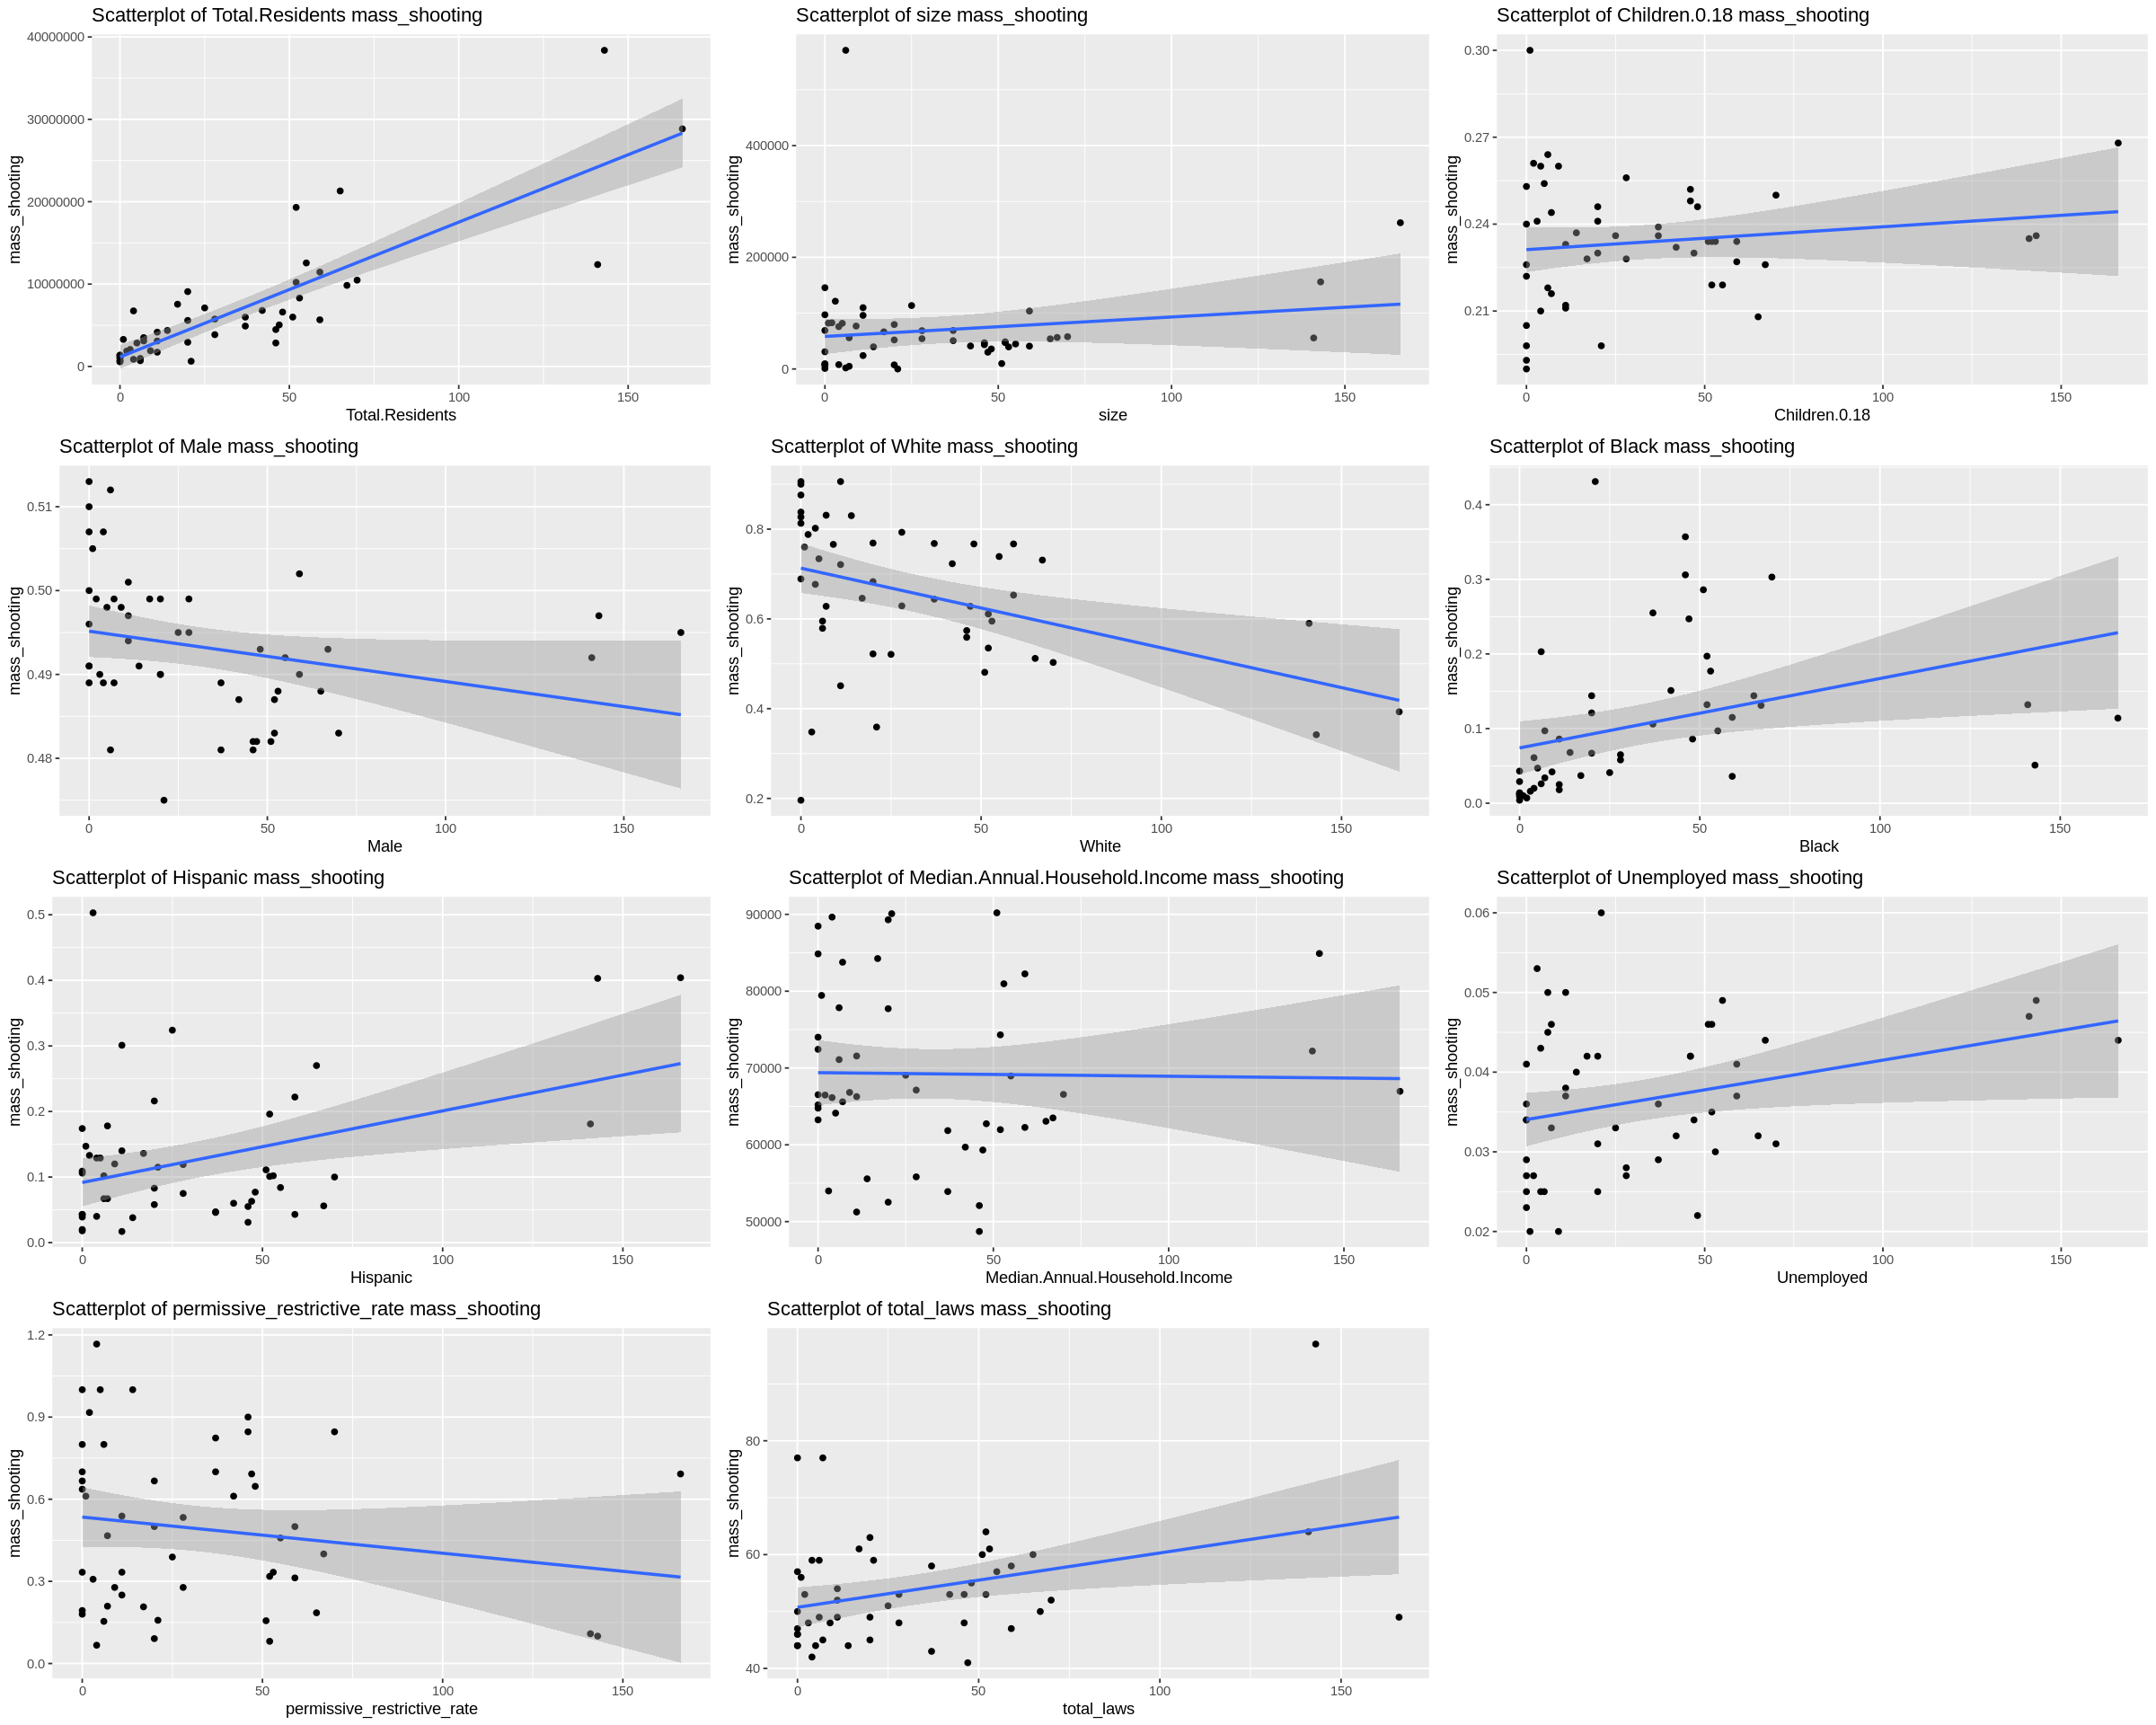

In [196]:
state_corr_with_deaths_violence_mass_shooting <- state_corr_with_deaths_violence %>%
  select(Total.Residents, size, Children.0.18, Male, White, Black, Hispanic, Median.Annual.Household.Income, Unemployed,
permissive_restrictive_rate, total_laws, mass_shooting)

variables <- names(state_corr_with_deaths_violence_mass_shooting)[-ncol(state_corr_with_deaths_violence_mass_shooting)]  # Assuming the variable you want to plot is in the first column

# Create a list to store the scatterplots
scatterplots <- list()

# Loop through each variable and create scatterplots using ggplot2
for (var in variables) {
  p <- ggplot(state_corr_with_deaths_violence_mass_shooting, aes_string(x = names(state_corr_with_deaths_violence_mass_shooting)[ncol(state_corr_with_deaths_violence_mass_shooting)], y = var)) +
    geom_point() +
    labs(title = paste("Scatterplot of", var, names(state_corr_with_deaths_violence_mass_shooting)[ncol(state_corr_with_deaths_violence_mass_shooting)]), "vs.", var,
         x = var, y = names(state_corr_with_deaths_violence_mass_shooting)[ncol(state_corr_with_deaths_violence_mass_shooting)]) + geom_smooth(method="lm")

  scatterplots[[var]] <- p
}

# Arrange scatterplots in a grid layout
options(repr.plot.width = 20, repr.plot.height = 16)
grid.arrange(grobs = scatterplots, ncol = 3)  # Adjust 'ncol' as needed

In [197]:
lm_mass <- lm(mass_shooting ~ Total.Residents + size + Children.0.18 + Male + White + Black + Hispanic + Median.Annual.Household.Income + Unemployed + permissive_restrictive_rate + total_laws, data = state_corr_with_deaths_violence_mass_shooting)
summary(lm_mass)


Call:
lm(formula = mass_shooting ~ Total.Residents + size + Children.0.18 + 
    Male + White + Black + Hispanic + Median.Annual.Household.Income + 
    Unemployed + permissive_restrictive_rate + total_laws, data = state_corr_with_deaths_violence_mass_shooting)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.028  -8.725  -2.788   5.754  79.847 

Coefficients:
                                      Estimate      Std. Error t value
(Intercept)                    -196.3086945852  350.8708776636  -0.559
Total.Residents                   0.0000043811    0.0000005439   8.055
size                              0.0000067285    0.0000512448   0.131
Children.0.18                   158.9328327050  188.7968679823   0.842
Male                            321.2446042629  750.8311563395   0.428
White                            10.1527451013   38.3779922678   0.265
Black                           110.6068680614   59.5351014436   1.858
Hispanic                         -6.1651947461   49.32364944

### CDC Crude Rate

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


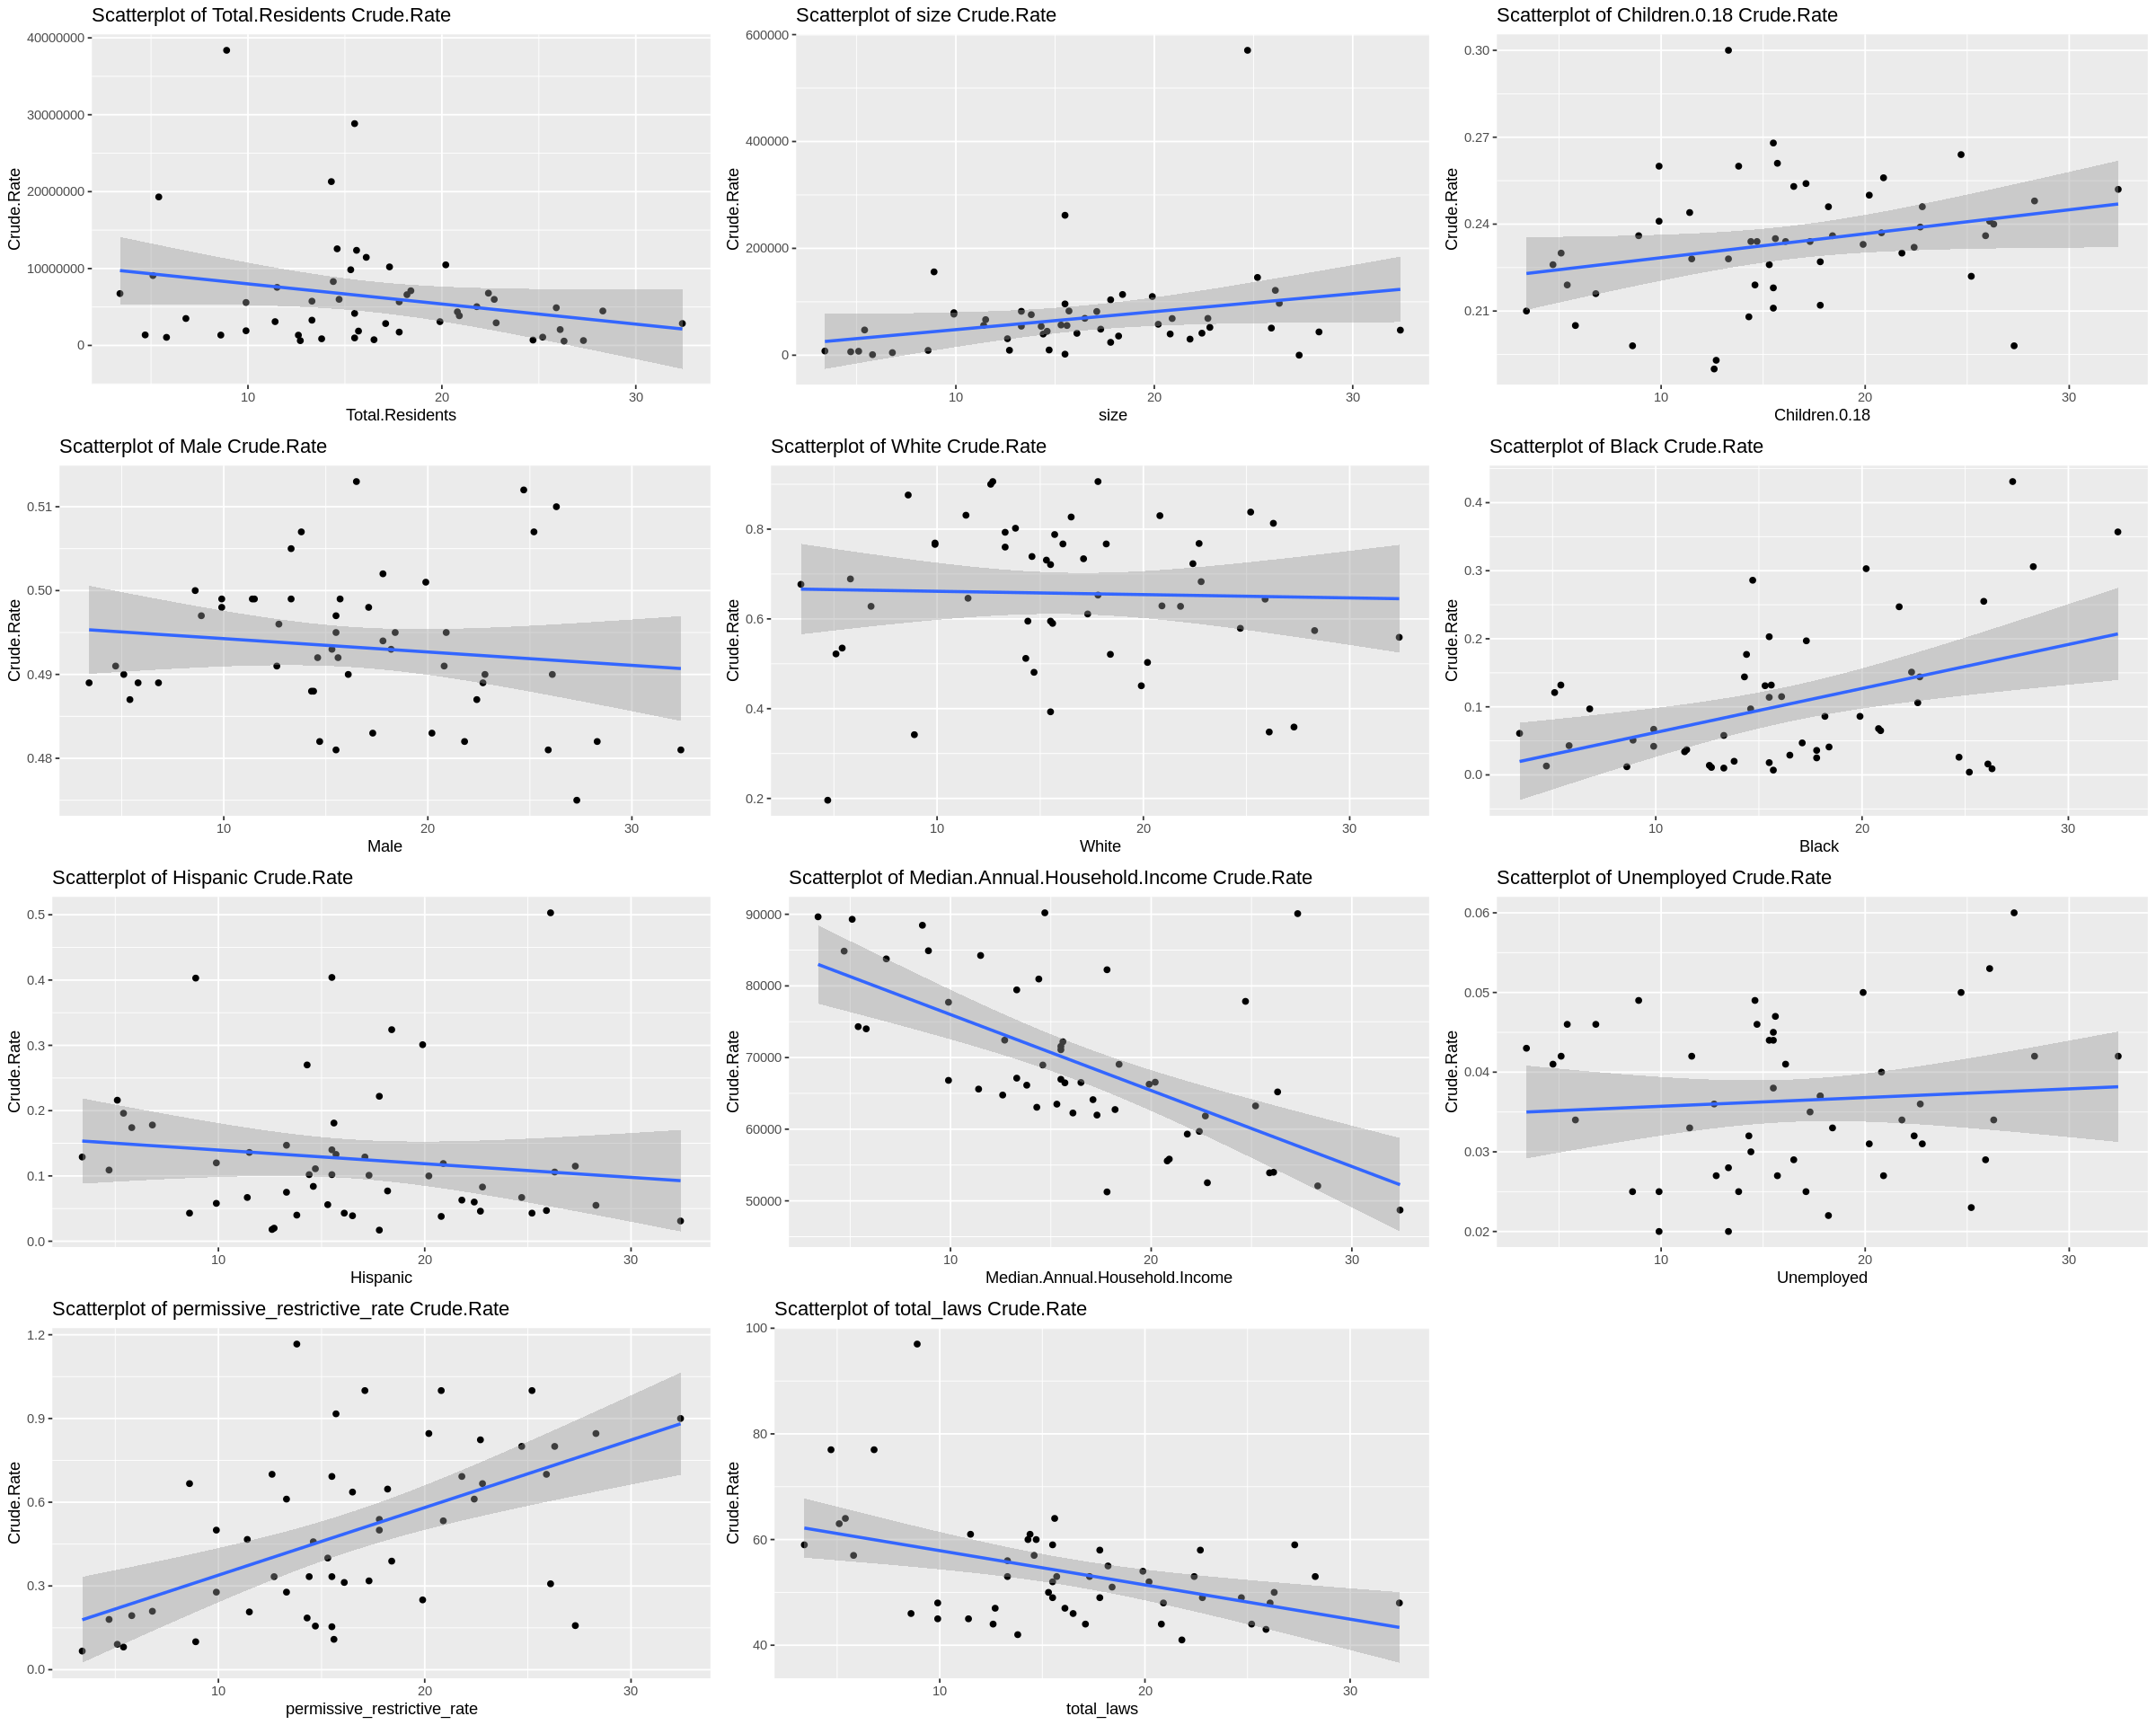

In [198]:
state_corr_with_deaths_crude_rates <- state_corr_with_deaths_violence %>%
  select(Total.Residents, size, Children.0.18, Male, White, Black, Hispanic, Median.Annual.Household.Income, Unemployed,
permissive_restrictive_rate, total_laws, Crude.Rate)

variables <- names(state_corr_with_deaths_crude_rates)[-ncol(state_corr_with_deaths_crude_rates)]  # Assuming the variable you want to plot is in the first column

# Create a list to store the scatterplots
scatterplots <- list()

# Loop through each variable and create scatterplots using ggplot2
for (var in variables) {
  p <- ggplot(state_corr_with_deaths_crude_rates, aes_string(x = names(state_corr_with_deaths_crude_rates)[ncol(state_corr_with_deaths_crude_rates)], y = var)) +
    geom_point() +
    labs(title = paste("Scatterplot of", var, names(state_corr_with_deaths_crude_rates)[ncol(state_corr_with_deaths_crude_rates)]), "vs.", var,
         x = var, y = names(state_corr_with_deaths_crude_rates)[ncol(state_corr_with_deaths_crude_rates)]) + geom_smooth(method="lm")

  scatterplots[[var]] <- p
}

# Arrange scatterplots in a grid layout
options(repr.plot.width = 20, repr.plot.height = 16)
grid.arrange(grobs = scatterplots, ncol = 3)  # Adjust 'ncol' as needed

In [199]:
lm_crude <- lm(Crude.Rate ~ Total.Residents + size + Children.0.18 + Male + White + Black + Hispanic + Median.Annual.Household.Income + Unemployed + permissive_restrictive_rate + total_laws, data = state_corr_with_deaths_crude_rates)
summary(lm_crude)


Call:
lm(formula = Crude.Rate ~ Total.Residents + size + Children.0.18 + 
    Male + White + Black + Hispanic + Median.Annual.Household.Income + 
    Unemployed + permissive_restrictive_rate + total_laws, data = state_corr_with_deaths_crude_rates)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2855 -1.7696 -0.1976  2.1057  4.4010 

Coefficients:
                                       Estimate       Std. Error t value
(Intercept)                    -133.02681007198   56.33407624311  -2.361
Total.Residents                  -0.00000037802    0.00000008733  -4.329
size                              0.00002142137    0.00000822760   2.604
Children.0.18                   -61.44278948165   30.31228247325  -2.027
Male                            331.49001471308  120.54970161272   2.750
White                             5.23533087376    6.16177881979   0.850
Black                            59.40857674078    9.55865863305   6.215
Hispanic                         22.24370998471    7.91915